In [1]:
# initialization cell

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math
import time
import os
current_path = os.getcwd()
path_to_files = current_path + '/../sz_auxiliary_files/'
import matplotlib.patches as mpatches

font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

arcmin_to_radians = np.pi/(60.*180.)

In [2]:
# the parameters needed for the ksz calculations:
ksz_params = {
#fiducial ksz params

'k_min_for_pk_class_sz' : 0.001,
'k_max_for_pk_class_sz' : 60.0,
'k_per_decade_class_sz' : 50,
'P_k_max_h/Mpc' : 100.0,
# 'non linear' : 'halofit',


# 'sz_verbose' : 0, # for full output when not using python wrapper set to >100, this doesnt work with python wrapper

'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.001,


'ndim_masses' : 80,
'ndim_redshifts' : 80,




'n_ell_density_profile' : 50,
'n_m_density_profile' : 50,
'n_z_density_profile' : 50,
'k_per_decade_for_pk' : 50,
'z_max_pk' : 4.0,
    

# slow:
# 'n_z_psi_b1g' : 100,
# 'n_l_psi_b1g' : 400,

# 'n_z_psi_b2g' : 100,
# 'n_l_psi_b2g' : 400,

# 'n_z_psi_b2t' : 100,
# 'n_l_psi_b2t' : 400,

# 'n_z_psi_b1t' : 100,
# 'n_l_psi_b1t' : 100,

# 'n_z_psi_b1gt' : 100,
# 'n_l_psi_b1gt' : 100,
    
    
# fast:
'n_z_psi_b1g' : 50,
'n_l_psi_b1g' : 50,

'n_z_psi_b2g' : 50,
'n_l_psi_b2g' : 50,

'n_z_psi_b2t' : 50,
'n_l_psi_b2t' : 50,

'n_z_psi_b1t' : 50,
'n_l_psi_b1t' : 50,

'n_z_psi_b1gt' : 50,
'n_l_psi_b1gt' : 50,

'N_samp_fftw' : 800, # fast: 800 ;  slow: 2000
'l_min_samp_fftw' : 1e-9,
'l_max_samp_fftw' : 1e9,
    
'N_kSZ2_gal_multipole_grid' :  70,
'N_kSZ2_gal_theta_grid' :  70,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
}

# the parameters needed for cosmology:

cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'h': 0.6766,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06    

}

# the common parameters:

common_params = {

'z_min' : 0.005,
'z_max' : 4.0,
'M_min' : 7.0e8, 
'M_max' : 3.5e15,
    

'delta for galaxies' : "200c",
'delta for matter density' : "200c",
'mass function' : 'T08M200c',
'concentration parameter' : 'B13',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0005,


'ell_max': 1600.0,
'ell_min': 2.0,
'dell': 10,

'non linear' : 'halofit',
'pk_nonlinear_for_vrms2' : 1,
'hm_consistency' : 1,
    
'f_free' : 1.0,
    

# 'ndim_masses': 150,
# 'ndim_redshifts': 150,

# 'P_k_max_h/Mpc': 50.0,
# 'k_min_for_pk_class_sz': 0.0001,
# 'k_max_for_pk_class_sz': 10.0,
# 'k_per_decade_class_sz': 20.0,
}


# HOD params for kSZ2-g

bestfit_blue_hod_params = {
'galaxy_sample': 'unwise',
'galaxy_sample_id': "blue",
'UNWISE_dndz_file' : "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt",
# 'UNWISE_fdndz_file' : "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_fdndz.txt",

   

'sigma_log10M_HOD' : 0.69,
'alpha_s_HOD' :  1.30,
'M1_prime_HOD' : 5.03e12, # Msun/h
'M_min_HOD' : 6.25e11, # Msun/h
'cl_gal_gal_A_sn' : -0.26e-7, 
'x_out_truncated_nfw_profile_satellite_galaxies' : 1.09,


'M0_HOD':0,  # Msun/h
'M0 equal M_min (HOD)': 'no',
'x_out_truncated_nfw_profile':1.0,    
    
}

bestfit_green_hod_params = {
'galaxy_sample': 'unwise',
'galaxy_sample_id': "green",
'UNWISE_dndz_file' : "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_dndz_cosmos.txt",
   

'sigma_log10M_HOD' : 0.97,
'alpha_s_HOD' :  1.30,
'M1_prime_HOD' : 2.76e13, # Msun/h
'M_min_HOD' : 1.34e13, # Msun/h
'cl_gal_gal_A_sn' : 1.38e-7, 
'x_out_truncated_nfw_profile_satellite_galaxies' : 2.75,


'M0_HOD':0,  # Msun/h
'M0 equal M_min (HOD)': 'no',
'x_out_truncated_nfw_profile':1.0,    
    
}


FERRARO, HILL +, Planck kSZ2-g

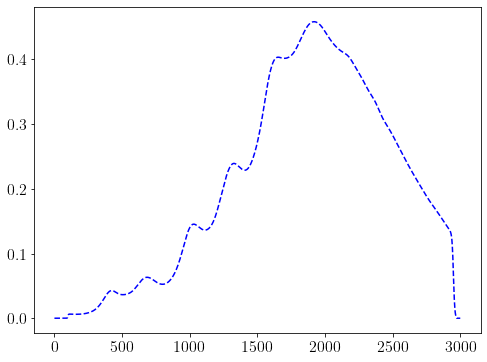

In [3]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',unpack=True)
plt.plot(l_planck,F_planck,label='ola planck',ls='--',c='b')

use fsky = 0.7 see table II of https://arxiv.org/pdf/1605.02722.pdf <br>
beam of 5 arcmin and noise of 47 uK as us in planck_nl.txt  <br>
multipole range : 100 - 3000  <br>
galaxy density:  50 million galaxies over half of the sky <br>
means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
galaxy bias assumed constant to be bg = 1.13 ± 0.02 (see fig 7 of https://arxiv.org/pdf/1605.02722.pdf)

WISE redshift distribution:

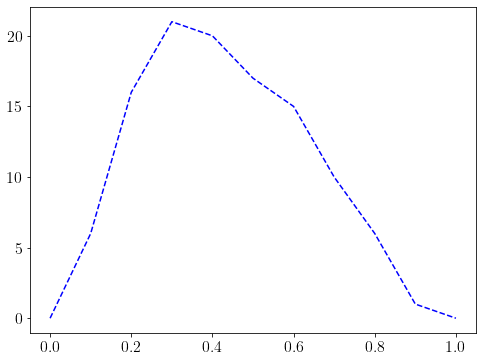

In [63]:
z, dnwise = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise.txt',unpack=True)
plt.plot(z,dnwise,label='wise dndz',ls='--',c='b')

In [210]:
#blue unwise shot noise:
shot_noise = (3409/3.046174198e-4)**-1
shot_noise

8.935682599002641e-08

In [65]:
# np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',np.c_[z,dnwise/np.trapz(dnwise,z)])

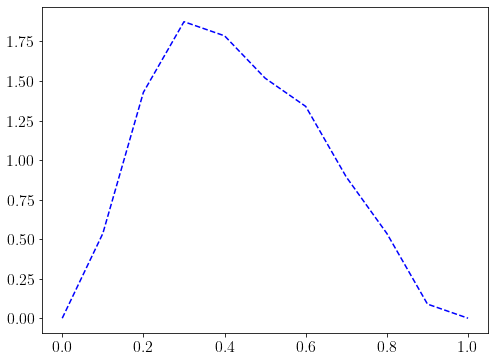

In [66]:
z, dnwise = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',unpack=True)
plt.plot(z,dnwise,label='wise dndz',ls='--',c='b')

In [67]:
np.trapz(dnwise,z)

0.9999999999999999

kSZ2-wise templates

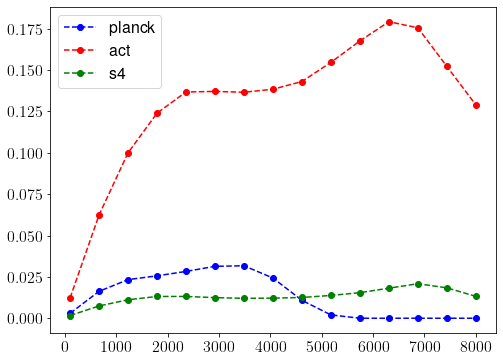

In [44]:
F = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/ksz2g_wise_simone16template.txt')
ls = F[0,:]
cls_planck = F[1,:]
cls_advact = F[2,:]
cls_s4 = F[3,:]
plt.plot(ls,cls_planck,label='planck',ls='--',c='b',marker='o')
plt.plot(ls,cls_advact,label='act',ls='--',c='r',marker='o')
plt.plot(ls,cls_s4,label='s4',ls='--',c='g',marker='o')
plt.legend()

In [3]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',



        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 89.7380 seconds


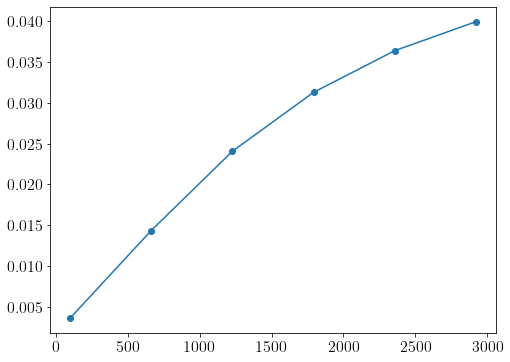

In [4]:
plt.plot(M.cl_gg()['ell'],np.asarray(M.cl_gg()['hf'])/1**2,marker='o')

In [78]:
M.cl_t2t2f()

{'ell': [100.0, 664.0, 1228.0, 1792.0, 2356.0, 2920.0],
 't2t2f': [4.977397041146142e-27,
  4.413516741649082e-27,
  3.429374691763428e-27,
  2.3038948059109304e-27,
  1.3007305292441285e-27,
  5.814487214271823e-28]}

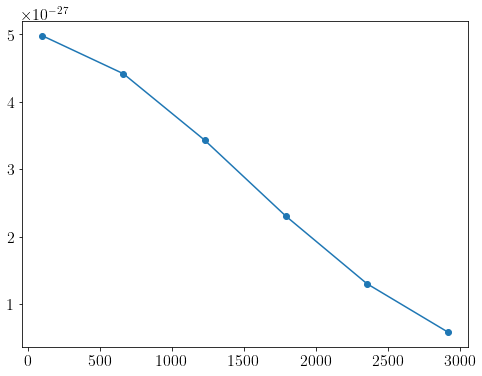

In [79]:
plt.plot(M.cl_t2t2f()['ell'],M.cl_t2t2f()['t2t2f'],marker='o')

In [80]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

2.073580422505847
4.147160845011694


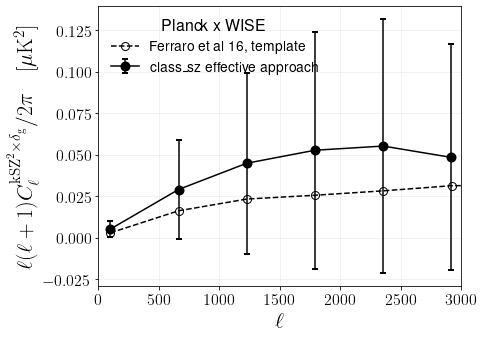

In [81]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            marker='o',
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label='class\_sz effective approach',
            c='k')
ax.plot(ls,
        cls_planck,
        label='Ferraro et al 16, template',
        ls='--',
        c='k',
        markerfacecolor='None',
        markersize=8,
        marker='o')
# ax.plot(l,fac_plc*cl_lensing)
ax.legend(title='Planck x WISE',
          loc=2,
          frameon=False,
          fontsize=14)
ax.set_xlim(0.,3000)

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^{\mathrm{kSZ}^2\times\delta_\mathrm{g}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.grid(which='both',alpha=0.2)
fig.tight_layout()
# plt.savefig('Planck_WISE.pdf')


with unWISE blue and Planck
but shot noise determined by 1/nbar, ie 
#blue unwise shot noise:
shot_noise = (3409/3.046174198e-4)**-1


In [83]:
shot_noise = (3409/3.046174198e-4)**-1
shot_noise

8.935682599002641e-08

In [101]:
shot_noise = (1846/3.046174198e-4)**-1
shot_noise

1.6501485362946912e-07

In [102]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',



        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 66.7438 seconds


In [103]:
M.cl_t2t2f()

{'ell': [100.0, 664.0, 1228.0, 1792.0, 2356.0, 2920.0],
 't2t2f': [4.977397041146142e-27,
  4.413516741649082e-27,
  3.429374691763428e-27,
  2.3038948059109304e-27,
  1.3007305292441285e-27,
  5.814487214271823e-28]}

In [104]:
0.42/0.31*2.

2.7096774193548385

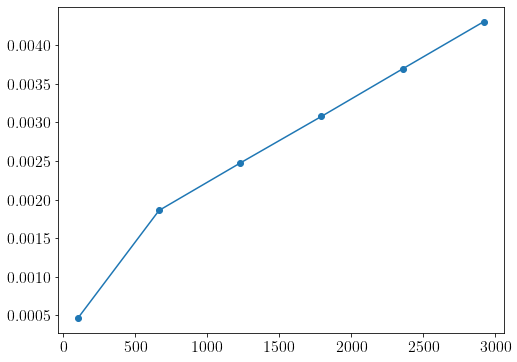

In [105]:
plt.plot(M.cl_gg()['ell'],np.asarray(M.cl_gg()['hf'])/1**2,marker='o')

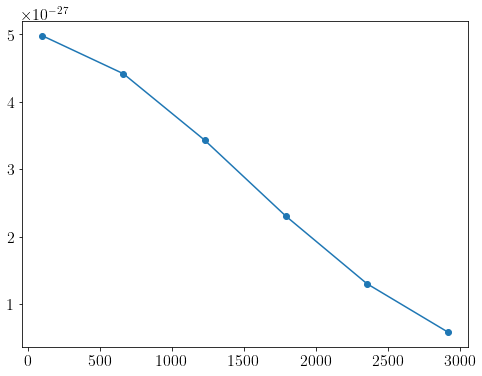

In [106]:
plt.plot(M.cl_t2t2f()['ell'],M.cl_t2t2f()['t2t2f'],marker='o')

In [107]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

0.40683536504683127
0.8136707300936625


In [93]:
(4.1-5.2)/(4.1+5.2)*2.

-0.23655913978494633

In [128]:
# Ferraro + : 0.155 see https://arxiv.org/pdf/1605.02722.pdf
M.get_f_b()


0.15745030410017352

In [129]:
M.get_f_free()

1.0

FERRARO, HILL +, AdvACT kSZ2-g

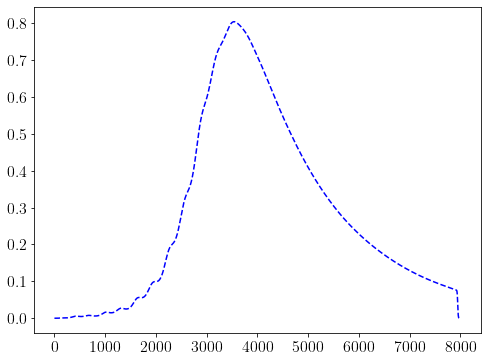

In [130]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',unpack=True)
plt.plot(l_planck,F_planck,label='colin advact',ls='--',c='b')

use fsky = 0.5 see table II of https://arxiv.org/pdf/1605.02722.pdf <br>
beam of 1.4 arcmin and noise of 10 uK see Table I of  https://arxiv.org/pdf/1605.02722.pdf <br>
multipole range : 100 - 8000  <br>
galaxy density:  50 million galaxies over half of the sky <br>
means 50x10^6/2pi so Shot-noise = 1.2566370614359172e-07 <br>
galaxy bias assumed constant to be bg = 1.13 ± 0.02 (see fig 7 of https://arxiv.org/pdf/1605.02722.pdf)

WISE redshift distribution:

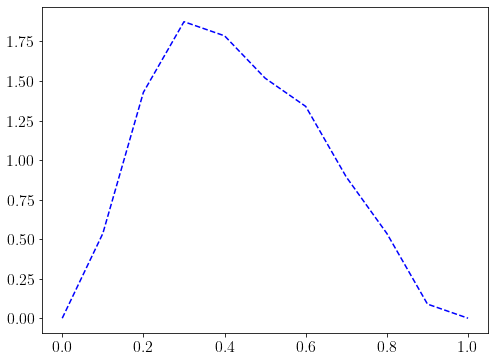

In [131]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',unpack=True)
plt.plot(l_planck,F_planck,label='wise dndz',ls='--',c='b')

kSZ2-wise templates

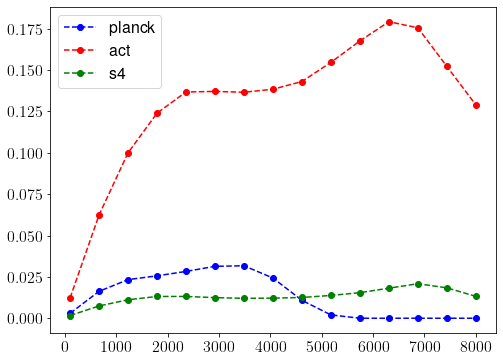

In [132]:
F = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/ksz2g_wise_simone16template.txt')
ls = F[0,:]
cls_planck = F[1,:]
cls_advact = F[2,:]
cls_s4 = F[3,:]
plt.plot(ls,cls_planck,label='planck',ls='--',c='b',marker='o')
plt.plot(ls,cls_advact,label='act',ls='--',c='r',marker='o')
plt.plot(ls,cls_s4,label='s4',ls='--',c='g',marker='o')
plt.legend()

In [37]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',
'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/advact_nl_10uk_1p4arcmin.txt',

        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.5, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07, 
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 135.7984 seconds


In [40]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',
'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/advact_nl_10uk_1p4arcmin.txt',

        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.5, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07, 
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 134.5282 seconds


In [87]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',
'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_10uK_110422.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/advact_nl_10uk_1p4arcmin.txt',

        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.5, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07, 
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 146.3658 seconds


In [95]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',
'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_10uK_110422.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/advact_nl_10uk_1p4arcmin.txt',

'ksz template file': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_hm.dat',
'ksz template file, reio contribution': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_patchy_0_hm.dat',
        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.5, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07, 
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 143.4882 seconds


In [95]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',
'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_10uK_110422.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',

'ksz template file': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_hm.dat',
'ksz template file, reio contribution': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_patchy_0_hm.dat',
        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.5, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07, 
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 143.4882 seconds


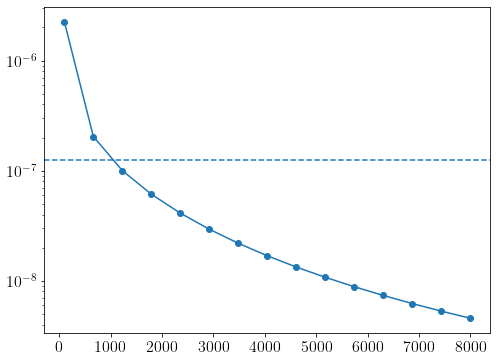

In [88]:
plt.plot(M.cl_gg()['ell'],np.asarray(M.cl_gg()['hf'])/(np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi),marker='o')
plt.axhline(M.A_sn(),ls='--')
plt.yscale('log')

In [39]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

102.74933805205761
205.49867610411522


In [42]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

49.61928147116234
99.23856294232468


In [89]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

84.59285893816548
169.18571787633095


In [96]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

87.22237135255195
174.4447427051039


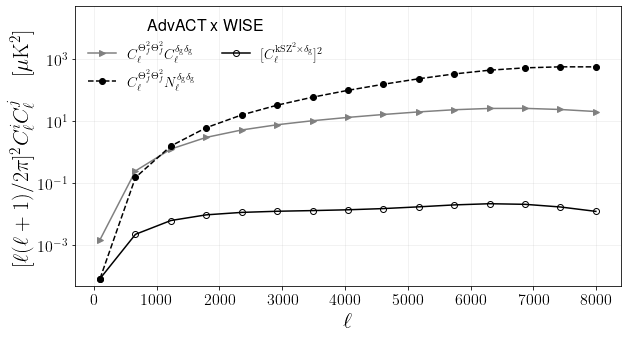

In [75]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1




fac_dl = (2.726e6)**2*np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi

den =  1.#(2.*np.asarray(M.cl_t2t2f()['ell'])+1.)*np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))**2.

ya = fac_dl**2.*np.asarray(M.cl_t2t2f()['t2t2f'])*np.asarray(M.cl_gg()['hf'])/(np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi)
plt.plot(M.cl_t2t2f()['ell'],ya/den,marker='>',c='grey',
         label=r'$C_\ell^{\Theta_f^2\Theta_f^2}C_\ell^{\delta_\mathrm{g}\delta_\mathrm{g}}$')

ya = fac_dl**2.*np.asarray(M.cl_t2t2f()['t2t2f'])*M.A_sn()
plt.plot(M.cl_t2t2f()['ell'],ya/den,
         marker='o',
         label=r'$C_\ell^{\Theta_f^2\Theta_f^2}N_\ell^{\delta_\mathrm{g}\delta_\mathrm{g}}$',
         ls='--',
        c='k')

ya = fac_dl**2.*np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))**2.
plt.plot(M.cl_t2t2f()['ell'],ya/den,
         label=r'$[C_\ell^{\mathrm{kSZ}^2\times\delta_\mathrm{g}}]^2$',
         marker='o',
         markerfacecolor='None',
         c='k'
        )

# plt.yscale('log')
# plt.legend()
# plt.xlabel('multipole l')
# plt.ylabel('Normalized cov')

ax.set_yscale('log')

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$[\ell(\ell+1)/2\pi]^2C_\ell^i C_\ell^j\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.grid(which='both',alpha=0.2)

ax.legend(title='AdvACT x WISE',
          loc=2,
          ncol=2,
          frameon=False,
          fontsize=14)
ax.set_ylim(5e-5,5e4)

fig.tight_layout()
plt.savefig('advACT_WISE_covmat_terms.pdf')

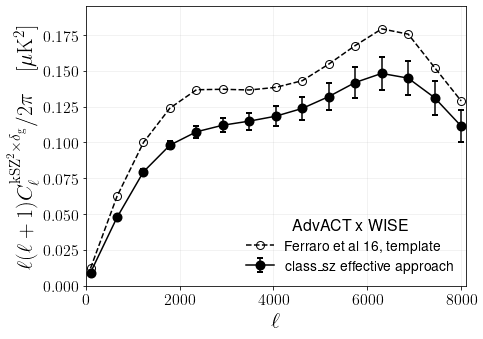

In [53]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(7,5),sharey=True)

ax=ax1

# ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),label='class\_sz effective approach')

# ax.plot(ls,cls_advact,label='simo template',ls='--',c='b',marker='o')
# ax.plot(l,fac_plc*cl_lensing)
# ax.legend(loc=2)


ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            marker='o',
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label='class\_sz effective approach',
            c='k')
ax.plot(ls,
        cls_advact,
        label='Ferraro et al 16, template',
        ls='--',
        c='k',
        markerfacecolor='None',
        markersize=8,
        marker='o')
# ax.plot(l,fac_plc*cl_lensing)
ax.legend(title='AdvACT x WISE',
          loc=4,
          frameon=False,
          fontsize=14)
# ax.set_xlim(0.,3000)
ax.set_xlim(0.,8100)
ax.set_ylim(0.,0.195)

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$\ell(\ell+1)C_\ell^{\mathrm{kSZ}^2\times\delta_\mathrm{g}}/2\pi\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.grid(which='both',alpha=0.2)
fig.tight_layout()
plt.savefig('advACT_WISE.pdf')







In [54]:
# Ferraro + : 0.155 see https://arxiv.org/pdf/1605.02722.pdf
M.get_f_b()


0.15745030410017352

In [27]:
M.get_f_free()

1.0

Planck x unWISE incorrect filter

In [168]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 73.1404 seconds


In [169]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

0.6522347497148439
1.3044694994296877


In [170]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 71.0333 seconds


In [171]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

1.7110797074591093
3.4221594149182186


Planck x unWISE correct filter

In [172]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 69.5512 seconds


In [173]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

0.40683536504683127
0.8136707300936625


In [170]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 71.0333 seconds


In [171]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

1.7110797074591093
3.4221594149182186


AdvACT x unWISE

In [7]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 97.1793 seconds


In [9]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

7.942389722102383
15.884779444204765


In [10]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 111.2428 seconds


In [11]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

22.431731982622733
44.863463965245465


SO x unWISE

In [12]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 112.0114 seconds


In [14]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

44.113683796629445
88.22736759325889


In [15]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 134.9877 seconds


In [16]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

118.41681038329929
236.83362076659859


S4 x unWISE

In [17]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/s4_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 109.2018 seconds


In [19]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

90.75199588820173
181.50399177640347


In [24]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/s4_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_nl.txt',

        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 131.6360 seconds


In [25]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

234.3333141654223
468.6666283308446


In [26]:
468.7/181.5

2.5823691460055094

In [131]:
1.6501485362946912e-07/8.935682599002641e-08

1.8466955579631632

# Fisher analysis with bg and Aksz
we just focus on on advact x unwise blue and green
no need to redo the full list of SNRs

In [27]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_lens_hf,gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.6501485362946912e-07,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 102.7457 seconds


In [28]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['hf'])#np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

7.942389722102383
15.884779444204765


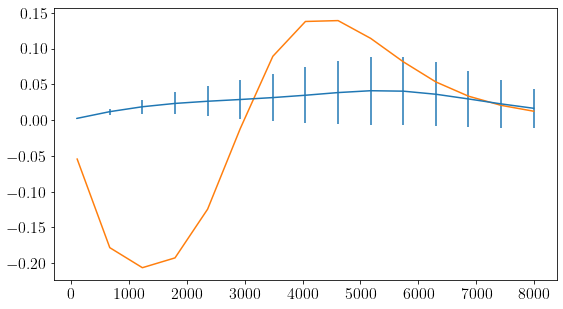

In [29]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [30]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['hf'])# np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])

In [40]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-7
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [41]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.27671205 0.01560102]


In [43]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

3.613864993644112
2snr, ie the snr on ffree 7.227729987288224
64.09838183751812


In [70]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'gal_lens_hf,gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 8.935682599002641e-08,# green: 1.6501485362946912e-07 # blue: 8.935682599002641e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 108.9509 seconds


In [71]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['hf'])#np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

22.431731982622733
44.863463965245465


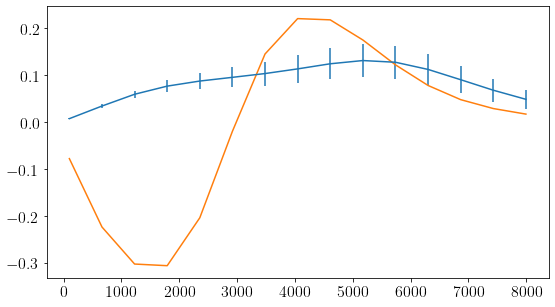

In [72]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [73]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['hf'])# np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])

In [74]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-9
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]
comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [75]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.06267155 0.0098793 ]


In [76]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

15.956203542008442
2snr, ie the snr on ffree 31.912407084016884
101.2217061971119


# halo model forecasts

### Planck x unWISE

In [126]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',

# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,  
        
        
'gas profile' : 'nfw', # set NFW profile
# 'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.5e-07,# green: 1.5e-07 # blue: 2.4e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 41.5571 seconds


In [127]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

1.1358331001696225
2.271666200339245


In [128]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999987642741822
2.035710004972001


In [129]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot/2.03 # bg_eff green 2.03
cl_lens = cl_lens/2.03 # bg_eff green 2.03


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

0.5595236946648386
1.1190473893296773


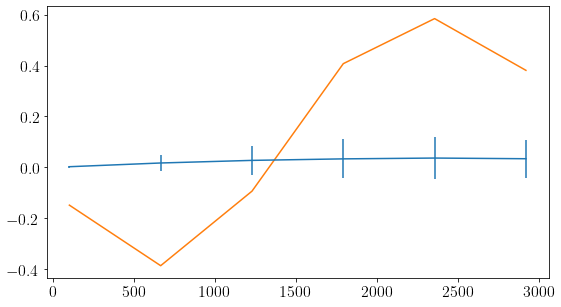

In [130]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [131]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-9
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]

cl_ksz_tot = cl_ksz_tot

comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [132]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[1.88890098 0.05873113]


In [134]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

0.5294083752566414
2snr, ie the snr on ffree 1.0588167505132828
17.026744458529873


0.577591661928238

blue

In [135]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',

# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'nfw', # set NFW profile
# 'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 39.7342 seconds


In [136]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

2.384198309684496
4.768396619368992


In [137]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4898086687397079


In [138]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot/1.49 # bg_eff blue 1.49
cl_lens = cl_lens/1.49 # bg_eff blue 1.49


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

1.6001330937479838
3.2002661874959677


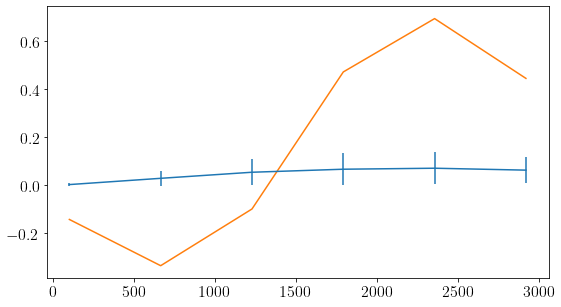

In [139]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [140]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-6
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]



comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)

#     cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
#     cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [141]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.62705686 0.04536615]


In [142]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

1.5947516989297459
2snr, ie the snr on ffree 3.1895033978594918
22.04286585429787


# same with agn profiles

In [126]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',

# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,  
        
        
'gas profile' : 'nfw', # set NFW profile
# 'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.5e-07,# green: 1.5e-07 # blue: 2.4e-08,
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 41.5571 seconds


In [144]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

0.5687394048415408
1.1374788096830817


In [145]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4898086687397079


In [146]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot/2.03 # bg_eff green 2.03
cl_lens = cl_lens/2.03 # bg_eff green 2.03


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

0.28016719450322214
0.5603343890064443


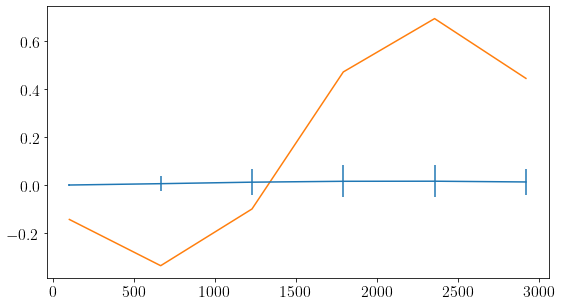

In [147]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [148]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-9
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]

cl_ksz_tot = cl_ksz_tot

comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [149]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[3.57377421 0.06194514]


In [150]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

0.2798162225340652
2snr, ie the snr on ffree 0.5596324450681304
16.14331709959283


blue

In [151]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',

# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', # set Battaglia 16 profile
'gas profile mode' : 'agn',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 35.2631 seconds


In [152]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

0.5687394048415408
1.1374788096830817


In [153]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4898086687397079


In [154]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot/1.49 # bg_eff blue 1.49
cl_lens = cl_lens/1.49 # bg_eff blue 1.49


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

0.3817042985513697
0.7634085971027395


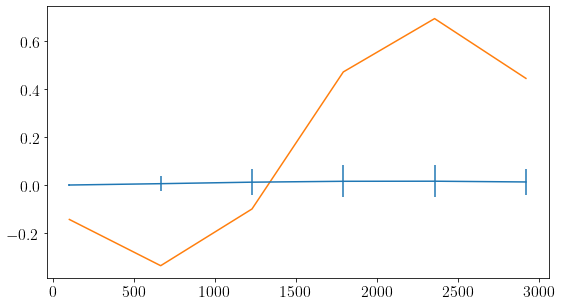

In [155]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [156]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-6
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]



comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)

#     cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
#     cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [157]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[2.62311682 0.04546712]


In [158]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

0.38122587334148766
2snr, ie the snr on ffree 0.7624517466829753
21.99391508989613


# AdvACT x unWISE blue

In [159]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'nfw', # set nfw
# 'gas profile mode' : 'agn',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 45.8675 seconds


In [160]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

52.144186863547276
104.28837372709455


In [161]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4898086687397079


In [162]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot/1.49 # bg_eff blue 1.49
cl_lens = cl_lens/1.49 # bg_eff blue 1.49


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

34.99609856613912
69.99219713227824


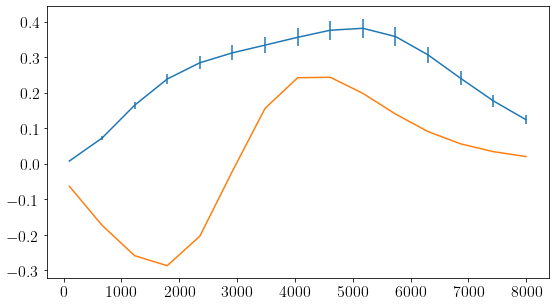

In [163]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [164]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-6
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]



comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)

#     cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
#     cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [165]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.03043338 0.01879819]


In [166]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

32.85865507903248
2snr, ie the snr on ffree 65.71731015806496
53.19661831158964


#### agn

In [167]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', # set nfw
'gas profile mode' : 'agn',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 60.0949 seconds


In [168]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

6.857365770975633
13.714731541951267


In [169]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4898086687397079


In [170]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot/1.49 # bg_eff blue 1.49
cl_lens = cl_lens/1.49 # bg_eff blue 1.49


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

4.602258906695055
9.20451781339011


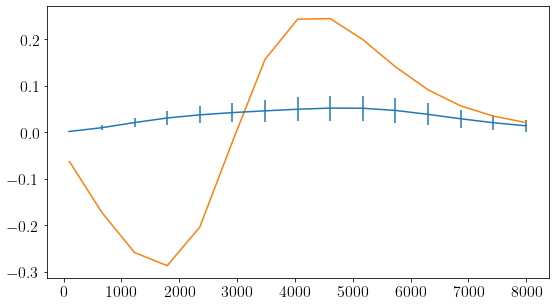

In [171]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [172]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-6
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]



comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)

#     cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
#     cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [173]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.2244048  0.01908262]


In [174]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

4.45623262729547
2snr, ie the snr on ffree 8.91246525459094
52.40369688308165


# so xunwise blue

#### agn

In [176]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', # set nfw
'gas profile mode' : 'agn',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 56.5247 seconds


In [178]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

26.937906628664336
53.87581325732867


In [179]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4898086687397079


In [180]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot/1.49 # bg_eff blue 1.49
cl_lens = cl_lens/1.49 # bg_eff blue 1.49


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

18.079131965546534
36.15826393109307


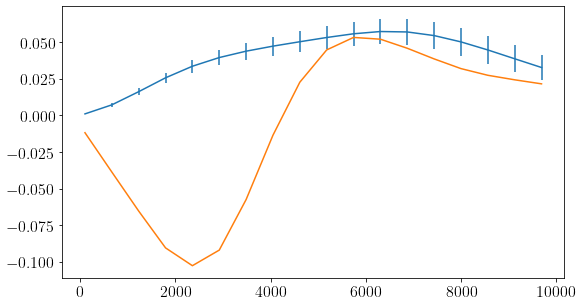

In [181]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [182]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-6
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]



comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)

#     cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
#     cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [183]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.05574457 0.01997988]


In [184]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

17.938966614976003
2snr, ie the snr on ffree 35.877933229952006
50.05033866973351


# s4xunwise blue

#### agn

In [185]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/s4_filter_functions_l_fl_230222.txt',

'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_nl.txt',



        
# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', # set nfw
'gas profile mode' : 'agn',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 58.6403 seconds


In [186]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

48.94870978044708
97.89741956089416


In [187]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4898086687397079


In [188]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot/1.49 # bg_eff blue 1.49
cl_lens = cl_lens/1.49 # bg_eff blue 1.49


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

32.85148307412556
65.70296614825112


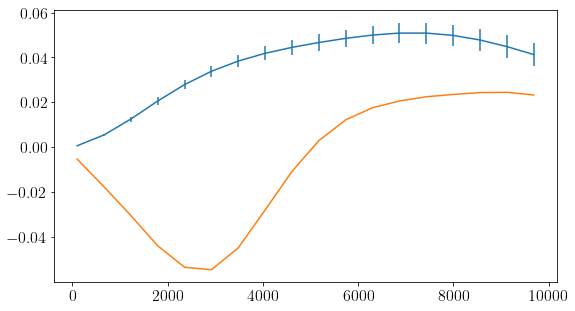

In [189]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [190]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-6
param_list = ['A_ksz','b_g']
param_fiducial_values = [1.,1.]



comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*param_fiducial_values[1]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    
    if i==0: # A_ksz case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[1]*cl_ksz_tot
    if i==1: # b_g case
        cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot + delta_p_over_p*param_fiducial_values[i]*cl_lens 
        cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*param_fiducial_values[0]*cl_ksz_tot - delta_p_over_p*param_fiducial_values[i]*cl_lens 

    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)

#     cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
#     cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
#     dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [191]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.03067573 0.02041111]


In [192]:
# snr
for i in range(len(param_list)):
    snr = param_fiducial_values[i]/fisher_sigmas[i]
    print(snr)
    if i==0:
        print('2snr, ie the snr on ffree',2.*snr)

32.59906606407366
2snr, ie the snr on ffree 65.19813212814732
48.99292994794085


# Now fisher on gas+HOD with prior


### agn fiducial

In [41]:
import uncertainties as un
om = un.ufloat(0.1430,0.0011)
ob = un.ufloat(0.02237,0.00015)
ob/om

0.15643356643356646+/-0.00159634386319258


## Planck x unWISE blue

In [153]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
              'sigma_log10M_HOD',
              'alpha_s_HOD',
              'M1_prime_HOD',
              'M_min_HOD',
              'x_out_truncated_nfw_profile_satellite_galaxies'
             ]

prior_list = [0.001596,#0.001596, # f_b_gas: 0.001596
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                         0.69, # sigma_log10M_HOD
                         1.30, # alpha_s_HOD
                         5.03e12, # Msun/h # M1_prime_HOD
                         6.25e11, # Msun/h M_min
                         1.09, # x_out_truncated_nfw_profile_satellite_galaxies
                        ]

fac = 1.

In [154]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
'ndim_masses' : 50,
'ndim_redshifts' : 50,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.005,
# 'N_samp_fftw' : 250,
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.1,
    
    
'k_min_for_pk_class_sz' : 0.01,
# 'k_max_for_pk_class_sz' : 6.0,
'k_per_decade_class_sz' : 15,
# 'P_k_max_h/Mpc' : 10.0,
    

'N_kSZ2_gal_multipole_grid' :  30,
'N_kSZ2_gal_theta_grid' :  30,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

'n_z_psi_b1g' : 20,
'n_l_psi_b1g' : 20,

'n_z_psi_b2g' : 20,
'n_l_psi_b2g' : 20,

'n_z_psi_b2t' : 20,
'n_l_psi_b2t' : 20,

'n_z_psi_b1t' : 20,
'n_l_psi_b1t' : 20,

'n_z_psi_b1gt' : 20,
'n_l_psi_b1gt' : 20,
})


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 15.2288 seconds


In [155]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)
print(covll)

0.47989130953656317
0.9597826190731263
[1.91824998e-37 3.27317214e-39 8.90004843e-40 3.05050435e-40
 1.01842194e-40 2.95132989e-41]


In [156]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4765477368286941


In [157]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot
cl_lens = cl_lens


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

0.47989130953656317
0.9597826190731263


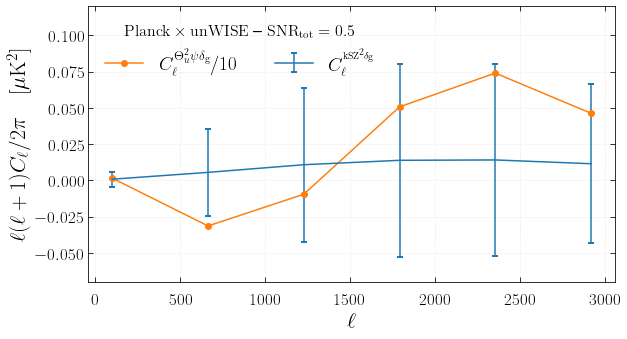

In [161]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}$')
ax.plot(l,
        fac_plc*cl_lensing/10.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \delta_\mathrm{g}}/10$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{Planck\times unWISE}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=0.5$')
ax.set_ylim(-0.07,0.12)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig('cls_planck_unwise.pdf')

# planck unwise blue with nfw

In [162]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
'ndim_masses' : 50,
'ndim_redshifts' : 50,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.005,
# 'N_samp_fftw' : 250,
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.1,
    
    
'k_min_for_pk_class_sz' : 0.01,
# 'k_max_for_pk_class_sz' : 6.0,
'k_per_decade_class_sz' : 15,
# 'P_k_max_h/Mpc' : 10.0,
    

'N_kSZ2_gal_multipole_grid' :  30,
'N_kSZ2_gal_theta_grid' :  30,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

'n_z_psi_b1g' : 20,
'n_l_psi_b1g' : 20,

'n_z_psi_b2g' : 20,
'n_l_psi_b2g' : 20,

'n_z_psi_b2t' : 20,
'n_l_psi_b2t' : 20,

'n_z_psi_b1t' : 20,
'n_l_psi_b1t' : 20,

'n_z_psi_b1gt' : 20,
'n_l_psi_b1gt' : 20,
})


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'nfw', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 14.1997 seconds


In [163]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)
print(covll)

2.024299807976008
4.048599615952016
[1.91825514e-37 3.27317679e-39 8.90005592e-40 3.05050606e-40
 1.01842244e-40 2.95133123e-41]


In [164]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4765477368286941


In [165]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot
cl_lens = cl_lens


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

2.024299807976008
4.048599615952016


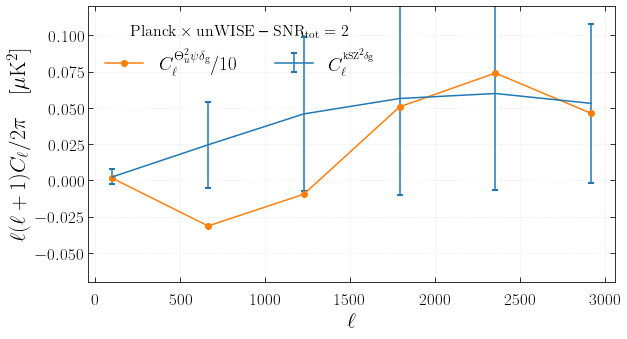

In [167]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}$')
ax.plot(l,
        fac_plc*cl_lensing/10.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \delta_\mathrm{g}}/10$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{Planck\times unWISE}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=2$')
ax.set_ylim(-0.07,0.12)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig('cls_planck_unwise_nfw.pdf')


## advact x unWISE blue

In [143]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
              'sigma_log10M_HOD',
              'alpha_s_HOD',
              'M1_prime_HOD',
              'M_min_HOD',
              'x_out_truncated_nfw_profile_satellite_galaxies'
             ]

prior_list = [0.001596,#0.001596, # f_b_gas: 0.001596
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                         0.69, # sigma_log10M_HOD
                         1.30, # alpha_s_HOD
                         5.03e12, # Msun/h # M1_prime_HOD
                         6.25e11, # Msun/h M_min
                         1.09, # x_out_truncated_nfw_profile_satellite_galaxies
                        ]

fac = 1.

In [144]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
'ndim_masses' : 50,
'ndim_redshifts' : 50,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.005,
# 'N_samp_fftw' : 250,
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.1,
    
    
'k_min_for_pk_class_sz' : 0.01,
# 'k_max_for_pk_class_sz' : 6.0,
'k_per_decade_class_sz' : 15,
# 'P_k_max_h/Mpc' : 10.0,
    

'N_kSZ2_gal_multipole_grid' :  30,
'N_kSZ2_gal_theta_grid' :  30,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

'n_z_psi_b1g' : 20,
'n_l_psi_b1g' : 20,

'n_z_psi_b2g' : 20,
'n_l_psi_b2g' : 20,

'n_z_psi_b2t' : 20,
'n_l_psi_b2t' : 20,

'n_z_psi_b1t' : 20,
'n_l_psi_b1t' : 20,

'n_z_psi_b1gt' : 20,
'n_l_psi_b1gt' : 20,
})


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 25.2608 seconds


In [145]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)
print(covll)

5.785668673048558
11.571337346097115
[6.18743325e-39 1.12142453e-40 3.46274867e-41 1.51686617e-41
 7.71729545e-42 4.35756323e-42 2.66841830e-42 1.73183837e-42
 1.14842505e-42 7.39626770e-43 4.44112729e-43 2.45032246e-43
 1.26440149e-43 6.26450521e-44 2.99916320e-44]


In [146]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4765477368286941


In [147]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot
cl_lens = cl_lens


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

5.785668673048558
11.571337346097115


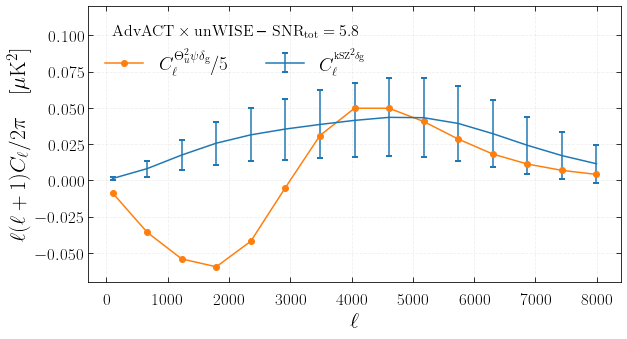

In [152]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}$')
ax.plot(l,
        fac_plc*cl_lensing/5.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \delta_\mathrm{g}}/5$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{AdvACT\times unWISE}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=5.8$')
ax.set_ylim(-0.07,0.12)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig('cls_advact_unwise.pdf')

In [69]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_g()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 51.7526 seconds
computed in 57.7644 seconds
computed in 61.3189 seconds
computed in 62.1105 seconds
computed in 64.0525 seconds
computed in 63.6815 seconds
computed in 65.4544 seconds
computed in 64.4975 seconds


[]

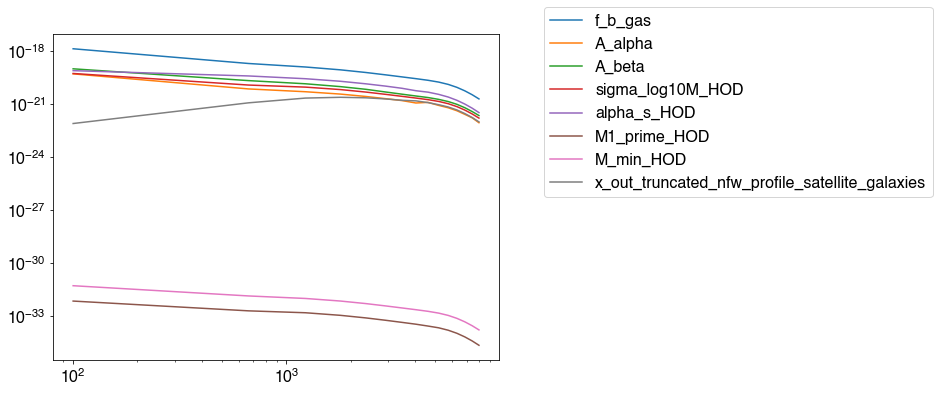

In [70]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.loglog()

[]

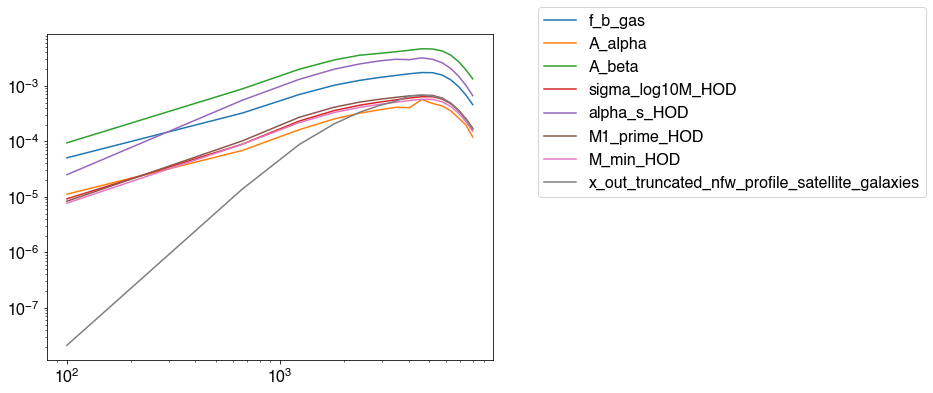

In [71]:
for i in range(len(param_list)):
    plt.plot(ell_array,np.fabs(dl_kSZ_kSZ_g_tot_plus[i]-dl_kSZ_kSZ_g_tot_minus[i]),
             label=param_list[i])

plt.legend(loc=(1.1,0.5))
plt.loglog()

In [77]:
#theory parameters
M_parameters = len(param_list)

# # data covariance matrix
# fac_cov = 1.
# covmat_data = fac_cov*np.diag((np.sqrt(2./(2.*np.asarray(ell_array)+1.))*(np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])))**2.)


# inv_covmat_data = np.linalg.inv(covmat_data)
# det_covmat_data = np.linalg.det(covmat_data)



dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)   

Fisher F
[[ 3.98536040e+05  2.64519238e+02  6.31172703e+02 -4.47599650e+02
   1.19140039e+03 -6.65497422e-11  4.49066796e-10 -2.32397714e+02]
 [ 2.64519238e+02  1.18934913e+01  2.81090517e+01 -2.00746413e+01
   5.32101812e+01 -2.97746179e-12  2.01111150e-11 -1.07133634e+01]
 [ 6.31172703e+02  2.81090517e+01  6.73752540e+01 -4.78656595e+01
   1.27953754e+02 -7.12872227e-12  4.80642445e-11 -2.49700899e+01]
 [-4.47599650e+02 -2.00746413e+01 -4.78656595e+01  5.02537749e+01
  -9.12784359e+01  5.09461934e-12 -3.43495754e-11  1.83503395e+01]
 [ 1.19140039e+03  5.32101812e+01  1.27953754e+02 -9.12784359e+01
   3.47326346e+02 -1.36716008e-11  9.18010027e-11 -4.80084287e+01]
 [-6.65497422e-11 -2.97746179e-12 -7.12872227e-12  5.09461934e-12
  -1.36716008e-11  8.00165019e-25 -5.11481492e-24  2.70585267e-12]
 [ 4.49066796e-10  2.01111150e-11  4.80642445e-11 -3.43495754e-11
   9.18010027e-11 -5.11481492e-24  3.54700903e-23 -1.83014286e-11]
 [-2.32397714e+02 -1.07133634e+01 -2.49700899e+01  1.8350339

In [78]:
np.diag(inverse_fisher_F)

array([2.54705317e-06, 6.31722343e+00, 1.55695974e+00, 6.19671383e-02,
       9.66205883e-03, 2.23007996e+25, 8.82291440e+23, 5.92687135e-02])

In [79]:
prior_mat

array([[1.596e-03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00,       inf, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00,       inf, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 2.500e-01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e-01, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+12,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+12, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.500e-01]])

In [80]:
np.save('test_fisher_advact_unwise_blue_fb_prior.npy',inverse_fisher_F)

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


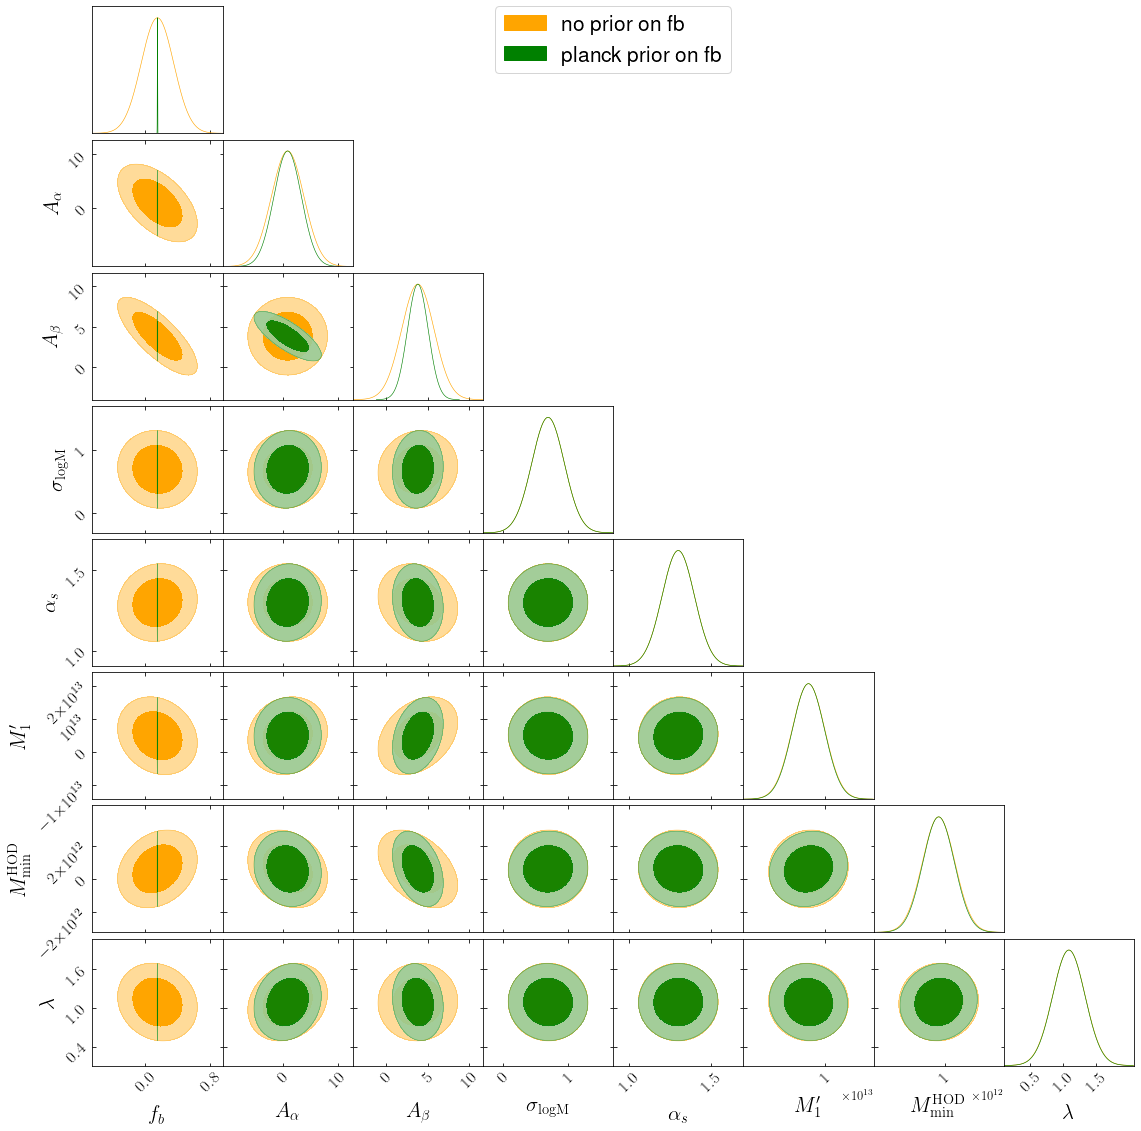

In [81]:
# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_planck = np.load('test_fisher_advact_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')
inverse_fisher_F_advact = np.load('test_fisher_advact_unwise_blue_fb_noprior.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A_{\alpha}$',r'$A_{\beta}$',r'\sigma_\mathrm{log M}', r'\alpha_s',
         r'M_1^\prime', r'M_\mathrm{min}^\mathrm{HOD}', r'\lambda']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method
matrix1 = GaussianND(mean, inverse_fisher_F_planck, labels = labels, names = names)
matrix2 = GaussianND(mean, inverse_fisher_F_advact, labels = labels, names = names)

# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = True
g.settings.legend_fontsize = 24
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_y_rotation = 45
g.settings.alpha_filled_add = 0.9
g.settings.title_limit_fontsize = 1

g.triangle_plot([matrix2,matrix1], 
                names,
            filled = True,
            legend_labels = ['no prior on fb', 'planck prior on fb'], 
            contour_colors = ['orange','green'])

# Save triplot
g.export('advact_unwise_blue.pdf')


## so x unWISE blue

In [131]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
              'sigma_log10M_HOD',
              'alpha_s_HOD',
              'M1_prime_HOD',
              'M_min_HOD',
              'x_out_truncated_nfw_profile_satellite_galaxies'
             ]

prior_list = [0.001596,#0.001596, # f_b_gas: 0.001596
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                         0.69, # sigma_log10M_HOD
                         1.30, # alpha_s_HOD
                         5.03e12, # Msun/h # M1_prime_HOD
                         6.25e11, # Msun/h M_min
                         1.09, # x_out_truncated_nfw_profile_satellite_galaxies
                        ]

fac = 1.

In [132]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
'ndim_masses' : 50,
'ndim_redshifts' : 50,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.005,
# 'N_samp_fftw' : 250,
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.1,
    
    
'k_min_for_pk_class_sz' : 0.01,
# 'k_max_for_pk_class_sz' : 6.0,
'k_per_decade_class_sz' : 15,
# 'P_k_max_h/Mpc' : 10.0,
    

'N_kSZ2_gal_multipole_grid' :  30,
'N_kSZ2_gal_theta_grid' :  30,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

'n_z_psi_b1g' : 20,
'n_l_psi_b1g' : 20,

'n_z_psi_b2g' : 20,
'n_l_psi_b2g' : 20,

'n_z_psi_b2t' : 20,
'n_l_psi_b2t' : 20,

'n_z_psi_b1t' : 20,
'n_l_psi_b1t' : 20,

'n_z_psi_b1gt' : 20,
'n_l_psi_b1gt' : 20,
})


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 32.7143 seconds


In [133]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)
print(covll)

22.712920533818174
45.42584106763635
[2.92184802e-40 5.45996334e-42 1.79542250e-42 8.41755763e-43
 4.52381467e-43 2.65762686e-43 1.67363074e-43 1.11635643e-43
 7.82413384e-44 5.74159912e-44 4.37395937e-44 3.40538559e-44
 2.65727093e-44 2.04874804e-44 1.55149563e-44 1.15321612e-44
 8.42367708e-45 6.02154089e-45]


In [134]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4765477368286941


In [135]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot
cl_lens = cl_lens


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

22.712920533818174
45.42584106763635


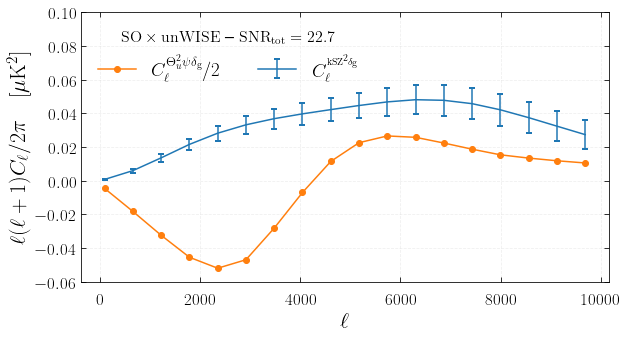

In [142]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}$')
ax.plot(l,
        fac_plc*cl_lensing/2.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \delta_\mathrm{g}}/2$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{SO\times unWISE}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=22.7$')
ax.set_ylim(-0.06,0.1)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig('cls_so_unwise.pdf')

In [48]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_g()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 64.2783 seconds
computed in 68.7091 seconds
computed in 69.6433 seconds
computed in 73.0502 seconds
computed in 75.8566 seconds
computed in 75.9061 seconds
computed in 75.4828 seconds
computed in 77.2886 seconds


[]

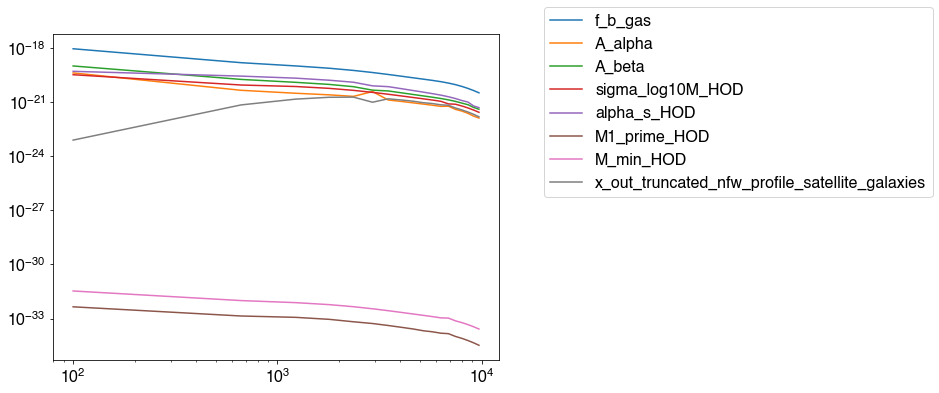

In [49]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.loglog()

[]

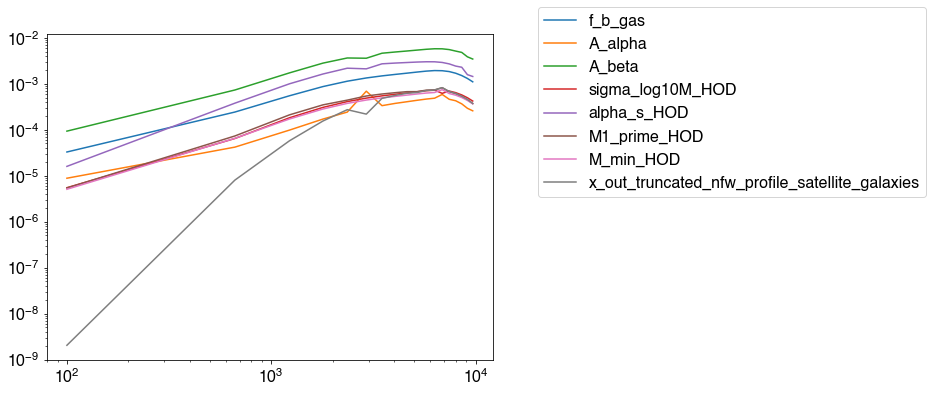

In [50]:
for i in range(len(param_list)):
    plt.plot(ell_array,np.fabs(dl_kSZ_kSZ_g_tot_plus[i]-dl_kSZ_kSZ_g_tot_minus[i]),
             label=param_list[i])

plt.legend(loc=(1.1,0.5))
plt.loglog()

In [58]:
#theory parameters
M_parameters = len(param_list)

# # data covariance matrix
# fac_cov = 1.
# covmat_data = fac_cov*np.diag((np.sqrt(2./(2.*np.asarray(ell_array)+1.))*(np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])))**2.)


# inv_covmat_data = np.linalg.inv(covmat_data)
# det_covmat_data = np.linalg.det(covmat_data)



dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)   

Fisher F
[[ 4.84291809e+05  3.97093270e+03  1.09034985e+04 -7.04989903e+03
   1.71778447e+04 -1.03083219e-09  7.15488830e-09 -3.22102484e+03]
 [ 3.97093270e+03  1.90001069e+02  4.66320112e+02 -3.06391112e+02
   7.35358107e+02 -4.49560895e-11  3.11367665e-10 -1.24140700e+02]
 [ 1.09034985e+04  4.66320112e+02  1.29904064e+03 -8.38912354e+02
   2.05029910e+03 -1.22673182e-10  8.51333622e-10 -3.88121353e+02]
 [-7.04989903e+03 -3.06391112e+02 -8.38912354e+02  5.65675008e+02
  -1.33517150e+03  8.01199773e-11 -5.55924418e-10  2.56248768e+02]
 [ 1.71778447e+04  7.35358107e+02  2.05029910e+03 -1.33517150e+03
   3.40300189e+03 -1.96159846e-10  1.35458278e-09 -6.10811379e+02]
 [-1.03083219e-09 -4.49560895e-11 -1.22673182e-10  8.01199773e-11
  -1.96159846e-10  1.18018697e-23 -8.14215631e-23  3.69365996e-11]
 [ 7.15488830e-09  3.11367665e-10  8.51333622e-10 -5.55924418e-10
   1.35458278e-09 -8.14215631e-23  5.66163629e-22 -2.60144416e-10]
 [-3.22102484e+03 -1.24140700e+02 -3.88121353e+02  2.5624876

In [59]:
np.diag(inverse_fisher_F)

array([2.54698897e-06, 9.14330080e-02, 5.95372229e-02, 5.29724477e-02,
       8.05677185e-03, 1.32250269e+25, 3.97858769e+23, 2.85046524e-02])

In [60]:
prior_mat

array([[1.596e-03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00,       inf, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00,       inf, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 2.500e-01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e-01, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+12,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+12, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.500e-01]])

In [61]:
np.save('test_fisher_so_unwise_blue_fb_prior.npy',inverse_fisher_F)

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


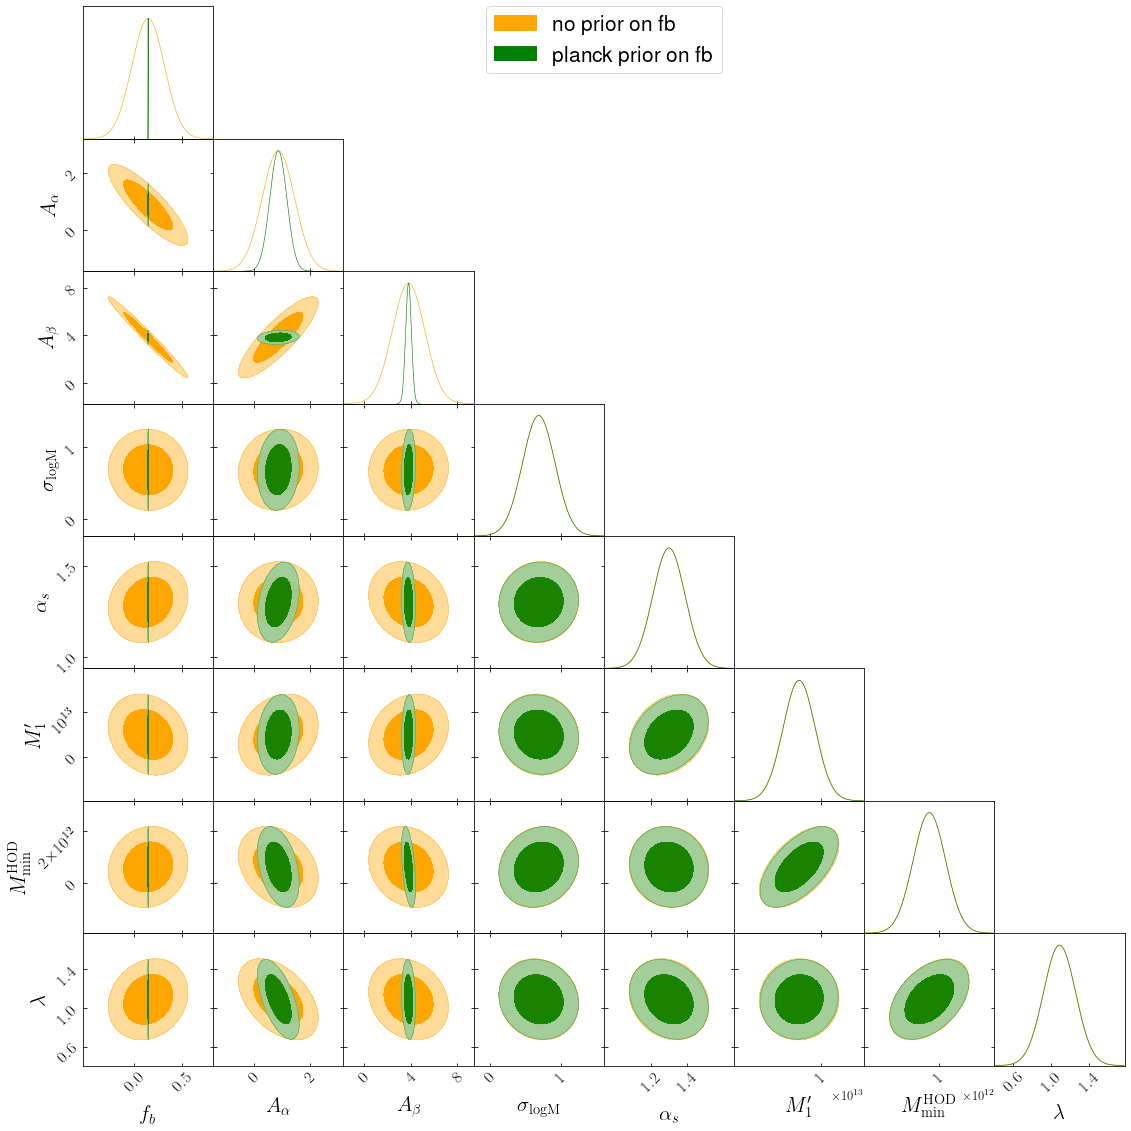

In [62]:
# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_planck = np.load('test_fisher_so_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')
inverse_fisher_F_advact = np.load('test_fisher_so_unwise_blue_fb_noprior.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A_{\alpha}$',r'$A_{\beta}$',r'\sigma_\mathrm{log M}', r'\alpha_s',
         r'M_1^\prime', r'M_\mathrm{min}^\mathrm{HOD}', r'\lambda']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method
matrix1 = GaussianND(mean, inverse_fisher_F_planck, labels = labels, names = names)
matrix2 = GaussianND(mean, inverse_fisher_F_advact, labels = labels, names = names)

# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = True
g.settings.legend_fontsize = 24
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_y_rotation = 45
g.settings.alpha_filled_add = 0.9
g.settings.title_limit_fontsize = 1

g.triangle_plot([matrix2,matrix1], 
                names,
            filled = True,
            legend_labels = ['no prior on fb', 'planck prior on fb'], 
            contour_colors = ['orange','green'])

# Save triplot
g.export('so_unwise_blue.pdf')


## s4 x unWISE blue

In [120]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
              'sigma_log10M_HOD',
              'alpha_s_HOD',
              'M1_prime_HOD',
              'M_min_HOD',
              'x_out_truncated_nfw_profile_satellite_galaxies'
             ]

prior_list = [np.inf,#0.001596, # f_b_gas: 0.001596
              np.inf, # A_alpha
              np.inf, # A_beta
              0.25, # sigma_log10M_HOD
              0.10, # alpha_s_HOD
              5e12,  # Msun/h # M1_prime_HOD
              1e12,  #  Msun/h M_min
              0.25 # x_out_truncated_nfw_profile_satellite_galaxies
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                         0.69, # sigma_log10M_HOD
                         1.30, # alpha_s_HOD
                         5.03e12, # Msun/h # M1_prime_HOD
                         6.25e11, # Msun/h M_min
                         1.09, # x_out_truncated_nfw_profile_satellite_galaxies
                        ]

fac = 1.

In [121]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
'ndim_masses' : 50,
'ndim_redshifts' : 50,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.005,
# 'N_samp_fftw' : 250,
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.1,
    
    
'k_min_for_pk_class_sz' : 0.01,
# 'k_max_for_pk_class_sz' : 6.0,
'k_per_decade_class_sz' : 15,
# 'P_k_max_h/Mpc' : 10.0,
    

'N_kSZ2_gal_multipole_grid' :  30,
'N_kSZ2_gal_theta_grid' :  30,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

'n_z_psi_b1g' : 20,
'n_l_psi_b1g' : 20,

'n_z_psi_b2g' : 20,
'n_l_psi_b2g' : 20,

'n_z_psi_b2t' : 20,
'n_l_psi_b2t' : 20,

'n_z_psi_b1t' : 20,
'n_l_psi_b1t' : 20,

'n_z_psi_b1gt' : 20,
'n_l_psi_b1gt' : 20,
})


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/s4_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_nl.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 29.0304 seconds


In [122]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)
print(covll)

41.2648452125111
82.5296904250222
[6.39868402e-41 1.19672317e-42 3.97694328e-43 1.89167716e-43
 1.03097724e-43 6.11809110e-44 3.86615165e-44 2.57009539e-44
 1.78593752e-44 1.30056132e-44 9.90479191e-45 7.81223511e-45
 6.28271270e-45 5.07500598e-45 4.07877168e-45 3.24874436e-45
 2.55341647e-45 1.97395234e-45]


In [123]:
get_mean_galaxy_bias_at_z = np.vectorize(M.get_mean_galaxy_bias_at_z)
get_galaxy_number_counts = np.vectorize(M.get_galaxy_number_counts)
z_ar = np.linspace(0.,4.,1000)
print(np.trapz(get_galaxy_number_counts(z_ar),z_ar))
print(np.trapz(get_galaxy_number_counts(z_ar)*get_mean_galaxy_bias_at_z(z_ar),z_ar))

0.9999976351785125
1.4765477368286941


In [124]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot
cl_lens = cl_lens


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

41.2648452125111
82.5296904250222


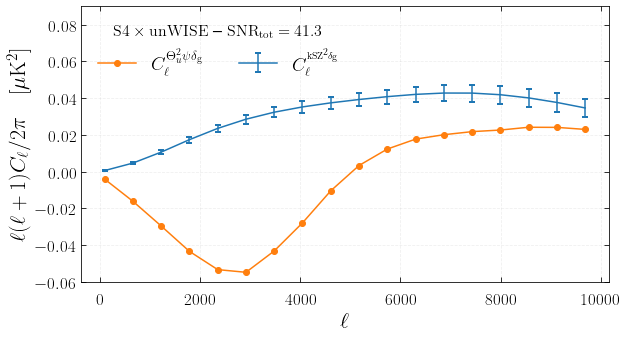

In [130]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}$')
ax.plot(l,
        fac_plc*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \delta_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{S4\times unWISE}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=41.3$')
ax.set_ylim(-0.06,0.09)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig('cls_s4_unwise.pdf')

In [262]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_g()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_g()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 61.0288 seconds
computed in 67.2398 seconds
computed in 71.1925 seconds
computed in 71.1865 seconds
computed in 80.1710 seconds
computed in 76.7339 seconds
computed in 79.3908 seconds
computed in 81.1772 seconds


[]

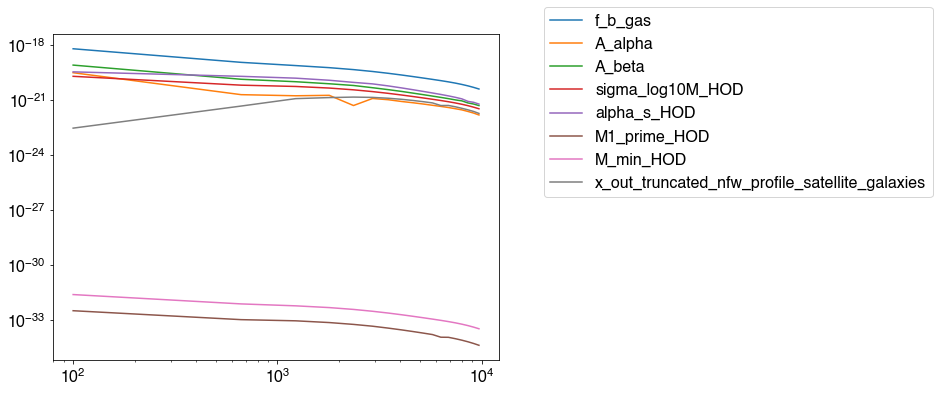

In [263]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.loglog()

[]

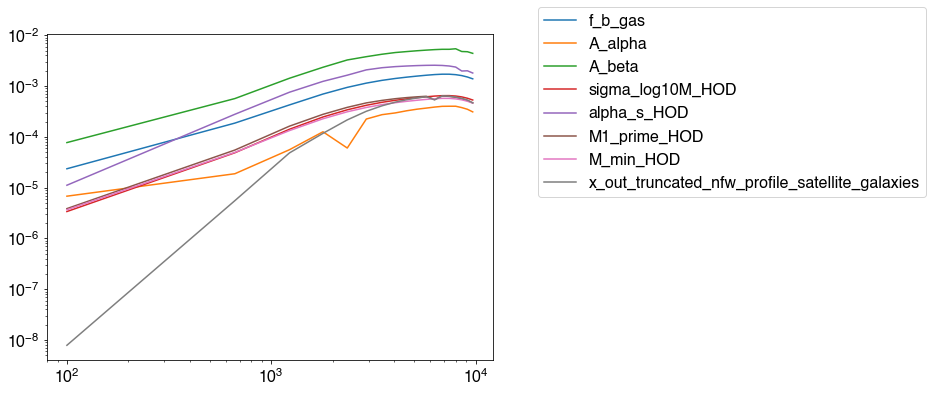

In [264]:
for i in range(len(param_list)):
    plt.plot(ell_array,np.fabs(dl_kSZ_kSZ_g_tot_plus[i]-dl_kSZ_kSZ_g_tot_minus[i]),
             label=param_list[i])

plt.legend(loc=(1.1,0.5))
plt.loglog()

In [285]:
#theory parameters
M_parameters = len(param_list)

# # data covariance matrix
# fac_cov = 1.
# covmat_data = fac_cov*np.diag((np.sqrt(2./(2.*np.asarray(ell_array)+1.))*(np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])))**2.)


# inv_covmat_data = np.linalg.inv(covmat_data)
# det_covmat_data = np.linalg.det(covmat_data)



dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)   

Fisher F
[[ 3.02703039e+05  1.02828219e+04  3.80989366e+04 -2.37481891e+04
   5.53299981e+04 -3.37217969e-09  2.36316558e-08 -1.21835739e+04]
 [ 1.02828219e+04  3.72562444e+02  1.28689498e+03 -8.10454250e+02
   1.84531092e+03 -1.13661863e-10  8.03186597e-10 -4.34568051e+02]
 [ 3.80989366e+04  1.28689498e+03  4.80215058e+03 -2.98764040e+03
   6.98283310e+03 -4.25165101e-10  2.97404796e-09 -1.52521297e+03]
 [-2.37481891e+04 -8.10454250e+02 -2.98764040e+03  1.90290072e+03
  -4.37677816e+03  2.67064089e-10 -1.87246242e-09  9.86666972e+02]
 [ 5.53299981e+04  1.84531092e+03  6.98283310e+03 -4.37677816e+03
   1.04356524e+04 -6.25653120e-10  4.35529009e-09 -2.23540689e+03]
 [-3.37217969e-09 -1.13661863e-10 -4.25165101e-10  2.67064089e-10
  -6.25653120e-10  3.81099532e-23 -2.65444961e-22  1.37984191e-10]
 [ 2.36316558e-08  8.03186597e-10  2.97404796e-09 -1.87246242e-09
   4.35529009e-09 -2.65444961e-22  1.86068392e-21 -9.72797344e-10]
 [-1.21835739e+04 -4.34568051e+02 -1.52521297e+03  9.8666697

In [286]:
np.diag(inverse_fisher_F)

array([5.58572476e-03, 8.93802214e-02, 2.95125296e-01, 5.74319206e-02,
       7.05154808e-03, 7.94867832e+24, 3.00565087e+23, 3.84811593e-02])

In [287]:
prior_mat

array([[    inf, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00],
       [0.0e+00,     inf, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00],
       [0.0e+00, 0.0e+00,     inf, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 2.5e-01, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e-01, 0.0e+00, 0.0e+00,
        0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 5.0e+12, 0.0e+00,
        0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+12,
        0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        2.5e-01]])

In [288]:
np.save('test_fisher_s4_unwise_blue_fb_noprior.npy',inverse_fisher_F)

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


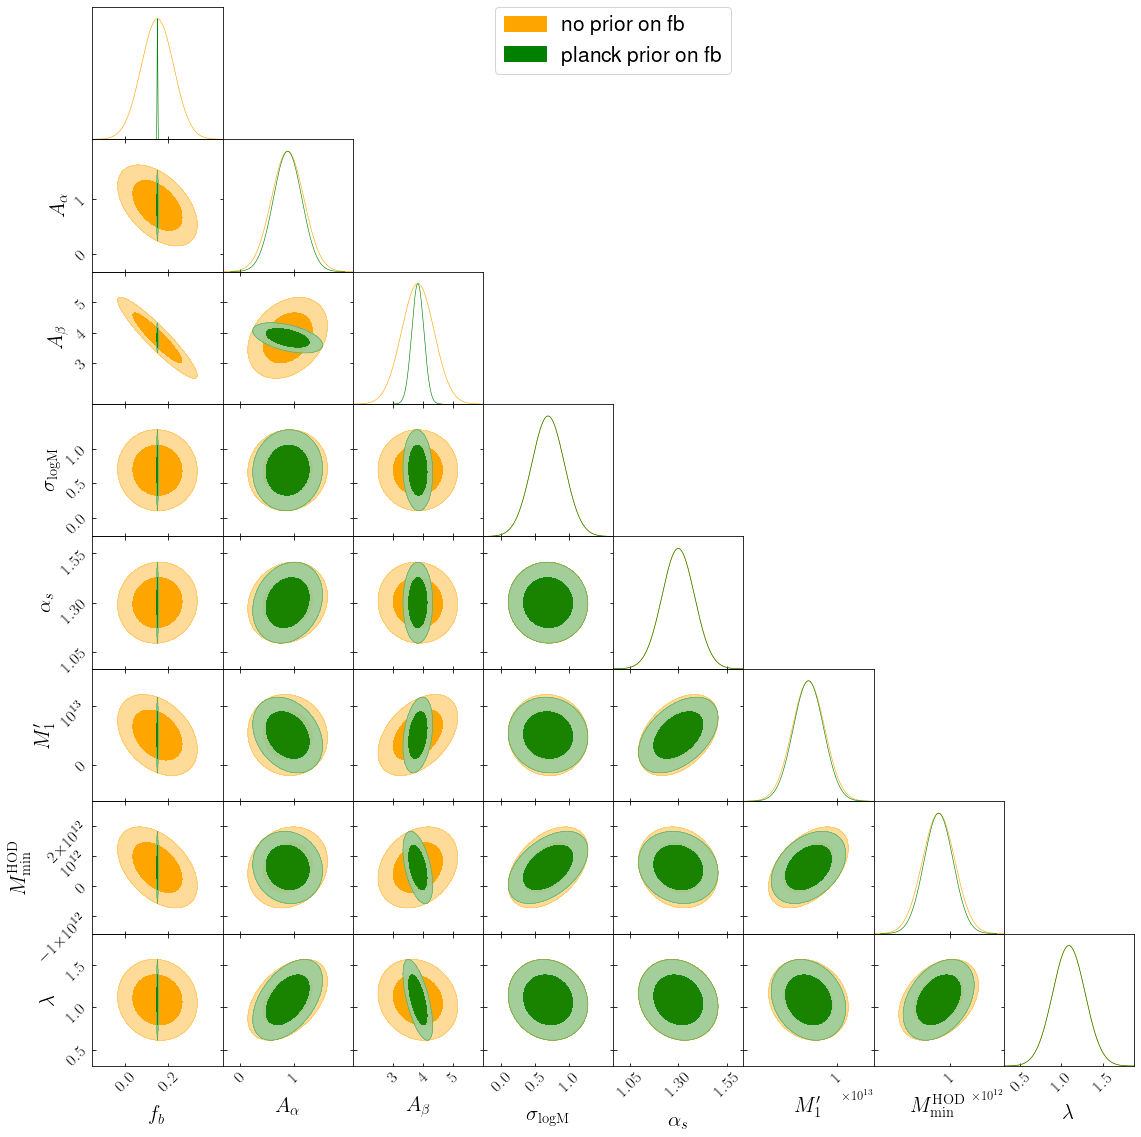

In [291]:
# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_planck = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')
inverse_fisher_F_advact = np.load('test_fisher_s4_unwise_blue_fb_noprior.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A_{\alpha}$',r'$A_{\beta}$',r'\sigma_\mathrm{log M}', r'\alpha_s',
         r'M_1^\prime', r'M_\mathrm{min}^\mathrm{HOD}', r'\lambda']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method
matrix1 = GaussianND(mean, inverse_fisher_F_planck, labels = labels, names = names)
matrix2 = GaussianND(mean, inverse_fisher_F_advact, labels = labels, names = names)

# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = True
g.settings.legend_fontsize = 24
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_y_rotation = 45
g.settings.alpha_filled_add = 0.9
g.settings.title_limit_fontsize = 1

g.triangle_plot([matrix2,matrix1], 
                names,
            filled = True,
            legend_labels = ['no prior on fb', 'planck prior on fb'], 
            contour_colors = ['orange','green'])

# Save triplot
g.export('s4_unwise_blue.pdf')

# advACT x DES shear

In [113]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]

prior_list = [0.001596,#0.001596, # f_b_gas: 0.001596
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [114]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
'ndim_masses' : 50,
'ndim_redshifts' : 50,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.005,
# 'N_samp_fftw' : 250,
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.1,
    
    
'k_min_for_pk_class_sz' : 0.01,
# 'k_max_for_pk_class_sz' : 6.0,
'k_per_decade_class_sz' : 15,
# 'P_k_max_h/Mpc' : 10.0,
    

'N_kSZ2_gal_multipole_grid' :  30,
'N_kSZ2_gal_theta_grid' :  30,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

'n_z_psi_b1g' : 20,
'n_l_psi_b1g' : 20,

'n_z_psi_b2g' : 20,
'n_l_psi_b2g' : 20,

'n_z_psi_b2t' : 20,
'n_l_psi_b2t' : 20,

'n_z_psi_b1t' : 20,
'n_l_psi_b1t' : 20,

'n_z_psi_b1gt' : 20,
'n_l_psi_b1gt' : 20,
})


M.set(
    {
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',

        
'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 8,

        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 32.7307 seconds


In [115]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_kg()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)
print(covll)

0.9324467586648836
1.8648935173297672
[1.68506655e-41 1.15991206e-42 5.32087154e-43 3.08340748e-43
 2.00069369e-43 1.39850174e-43 1.03053598e-43 7.84251955e-44
 5.95720075e-44 4.30498562e-44 2.84998903e-44 1.70790694e-44
 9.45268458e-45 4.97027553e-45 2.50382967e-45]


In [116]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot
cl_lens = cl_lens


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

0.9324467586648836
1.8648935173297672


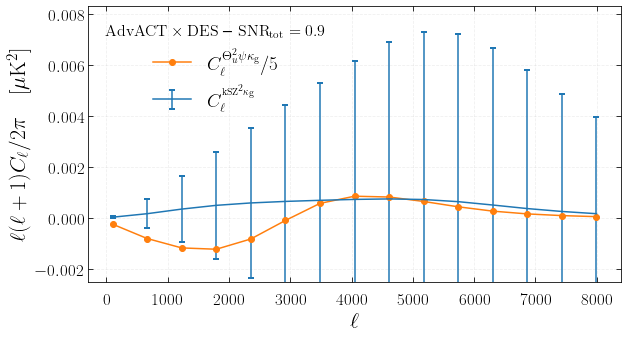

In [119]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_plc*cl_lensing/5.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}/5$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=1,
          loc=2,
          title=r'$\mathrm{AdvACT\times DES}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=0.9$')
ax.set_ylim(-0.0025,0.0083)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig('cls_advact_des_lensing.pdf')

In [91]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 70.6323 seconds
computed in 77.1456 seconds
computed in 83.5403 seconds


[]

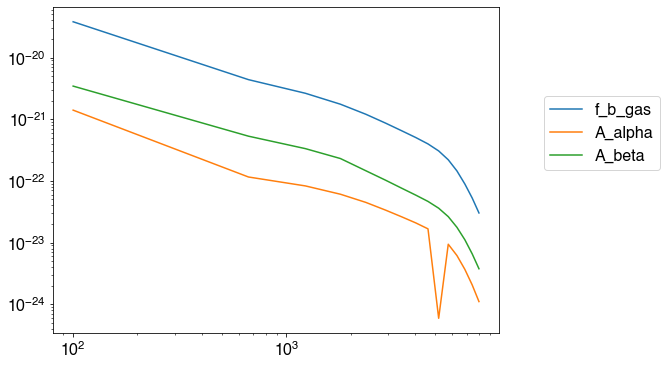

In [92]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.loglog()

In [93]:
dcl_kSZ_kSZ_g_tot

[array([3.79895093e-20, 4.37949627e-21, 2.63217340e-21, 1.75083002e-21,
        1.20447156e-21, 8.62982214e-22, 6.46160120e-22, 5.03442867e-22,
        3.97705574e-22, 3.06088456e-22, 2.20091122e-22, 1.45084207e-22,
        8.89897300e-23, 5.28489658e-23, 3.02371460e-23]),
 array([ 1.40321242e-21,  1.15704918e-22,  8.29385989e-23,  6.08268078e-23,
         4.48658955e-23,  3.35625470e-23,  2.60382176e-23,  2.08073891e-23,
         1.67025605e-23, -5.93323606e-25,  9.40554315e-24,  6.17090008e-24,
         3.67659433e-24,  2.06270958e-24,  1.10645270e-24]),
 array([3.44155001e-21, 5.30906200e-22, 3.33439004e-22, 2.30444334e-22,
        1.46293912e-22, 1.02513073e-22, 7.56876052e-23, 5.86623501e-23,
        4.65159492e-23, 3.60981122e-23, 2.63665214e-23, 1.76899008e-23,
        1.11078102e-23, 6.57828789e-24, 3.76884852e-24])]

[]

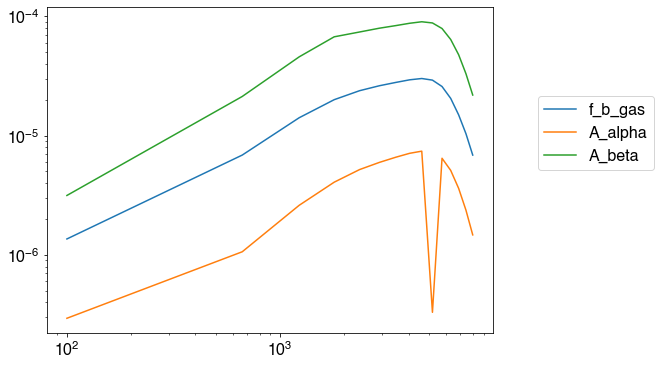

In [94]:
for i in range(len(param_list)):
    plt.plot(ell_array,np.fabs(dl_kSZ_kSZ_g_tot_plus[i]-dl_kSZ_kSZ_g_tot_minus[i]),
             label=param_list[i])

plt.legend(loc=(1.1,0.5))
plt.loglog()

In [100]:
#theory parameters
M_parameters = len(param_list)

# # data covariance matrix
# fac_cov = 1.
# covmat_data = fac_cov*np.diag((np.sqrt(2./(2.*np.asarray(ell_array)+1.))*(np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])))**2.)


# inv_covmat_data = np.linalg.inv(covmat_data)
# det_covmat_data = np.linalg.det(covmat_data)



dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)   

Fisher F
[[3.92740007e+05 5.43235751e+00 1.62270469e+01]
 [5.43235751e+00 1.96334815e-01 5.65433621e-01]
 [1.62270469e+01 5.65433621e-01 1.74540204e+00]]
Inverse Fisher F^-1
[[ 2.54720738e-06 -3.39727336e-05 -1.26757775e-05]
 [-3.39727336e-05  7.59932068e+01 -2.46181464e+01]
 [-1.26757775e-05 -2.46181464e+01  8.54825020e+00]]
[1.59599730e-03 8.71740826e+00 2.92373908e+00]


In [101]:
np.diag(inverse_fisher_F)

array([2.54720738e-06, 7.59932068e+01, 8.54825020e+00])

In [102]:
prior_mat

array([[0.001596, 0.      , 0.      ],
       [0.      ,      inf, 0.      ],
       [0.      , 0.      ,      inf]])

In [103]:
np.save('test_fisher_advact_des_fb_with_prior.npy',inverse_fisher_F)

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


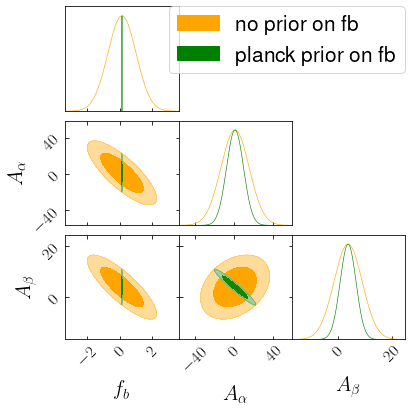

In [104]:
# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_planck = np.load('test_fisher_advact_des_fb_with_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')
inverse_fisher_F_advact = np.load('test_fisher_advact_des_fb_without_prior.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A_{\alpha}$',r'$A_{\beta}$',r'\sigma_\mathrm{log M}', r'\alpha_s',
         r'M_1^\prime', r'M_\mathrm{min}^\mathrm{HOD}', r'\lambda']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method
matrix1 = GaussianND(mean, inverse_fisher_F_planck, labels = labels, names = names)
matrix2 = GaussianND(mean, inverse_fisher_F_advact, labels = labels, names = names)

# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = True
g.settings.legend_fontsize = 24
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_y_rotation = 45
g.settings.alpha_filled_add = 0.9
g.settings.title_limit_fontsize = 1

g.triangle_plot([matrix2,matrix1], 
                names,
            filled = True,
            legend_labels = ['no prior on fb', 'planck prior on fb'], 
            contour_colors = ['orange','green'])

# Save triplot
g.export('advact_des.pdf')

# advACT x LSST shear

In [104]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]

prior_list = [0.001596,#0.001596, # f_b_gas: 0.001596
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [105]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
'ndim_masses' : 50,
'ndim_redshifts' : 50,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.005,
# 'N_samp_fftw' : 250,
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.1,
    
    
'k_min_for_pk_class_sz' : 0.01,
# 'k_max_for_pk_class_sz' : 6.0,
'k_per_decade_class_sz' : 15,
# 'P_k_max_h/Mpc' : 10.0,
    

'N_kSZ2_gal_multipole_grid' :  30,
'N_kSZ2_gal_theta_grid' :  30,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

'n_z_psi_b1g' : 20,
'n_l_psi_b1g' : 20,

'n_z_psi_b2g' : 20,
'n_l_psi_b2g' : 20,

'n_z_psi_b2t' : 20,
'n_l_psi_b2t' : 20,

'n_z_psi_b1t' : 20,
'n_l_psi_b1t' : 20,

'n_z_psi_b1gt' : 20,
'n_l_psi_b1gt' : 20,
})


M.set(
    {
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',

        
'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,

        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 33.7873 seconds


In [106]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_kg()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)
print(covll)

1.5665761069571915
3.133152213914383
[1.08592183e-41 3.06418898e-43 1.24726900e-43 6.86285672e-44
 4.31889264e-44 2.95967569e-44 2.15157298e-44 1.62179273e-44
 1.22343307e-44 8.79590873e-45 5.80052371e-45 3.46571971e-45
 1.91368867e-45 1.00436802e-45 5.05214592e-46]


In [25]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot
cl_lens = cl_lens


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

1.5665761069571915
3.133152213914383


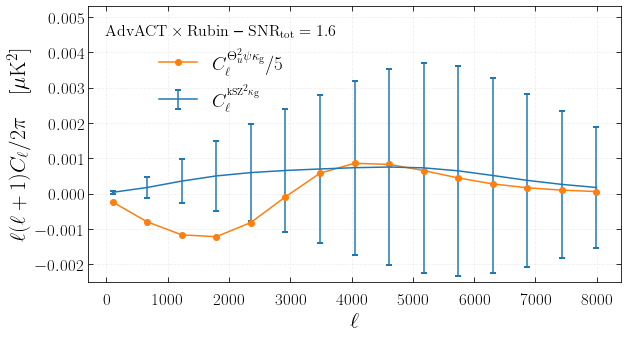

In [112]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_plc*cl_lensing/5.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}/5$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=1,
          loc=2,
          title=r'$\mathrm{AdvACT\times Rubin}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=1.6$')
ax.set_ylim(-0.0025,0.0053)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig('cls_advact_lsst_lensing.pdf')

In [27]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 66.8447 seconds
computed in 72.7952 seconds
computed in 79.2693 seconds


[]

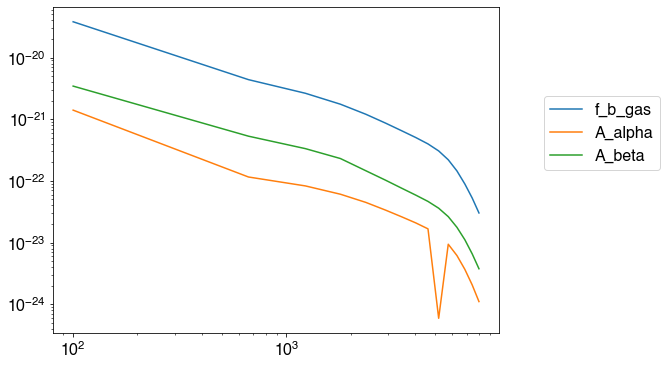

In [28]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.loglog()

In [29]:
dcl_kSZ_kSZ_g_tot

[array([3.79895093e-20, 4.37949627e-21, 2.63217340e-21, 1.75083002e-21,
        1.20447156e-21, 8.62982214e-22, 6.46160120e-22, 5.03442867e-22,
        3.97705574e-22, 3.06088456e-22, 2.20091122e-22, 1.45084207e-22,
        8.89897300e-23, 5.28489658e-23, 3.02371460e-23]),
 array([ 1.40321242e-21,  1.15704918e-22,  8.29385989e-23,  6.08268078e-23,
         4.48658955e-23,  3.35625470e-23,  2.60382176e-23,  2.08073891e-23,
         1.67025605e-23, -5.93323606e-25,  9.40554315e-24,  6.17090008e-24,
         3.67659433e-24,  2.06270958e-24,  1.10645270e-24]),
 array([3.44155001e-21, 5.30906200e-22, 3.33439004e-22, 2.30444334e-22,
        1.46293912e-22, 1.02513073e-22, 7.56876052e-23, 5.86623501e-23,
        4.65159492e-23, 3.60981122e-23, 2.63665214e-23, 1.76899008e-23,
        1.11078102e-23, 6.57828789e-24, 3.76884852e-24])]

[]

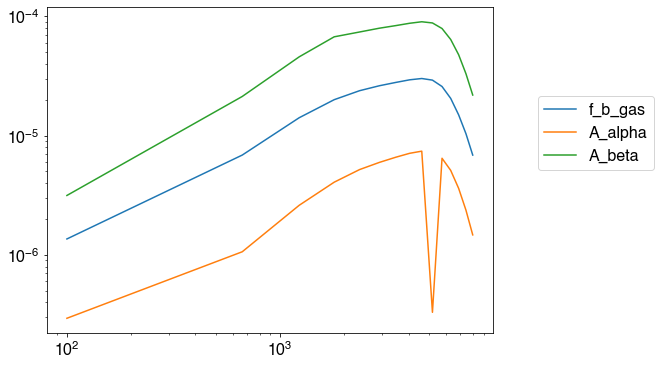

In [30]:
for i in range(len(param_list)):
    plt.plot(ell_array,np.fabs(dl_kSZ_kSZ_g_tot_plus[i]-dl_kSZ_kSZ_g_tot_minus[i]),
             label=param_list[i])

plt.legend(loc=(1.1,0.5))
plt.loglog()

In [36]:
#theory parameters
M_parameters = len(param_list)

# # data covariance matrix
# fac_cov = 1.
# covmat_data = fac_cov*np.diag((np.sqrt(2./(2.*np.asarray(ell_array)+1.))*(np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])))**2.)


# inv_covmat_data = np.linalg.inv(covmat_data)
# det_covmat_data = np.linalg.det(covmat_data)



dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)   

Fisher F
[[3.93021704e+05 1.50057416e+01 4.93040916e+01]
 [1.50057416e+01 5.39753621e-01 1.68466406e+00]
 [4.93040916e+01 1.68466406e+00 5.67563987e+00]]
Inverse Fisher F^-1
[[ 2.54718707e-06 -2.38082046e-05 -1.50604901e-05]
 [-2.38082046e-05  2.51856446e+01 -7.47548778e+00]
 [-1.50604901e-05 -7.47548778e+00  2.39522388e+00]]
[1.59599094e-03 5.01853012e+00 1.54765109e+00]


In [37]:
np.diag(inverse_fisher_F)

array([2.54718707e-06, 2.51856446e+01, 2.39522388e+00])

In [38]:
prior_mat

array([[0.001596, 0.      , 0.      ],
       [0.      ,      inf, 0.      ],
       [0.      , 0.      ,      inf]])

In [39]:
np.save('test_fisher_advact_lsst_fb_with_prior.npy',inverse_fisher_F)

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


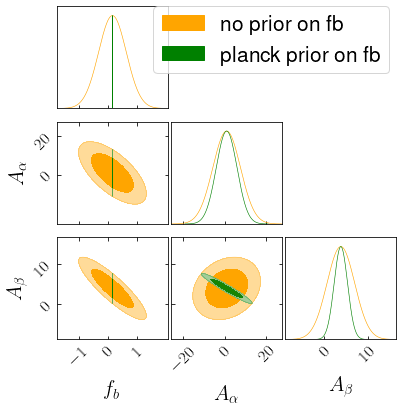

In [40]:
# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_planck = np.load('test_fisher_advact_lsst_fb_with_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')
inverse_fisher_F_advact = np.load('test_fisher_advact_lsst_fb_without_prior.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A_{\alpha}$',r'$A_{\beta}$',r'\sigma_\mathrm{log M}', r'\alpha_s',
         r'M_1^\prime', r'M_\mathrm{min}^\mathrm{HOD}', r'\lambda']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method
matrix1 = GaussianND(mean, inverse_fisher_F_planck, labels = labels, names = names)
matrix2 = GaussianND(mean, inverse_fisher_F_advact, labels = labels, names = names)

# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = True
g.settings.legend_fontsize = 24
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_y_rotation = 45
g.settings.alpha_filled_add = 0.9
g.settings.title_limit_fontsize = 1

g.triangle_plot([matrix2,matrix1], 
                names,
            filled = True,
            legend_labels = ['no prior on fb', 'planck prior on fb'], 
            contour_colors = ['orange','green'])

# Save triplot
g.export('advact_lsst.pdf')

# so x DES shear

In [87]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]

prior_list = [0.001596,#0.001596, # f_b_gas: 0.001596
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [88]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
'ndim_masses' : 50,
'ndim_redshifts' : 50,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.005,
# 'N_samp_fftw' : 250,
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.1,
    
    
'k_min_for_pk_class_sz' : 0.01,
# 'k_max_for_pk_class_sz' : 6.0,
'k_per_decade_class_sz' : 15,
# 'P_k_max_h/Mpc' : 10.0,
    

'N_kSZ2_gal_multipole_grid' :  30,
'N_kSZ2_gal_theta_grid' :  30,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

'n_z_psi_b1g' : 20,
'n_l_psi_b1g' : 20,

'n_z_psi_b2g' : 20,
'n_l_psi_b2g' : 20,

'n_z_psi_b2t' : 20,
'n_l_psi_b2t' : 20,

'n_z_psi_b1t' : 20,
'n_l_psi_b1t' : 20,

'n_z_psi_b1gt' : 20,
'n_l_psi_b1gt' : 20,
})


M.set(
    {
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',

        
'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 8,

        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 44.0844 seconds


In [89]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_kg()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)
print(covll)

2.2090848068656337
4.418169613731267
[7.95487581e-43 5.64695745e-44 2.75871213e-44 1.71100600e-44
 1.17274970e-44 8.52906048e-45 6.46337062e-45 5.05525483e-45
 4.05853297e-45 3.34184384e-45 2.80685321e-45 2.37357498e-45
 1.98656337e-45 1.62547140e-45 1.29524808e-45 1.00566418e-45
 7.62660058e-46 5.63268971e-46]


In [90]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot
cl_lens = cl_lens


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

2.2090848068656337
4.418169613731267


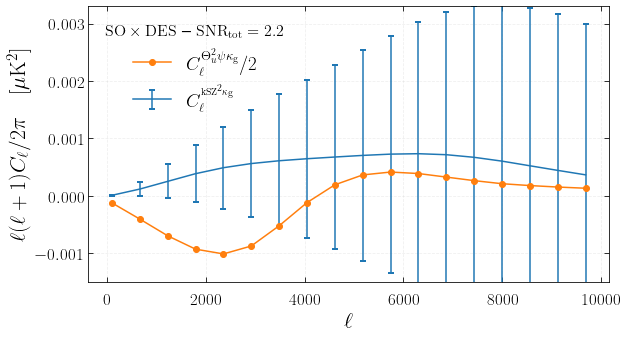

In [97]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_plc*cl_lensing/2.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}/2$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=1,
          loc=2,
          title=r'$\mathrm{SO\times DES}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=2.2$')
ax.set_ylim(-0.0015,0.0033)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig('cls_so_des_lensing.pdf')

In [8]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 73.0280 seconds
computed in 78.6703 seconds
computed in 75.6751 seconds


[]

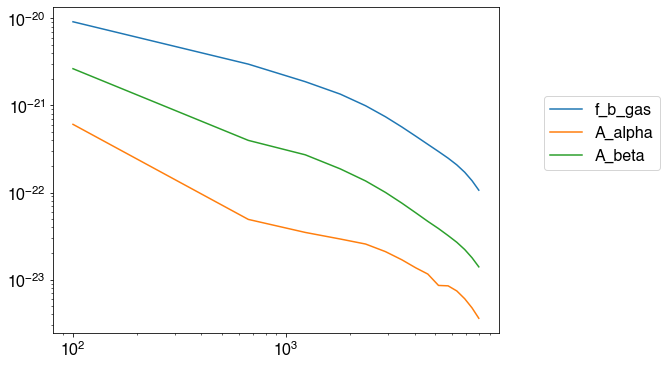

In [9]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.loglog()

In [10]:
dcl_kSZ_kSZ_g_tot

[array([9.15918024e-21, 2.98611124e-21, 1.87663771e-21, 1.35039754e-21,
        9.92546978e-22, 7.41627363e-22, 5.66248316e-22, 4.43788535e-22,
        3.57629697e-22, 2.95742376e-22, 2.48138623e-22, 2.07799325e-22,
        1.70912892e-22, 1.36695154e-22, 1.06352671e-22]),
 array([6.07082809e-22, 4.90721059e-23, 3.47739860e-23, 2.92082121e-23,
        2.55723397e-23, 2.09145620e-23, 1.68605919e-23, 1.36313994e-23,
        1.15553909e-23, 8.55251960e-24, 8.46378324e-24, 7.39700789e-24,
        6.01625887e-24, 4.72397943e-24, 3.58802073e-24]),
 array([2.64577610e-21, 3.97139961e-22, 2.71139249e-22, 1.86818874e-22,
        1.35746401e-22, 1.00192374e-22, 7.55216575e-23, 5.84487154e-23,
        4.65867012e-23, 3.85125007e-23, 3.19882700e-23, 2.68128666e-23,
        2.21163454e-23, 1.78003615e-23, 1.39889584e-23])]

[]

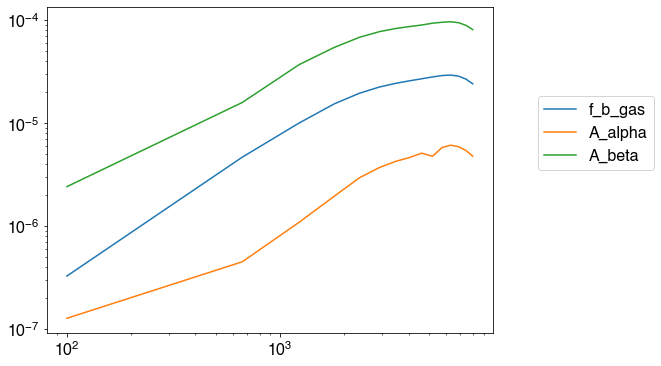

In [11]:
for i in range(len(param_list)):
    plt.plot(ell_array,np.fabs(dl_kSZ_kSZ_g_tot_plus[i]-dl_kSZ_kSZ_g_tot_minus[i]),
             label=param_list[i])

plt.legend(loc=(1.1,0.5))
plt.loglog()

In [17]:
#theory parameters
M_parameters = len(param_list)

# # data covariance matrix
# fac_cov = 1.
# covmat_data = fac_cov*np.diag((np.sqrt(2./(2.*np.asarray(ell_array)+1.))*(np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])))**2.)


# inv_covmat_data = np.linalg.inv(covmat_data)
# det_covmat_data = np.linalg.det(covmat_data)



dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)   

Fisher F
[[3.93236029e+05 1.89695226e+01 1.00378692e+02]
 [1.89695226e+01 6.99506437e-01 3.36745107e+00]
 [1.00378692e+02 3.36745107e+00 1.71316787e+01]]
Inverse Fisher F^-1
[[ 2.54691110e-06  5.15738086e-05 -2.50604677e-05]
 [ 5.15738086e-05  2.66033264e+01 -5.22952704e+00]
 [-2.50604677e-05 -5.22952704e+00  1.08644881e+00]]
[1.59590448e-03 5.15784125e+00 1.04232855e+00]


In [18]:
np.diag(inverse_fisher_F)

array([2.54691110e-06, 2.66033264e+01, 1.08644881e+00])

In [19]:
prior_mat

array([[0.001596, 0.      , 0.      ],
       [0.      ,      inf, 0.      ],
       [0.      , 0.      ,      inf]])

In [20]:
np.save('test_fisher_so_des_fb_with_prior.npy',inverse_fisher_F)

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


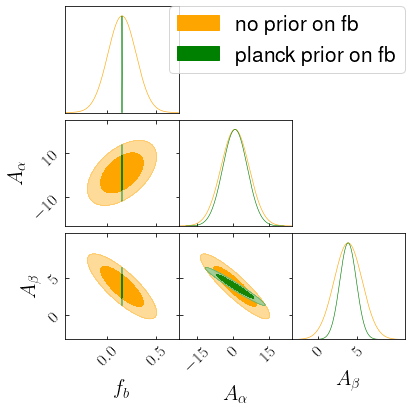

In [21]:
# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_planck = np.load('test_fisher_so_des_fb_with_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')
inverse_fisher_F_advact = np.load('test_fisher_so_des_fb_without_prior.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A_{\alpha}$',r'$A_{\beta}$',r'\sigma_\mathrm{log M}', r'\alpha_s',
         r'M_1^\prime', r'M_\mathrm{min}^\mathrm{HOD}', r'\lambda']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method
matrix1 = GaussianND(mean, inverse_fisher_F_planck, labels = labels, names = names)
matrix2 = GaussianND(mean, inverse_fisher_F_advact, labels = labels, names = names)

# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = True
g.settings.legend_fontsize = 24
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_y_rotation = 45
g.settings.alpha_filled_add = 0.9
g.settings.title_limit_fontsize = 1

g.triangle_plot([matrix2,matrix1], 
                names,
            filled = True,
            legend_labels = ['no prior on fb', 'planck prior on fb'], 
            contour_colors = ['orange','green'])

# Save triplot
g.export('so_des.pdf')

# so x LSST shear

In [98]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]

prior_list = [0.001596,#0.001596, # f_b_gas: 0.001596
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [99]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
'ndim_masses' : 50,
'ndim_redshifts' : 50,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.005,
# 'N_samp_fftw' : 250,
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.1,
    
    
'k_min_for_pk_class_sz' : 0.01,
# 'k_max_for_pk_class_sz' : 6.0,
'k_per_decade_class_sz' : 15,
# 'P_k_max_h/Mpc' : 10.0,
    

'N_kSZ2_gal_multipole_grid' :  30,
'N_kSZ2_gal_theta_grid' :  30,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

'n_z_psi_b1g' : 20,
'n_l_psi_b1g' : 20,

'n_z_psi_b2g' : 20,
'n_l_psi_b2g' : 20,

'n_z_psi_b2t' : 20,
'n_l_psi_b2t' : 20,

'n_z_psi_b1t' : 20,
'n_l_psi_b1t' : 20,

'n_z_psi_b1gt' : 20,
'n_l_psi_b1gt' : 20,
})


M.set(
    {
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',

        
'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,

        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 40.0274 seconds


In [101]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_kg()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)
print(covll)

4.518043445454638
9.036086890909276
[5.12642552e-43 1.49179134e-44 6.46673888e-45 3.80825943e-45
 2.53161555e-45 1.80502285e-45 1.34943584e-45 1.04540114e-45
 8.33503036e-46 6.82802742e-46 5.71273123e-46 4.81650755e-46
 4.02178255e-46 3.28467022e-46 2.61350949e-46 2.02673359e-46
 1.53546935e-46 1.13311061e-46]


In [102]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot
cl_lens = cl_lens


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

4.518043445454638
9.036086890909276


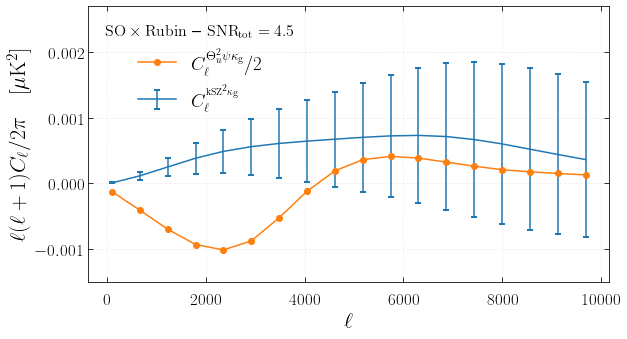

In [103]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_plc*cl_lensing/2.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}/2$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=1,
          loc=2,
          title=r'$\mathrm{SO\times Rubin}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=4.5$')
ax.set_ylim(-0.0015,0.0027)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig('cls_so_Rubin_lensing.pdf')

In [126]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 77.5752 seconds
computed in 77.5384 seconds
computed in 73.0785 seconds


[]

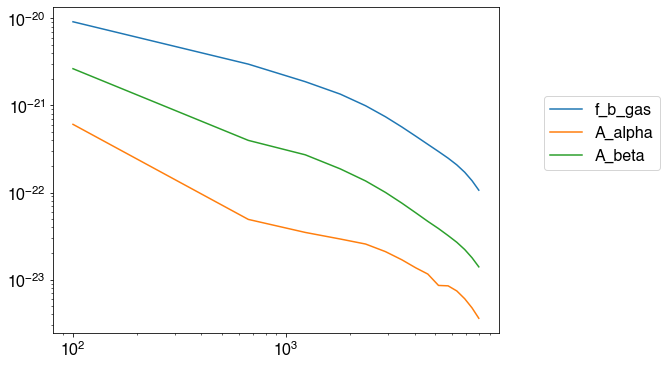

In [127]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.loglog()

In [128]:
dcl_kSZ_kSZ_g_tot

[array([9.15918024e-21, 2.98611124e-21, 1.87663771e-21, 1.35039754e-21,
        9.92546978e-22, 7.41627363e-22, 5.66248316e-22, 4.43788535e-22,
        3.57629697e-22, 2.95742376e-22, 2.48138623e-22, 2.07799325e-22,
        1.70912892e-22, 1.36695154e-22, 1.06352671e-22]),
 array([6.07082809e-22, 4.90721059e-23, 3.47739860e-23, 2.92082121e-23,
        2.55723397e-23, 2.09145620e-23, 1.68605919e-23, 1.36313994e-23,
        1.15553909e-23, 8.55251960e-24, 8.46378324e-24, 7.39700789e-24,
        6.01625887e-24, 4.72397943e-24, 3.58802073e-24]),
 array([2.64577610e-21, 3.97139961e-22, 2.71139249e-22, 1.86818874e-22,
        1.35746401e-22, 1.00192374e-22, 7.55216575e-23, 5.84487154e-23,
        4.65867012e-23, 3.85125007e-23, 3.19882700e-23, 2.68128666e-23,
        2.21163454e-23, 1.78003615e-23, 1.39889584e-23])]

[]

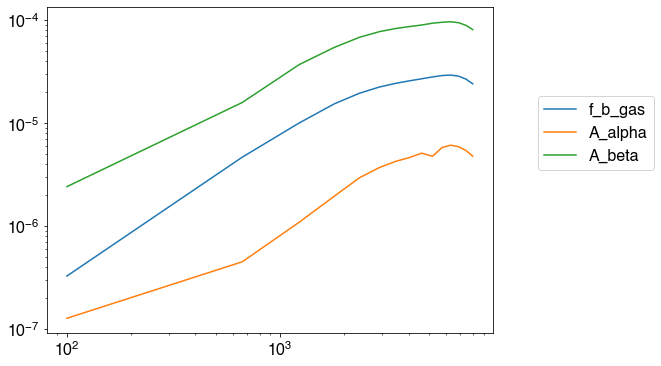

In [129]:
for i in range(len(param_list)):
    plt.plot(ell_array,np.fabs(dl_kSZ_kSZ_g_tot_plus[i]-dl_kSZ_kSZ_g_tot_minus[i]),
             label=param_list[i])

plt.legend(loc=(1.1,0.5))
plt.loglog()

In [136]:
#theory parameters
M_parameters = len(param_list)

# # data covariance matrix
# fac_cov = 1.
# covmat_data = fac_cov*np.diag((np.sqrt(2./(2.*np.asarray(ell_array)+1.))*(np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])))**2.)


# inv_covmat_data = np.linalg.inv(covmat_data)
# det_covmat_data = np.linalg.det(covmat_data)



dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)   

Fisher F
[[3.95252806e+05 7.05834996e+01 3.80412480e+02]
 [7.05834996e+01 2.17044644e+00 1.07708614e+01]
 [3.80412480e+02 1.07708614e+01 5.70635900e+01]]
Inverse Fisher F^-1
[[ 2.54643444e-06  2.26075237e-05 -2.12429317e-05]
 [ 2.26075237e-05  7.27685427e+00 -1.37367083e+00]
 [-2.12429317e-05 -1.37367083e+00  2.76948913e-01]]
[1.59575513e-03 2.69756451e+00 5.26259359e-01]


In [137]:
np.diag(inverse_fisher_F)

array([2.54643444e-06, 7.27685427e+00, 2.76948913e-01])

In [138]:
prior_mat

array([[0.001596, 0.      , 0.      ],
       [0.      ,      inf, 0.      ],
       [0.      , 0.      ,      inf]])

In [139]:
np.save('test_fisher_so_lsst_fb_with_prior.npy',inverse_fisher_F)

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


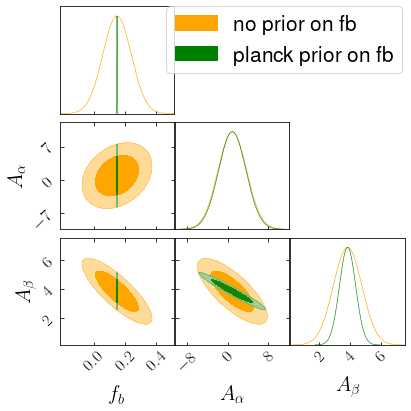

In [140]:
# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_planck = np.load('test_fisher_so_lsst_fb_with_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')
inverse_fisher_F_advact = np.load('test_fisher_so_lsst_fb_without_prior.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A_{\alpha}$',r'$A_{\beta}$',r'\sigma_\mathrm{log M}', r'\alpha_s',
         r'M_1^\prime', r'M_\mathrm{min}^\mathrm{HOD}', r'\lambda']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method
matrix1 = GaussianND(mean, inverse_fisher_F_planck, labels = labels, names = names)
matrix2 = GaussianND(mean, inverse_fisher_F_advact, labels = labels, names = names)

# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = True
g.settings.legend_fontsize = 24
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_y_rotation = 45
g.settings.alpha_filled_add = 0.9
g.settings.title_limit_fontsize = 1

g.triangle_plot([matrix2,matrix1], 
                names,
            filled = True,
            legend_labels = ['no prior on fb', 'planck prior on fb'], 
            contour_colors = ['orange','green'])

# Save triplot
g.export('so_lsst.pdf')

# S4 x DES shear

In [70]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]

prior_list = [0.001596,#0.001596, # f_b_gas: 0.001596
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [71]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
'ndim_masses' : 50,
'ndim_redshifts' : 50,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.005,
# 'N_samp_fftw' : 250,
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.1,
    
    
'k_min_for_pk_class_sz' : 0.01,
# 'k_max_for_pk_class_sz' : 6.0,
'k_per_decade_class_sz' : 15,
# 'P_k_max_h/Mpc' : 10.0,
    

'N_kSZ2_gal_multipole_grid' :  30,
'N_kSZ2_gal_theta_grid' :  30,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

'n_z_psi_b1g' : 20,
'n_l_psi_b1g' : 20,

'n_z_psi_b2g' : 20,
'n_l_psi_b2g' : 20,

'n_z_psi_b2t' : 20,
'n_l_psi_b2t' : 20,

'n_z_psi_b1t' : 20,
'n_l_psi_b1t' : 20,

'n_z_psi_b1gt' : 20,
'n_l_psi_b1gt' : 20,
})


M.set(
    {
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',

        
'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 8,

        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/s4_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_nl.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 44.4185 seconds


In [72]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_kg()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)
print(covll)

3.5285251218821188
7.0570502437642375
[1.74120393e-43 1.23753998e-44 6.11006043e-45 3.84480255e-45
 2.67248765e-45 1.96333170e-45 1.49297675e-45 1.16377201e-45
 9.26362095e-46 7.56952554e-46 6.35590372e-46 5.44503963e-46
 4.69682694e-46 4.02642419e-46 3.40506313e-46 2.83303683e-46
 2.31177874e-46 1.84646445e-46]


In [73]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot
cl_lens = cl_lens


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

3.5285251218821188
7.0570502437642375


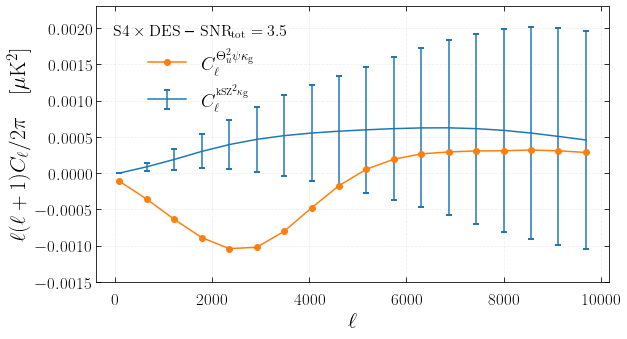

In [78]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_plc*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=1,
          loc=2,
          title=r'$\mathrm{S4\times DES}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=3.5$')
ax.set_ylim(-0.0015,0.0023)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig('cls_s4_DES_lensing.pdf')

In [309]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 98.2156 seconds
computed in 99.0472 seconds
computed in 99.9048 seconds


[]

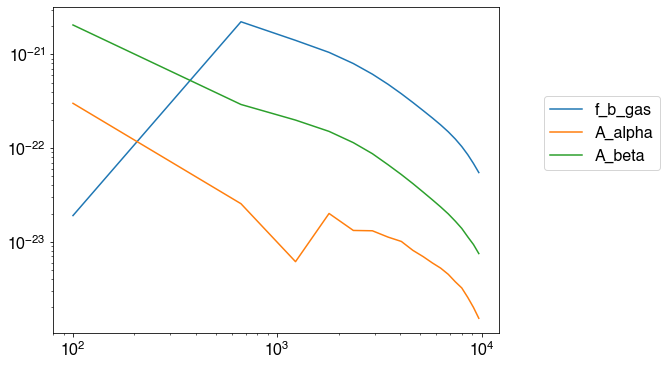

In [310]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.loglog()

In [311]:
dcl_kSZ_kSZ_g_tot

[array([1.90749614e-23, 2.22664718e-21, 1.41016229e-21, 1.04957256e-21,
        7.98266001e-22, 6.14976311e-22, 4.79691989e-22, 3.79974175e-22,
        3.06264471e-22, 2.51287416e-22, 2.09794536e-22, 1.76783145e-22,
        1.49226385e-22, 1.25151878e-22, 1.03921801e-22, 8.49916859e-23,
        6.85300802e-23, 5.48606300e-23]),
 array([3.00465048e-22, 2.55283549e-23, 6.14913793e-24, 2.00825757e-23,
        1.32341732e-23, 1.31306386e-23, 1.12429163e-23, 1.01030824e-23,
        8.10893067e-24, 6.95947877e-24, 5.96036950e-24, 5.24456042e-24,
        4.50525269e-24, 3.75428446e-24, 3.22411511e-24, 2.55102155e-24,
        1.99812398e-24, 1.53102281e-24]),
 array([2.05767897e-21, 2.92095456e-22, 1.99061529e-22, 1.50776600e-22,
        1.14327201e-22, 8.72289580e-23, 6.64717343e-23, 5.22247217e-23,
        4.17718645e-23, 3.39462943e-23, 2.81131094e-23, 2.35800343e-23,
        1.98767822e-23, 1.66333361e-23, 1.39130305e-23, 1.12912110e-23,
        9.36749045e-24, 7.50173240e-24])]

[]

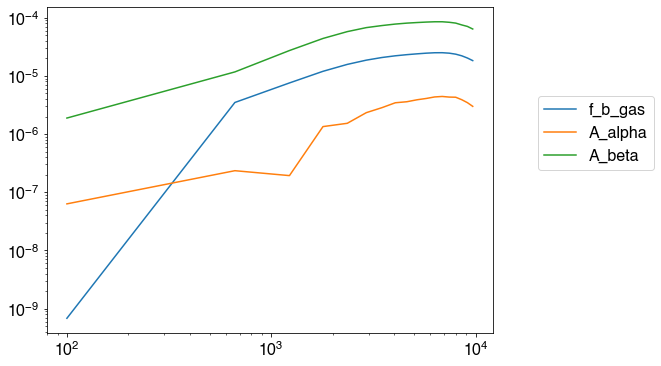

In [312]:
for i in range(len(param_list)):
    plt.plot(ell_array,np.fabs(dl_kSZ_kSZ_g_tot_plus[i]-dl_kSZ_kSZ_g_tot_minus[i]),
             label=param_list[i])

plt.legend(loc=(1.1,0.5))
plt.loglog()

In [318]:
#theory parameters
M_parameters = len(param_list)

# # data covariance matrix
# fac_cov = 1.
# covmat_data = fac_cov*np.diag((np.sqrt(2./(2.*np.asarray(ell_array)+1.))*(np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])))**2.)


# inv_covmat_data = np.linalg.inv(covmat_data)
# det_covmat_data = np.linalg.det(covmat_data)



dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)   

Fisher F
[[3.94798797e+05 4.05607058e+01 3.05902754e+02]
 [4.05607058e+01 1.41102062e+00 9.13551161e+00]
 [3.05902754e+02 9.13551161e+00 6.65803561e+01]]
Inverse Fisher F^-1
[[ 2.54206696e-06  2.27898421e-05 -1.48065016e-05]
 [ 2.27898421e-05  6.34803217e+00 -8.71120199e-01]
 [-1.48065016e-05 -8.71120199e-01  1.34614150e-01]]
[1.59438608e-03 2.51953015e+00 3.66898010e-01]


In [319]:
np.diag(inverse_fisher_F)

array([2.54206696e-06, 6.34803217e+00, 1.34614150e-01])

In [320]:
prior_mat

array([[0.001596, 0.      , 0.      ],
       [0.      ,      inf, 0.      ],
       [0.      , 0.      ,      inf]])

In [321]:
np.save('test_fisher_s4_des_fb_prior.npy',inverse_fisher_F)

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


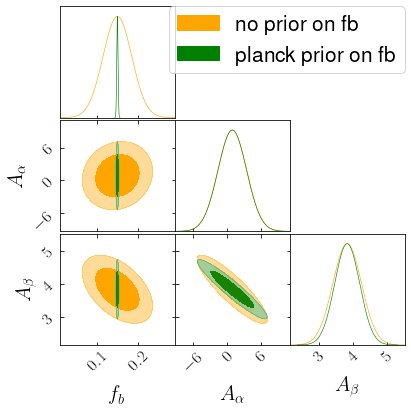

In [322]:
# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_planck = np.load('test_fisher_s4_des_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')
inverse_fisher_F_advact = np.load('test_fisher_s4_des.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A_{\alpha}$',r'$A_{\beta}$',r'\sigma_\mathrm{log M}', r'\alpha_s',
         r'M_1^\prime', r'M_\mathrm{min}^\mathrm{HOD}', r'\lambda']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method
matrix1 = GaussianND(mean, inverse_fisher_F_planck, labels = labels, names = names)
matrix2 = GaussianND(mean, inverse_fisher_F_advact, labels = labels, names = names)

# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = True
g.settings.legend_fontsize = 24
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_y_rotation = 45
g.settings.alpha_filled_add = 0.9
g.settings.title_limit_fontsize = 1

g.triangle_plot([matrix2,matrix1], 
                names,
            filled = True,
            legend_labels = ['no prior on fb', 'planck prior on fb'], 
            contour_colors = ['orange','green'])

# Save triplot
g.export('s4_des.pdf')

# S4 x LSST shear

In [53]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]

prior_list = [0.001596,#0.001596, # f_b_gas: 0.001596
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [54]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
'ndim_masses' : 50,
'ndim_redshifts' : 50,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.005,
# 'N_samp_fftw' : 250,
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.1,
    
    
'k_min_for_pk_class_sz' : 0.01,
# 'k_max_for_pk_class_sz' : 6.0,
'k_per_decade_class_sz' : 15,
# 'P_k_max_h/Mpc' : 10.0,
    

'N_kSZ2_gal_multipole_grid' :  30,
'N_kSZ2_gal_theta_grid' :  30,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

'n_z_psi_b1g' : 20,
'n_l_psi_b1g' : 20,

'n_z_psi_b2g' : 20,
'n_l_psi_b2g' : 20,

'n_z_psi_b2t' : 20,
'n_l_psi_b2t' : 20,

'n_z_psi_b1t' : 20,
'n_l_psi_b1t' : 20,

'n_z_psi_b1gt' : 20,
'n_l_psi_b1gt' : 20,
})


M.set(
    {
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',

        
'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,

        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/s4_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_nl.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 44.9377 seconds


In [55]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_kg()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)
print(covll)

7.485813412646713
14.971626825293425
[1.12209015e-43 3.26932665e-45 1.43227791e-45 8.55757935e-46
 5.76911799e-46 4.15504828e-46 3.11707205e-46 2.40662410e-46
 1.90247606e-46 1.54659996e-46 1.29360467e-46 1.10491906e-46
 9.50869289e-47 8.13639542e-47 6.87062675e-47 5.70947208e-47
 4.65432228e-47 3.71447516e-47]


In [56]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot
cl_lens = cl_lens


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

7.485813412646713
14.971626825293425


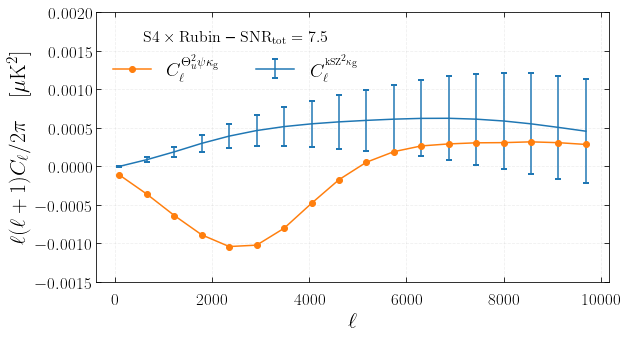

In [69]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}$')
ax.plot(l,
        fac_plc*cl_lensing/1.,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{g}}$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          ncol=2,
          loc=2,
          title=r'$\mathrm{S4\times Rubin}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=7.5$')
ax.set_ylim(-0.0015,0.0020)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig('cls_s4_lsst_lensing.pdf')

In [60]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kg()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 87.4336 seconds
computed in 88.5255 seconds
computed in 94.4918 seconds


[]

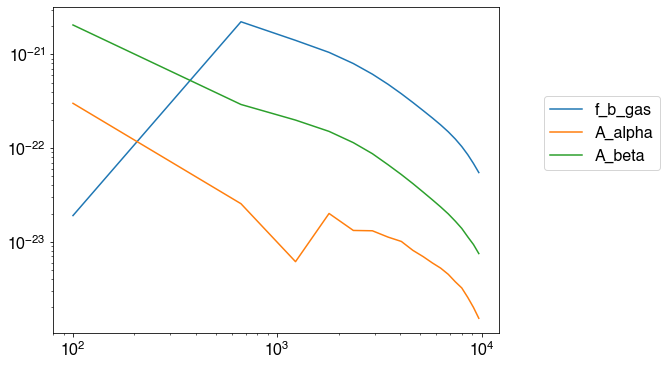

In [61]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.loglog()

In [62]:
dcl_kSZ_kSZ_g_tot

[array([1.90749614e-23, 2.22664718e-21, 1.41016229e-21, 1.04957256e-21,
        7.98266001e-22, 6.14976311e-22, 4.79691989e-22, 3.79974175e-22,
        3.06264471e-22, 2.51287416e-22, 2.09794536e-22, 1.76783145e-22,
        1.49226385e-22, 1.25151878e-22, 1.03921801e-22, 8.49916859e-23,
        6.85300802e-23, 5.48606300e-23]),
 array([3.00465048e-22, 2.55283549e-23, 6.14913793e-24, 2.00825757e-23,
        1.32341732e-23, 1.31306386e-23, 1.12429163e-23, 1.01030824e-23,
        8.10893067e-24, 6.95947877e-24, 5.96036950e-24, 5.24456042e-24,
        4.50525269e-24, 3.75428446e-24, 3.22411511e-24, 2.55102155e-24,
        1.99812398e-24, 1.53102281e-24]),
 array([2.05767897e-21, 2.92095456e-22, 1.99061529e-22, 1.50776600e-22,
        1.14327201e-22, 8.72289580e-23, 6.64717343e-23, 5.22247217e-23,
        4.17718645e-23, 3.39462943e-23, 2.81131094e-23, 2.35800343e-23,
        1.98767822e-23, 1.66333361e-23, 1.39130305e-23, 1.12912110e-23,
        9.36749045e-24, 7.50173240e-24])]

[]

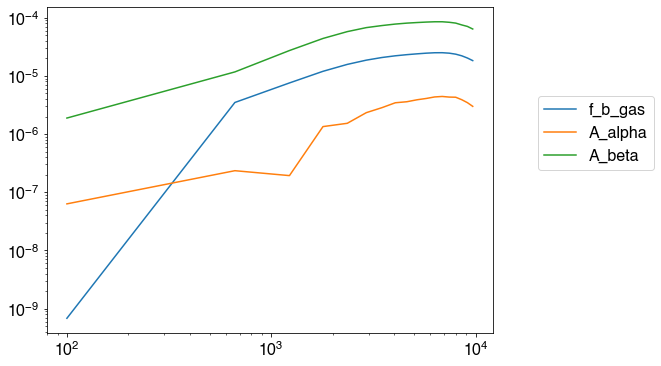

In [63]:
for i in range(len(param_list)):
    plt.plot(ell_array,np.fabs(dl_kSZ_kSZ_g_tot_plus[i]-dl_kSZ_kSZ_g_tot_minus[i]),
             label=param_list[i])

plt.legend(loc=(1.1,0.5))
plt.loglog()

In [69]:
#theory parameters
M_parameters = len(param_list)

# # data covariance matrix
# fac_cov = 1.
# covmat_data = fac_cov*np.diag((np.sqrt(2./(2.*np.asarray(ell_array)+1.))*(np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])))**2.)


# inv_covmat_data = np.linalg.inv(covmat_data)
# det_covmat_data = np.linalg.det(covmat_data)



dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)   

Fisher F
[[4.02547287e+05 1.88264003e+02 1.37747373e+03]
 [1.88264003e+02 5.03298622e+00 3.14534220e+01]
 [1.37747373e+03 3.14534220e+01 2.28309457e+02]]
Inverse Fisher F^-1
[[ 2.53656942e-06  5.45878718e-06 -1.60560817e-05]
 [ 5.45878718e-06  1.42908416e+00 -1.96913028e-01]
 [-1.60560817e-05 -1.96913028e-01  3.16049344e-02]]
[0.00159266 1.19544308 0.17777777]


In [70]:
np.diag(inverse_fisher_F)

array([2.53656942e-06, 1.42908416e+00, 3.16049344e-02])

In [71]:
prior_mat

array([[0.001596, 0.      , 0.      ],
       [0.      ,      inf, 0.      ],
       [0.      , 0.      ,      inf]])

In [72]:
np.save('test_fisher_s4_lsst_fb_with_prior.npy',inverse_fisher_F)

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


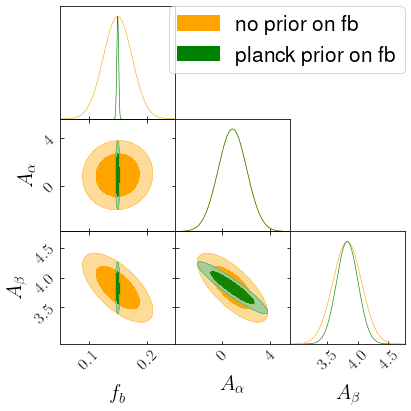

In [74]:
# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_planck = np.load('test_fisher_s4_lsst_fb_with_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')
inverse_fisher_F_advact = np.load('test_fisher_s4_lsst_fb_without_prior.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A_{\alpha}$',r'$A_{\beta}$',r'\sigma_\mathrm{log M}', r'\alpha_s',
         r'M_1^\prime', r'M_\mathrm{min}^\mathrm{HOD}', r'\lambda']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method
matrix1 = GaussianND(mean, inverse_fisher_F_planck, labels = labels, names = names)
matrix2 = GaussianND(mean, inverse_fisher_F_advact, labels = labels, names = names)

# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = True
g.settings.legend_fontsize = 24
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_y_rotation = 45
g.settings.alpha_filled_add = 0.9
g.settings.title_limit_fontsize = 1

g.triangle_plot([matrix2,matrix1], 
                names,
            filled = True,
            legend_labels = ['no prior on fb', 'planck prior on fb'], 
            contour_colors = ['orange','green'])

# Save triplot
g.export('s4_lsst.pdf')

# S4 x S4 lensing

In [36]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]

prior_list = [0.001596,#0.001596, # f_b_gas: 0.001596
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [37]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
'ndim_masses' : 50,
'ndim_redshifts' : 50,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.005,
# 'N_samp_fftw' : 250,
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.1,
    
    
'k_min_for_pk_class_sz' : 0.01,
# 'k_max_for_pk_class_sz' : 6.0,
'k_per_decade_class_sz' : 15,
# 'P_k_max_h/Mpc' : 10.0,
    

'N_kSZ2_gal_multipole_grid' :  30,
'N_kSZ2_gal_theta_grid' :  30,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

'n_z_psi_b1g' : 20,
'n_l_psi_b1g' : 20,

'n_z_psi_b2g' : 20,
'n_l_psi_b2g' : 20,

'n_z_psi_b2t' : 20,
'n_l_psi_b2t' : 20,

'n_z_psi_b1t' : 20,
'n_l_psi_b1t' : 20,

'n_z_psi_b1gt' : 20,
'n_l_psi_b1gt' : 20,
})


M.set(
    {
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',

        
# 'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
# 'shape_noise_siggamma2': 0.3,
# 'ns_gal_per_arcmin2': 8,

        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/s4_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_nl.txt',
'cmb_lensing_noise_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_lensing_noise.dat',
        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 21.9261 seconds


In [39]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_kcmb()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 5000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)
print(covll)

12.812872303182987
25.625744606365974
[3.23355629e-42 1.02189605e-43 5.74300500e-44 4.99861081e-44
 5.10019133e-44 5.59579544e-44 5.92015596e-44 8.00432353e-44
 1.07521934e-43]


In [40]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot
cl_lens = cl_lens


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

12.812872303182987
25.625744606365974


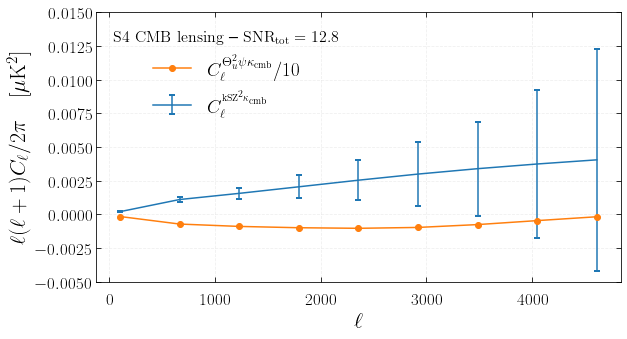

In [47]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}$')
ax.plot(l,
        fac_plc*cl_lensing/10,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{cmb}}/10$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          loc=2,
          title=r'$\mathrm{S4}\,\,\mathrm{CMB}\,\,\mathrm{lensing}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=12.8$')
ax.set_ylim(-0.005,0.015)
# ax.set_xlim(400,5e3)
fig.tight_layout()
# plt.savefig('cls_s4_lensing.pdf')



In [9]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kcmb()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 48.1806 seconds
computed in 54.3203 seconds
computed in 65.9137 seconds


[]

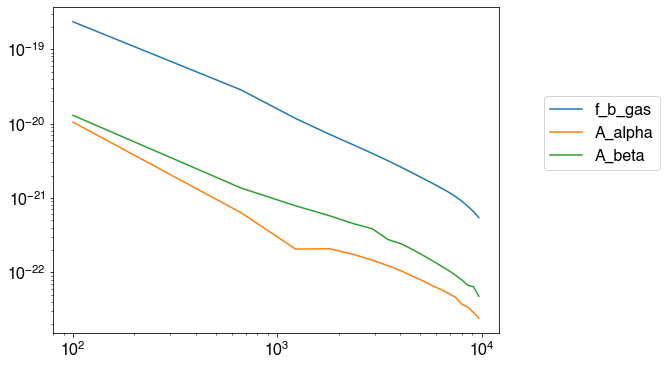

In [10]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.loglog()

In [11]:
dcl_kSZ_kSZ_g_tot

[array([2.33059816e-19, 2.83355718e-20, 1.17078230e-20, 7.20962798e-21,
        5.16581562e-21, 3.96417839e-21, 3.15659634e-21, 2.57751808e-21,
        2.14894950e-21, 1.82501446e-21, 1.57335750e-21, 1.37192630e-21,
        1.20074664e-21, 1.04787485e-21, 9.06175208e-22, 7.74191953e-22,
        6.53922343e-22, 5.44899789e-22]),
 array([1.04335146e-20, 6.34422994e-22, 2.05527918e-22, 2.07463641e-22,
        1.74491209e-22, 1.45582285e-22, 1.22717681e-22, 1.04151119e-22,
        8.80343743e-23, 7.66725554e-23, 6.59506756e-23, 5.91106539e-23,
        5.22531079e-23, 4.63510289e-23, 3.74241383e-23, 3.41409637e-23,
        2.88932122e-23, 2.41229790e-23]),
 array([1.28862333e-20, 1.36011995e-21, 7.83250292e-22, 5.78845229e-22,
        4.51768275e-22, 3.84254679e-22, 2.75399316e-22, 2.41352297e-22,
        2.01308563e-22, 1.68789828e-22, 1.43198769e-22, 1.22801710e-22,
        1.06401949e-22, 9.20733658e-23, 7.90818420e-23, 6.70221443e-23,
        6.39553817e-23, 4.77522799e-23])]

[]

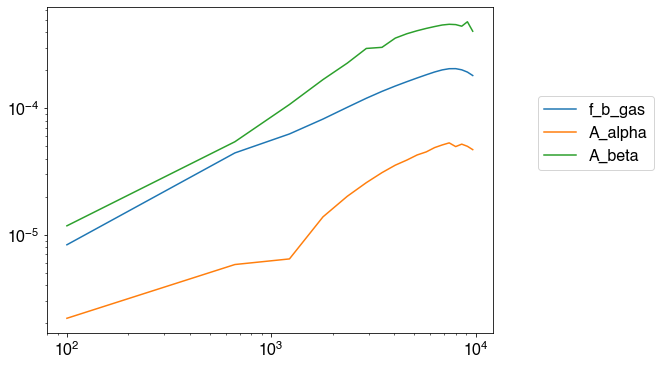

In [12]:
for i in range(len(param_list)):
    plt.plot(ell_array,np.fabs(dl_kSZ_kSZ_g_tot_plus[i]-dl_kSZ_kSZ_g_tot_minus[i]),
             label=param_list[i])

plt.legend(loc=(1.1,0.5))
plt.loglog()

In [21]:
#theory parameters
M_parameters = len(param_list)

# # data covariance matrix
# fac_cov = 1.
# covmat_data = fac_cov*np.diag((np.sqrt(2./(2.*np.asarray(ell_array)+1.))*(np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])))**2.)


# inv_covmat_data = np.linalg.inv(covmat_data)
# det_covmat_data = np.linalg.det(covmat_data)



dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)   

Fisher F
[[4.21856039e+05 1.04325416e+03 1.65674622e+03]
 [1.04325416e+03 4.08036066e+01 5.91739718e+01]
 [1.65674622e+03 5.91739718e+01 9.66103811e+01]]
Inverse Fisher F^-1
[[ 2.54280271e-06 -1.58916319e-05 -3.38722171e-05]
 [-1.58916319e-05  2.19422600e-01 -1.34124079e-01]
 [-3.38722171e-05 -1.34124079e-01  9.30828759e-02]]
[0.00159462 0.46842566 0.30509486]


In [14]:
np.diag(inverse_fisher_F)

array([0.00146763, 0.27664614, 0.35305393])

In [20]:
prior_mat

array([[0.001596, 0.      , 0.      ],
       [0.      ,      inf, 0.      ],
       [0.      , 0.      ,      inf]])

In [22]:
np.save('test_fisher_s4_s4lensing_with_prior_on_fb.npy',inverse_fisher_F)

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


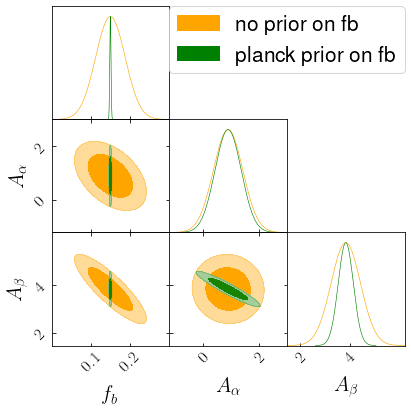

In [23]:
# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_planck = np.load('test_fisher_s4_s4lensing_with_prior_on_fb.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')
inverse_fisher_F_advact = np.load('test_fisher_s4_s4lensing.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A_{\alpha}$',r'$A_{\beta}$',r'\sigma_\mathrm{log M}', r'\alpha_s',
         r'M_1^\prime', r'M_\mathrm{min}^\mathrm{HOD}', r'\lambda']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method
matrix1 = GaussianND(mean, inverse_fisher_F_planck, labels = labels, names = names)
matrix2 = GaussianND(mean, inverse_fisher_F_advact, labels = labels, names = names)

# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = True
g.settings.legend_fontsize = 24
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_y_rotation = 45
g.settings.alpha_filled_add = 0.9
g.settings.title_limit_fontsize = 1

g.triangle_plot([matrix2,matrix1], 
                names,
            filled = True,
            legend_labels = ['no prior on fb', 'planck prior on fb'], 
            contour_colors = ['orange','green'])

# Save triplot
g.export('s4_s4lensing.pdf')

# SO x SO lensing

In [3]:


delta_p_over_p = 1e-2
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
             ]

prior_list = [0.001596,#0.001596, # f_b_gas: 0.001596
              np.inf, # A_alpha
              np.inf, # A_beta
]
prior_list = np.asarray(prior_list)
prior_mat = np.diag(prior_list)
prior_mat

param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                        ]

fac = 1.

In [48]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
'ndim_masses' : 50,
'ndim_redshifts' : 50,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.005,
# 'N_samp_fftw' : 250,
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.1,
    
    
'k_min_for_pk_class_sz' : 0.01,
# 'k_max_for_pk_class_sz' : 6.0,
'k_per_decade_class_sz' : 15,
# 'P_k_max_h/Mpc' : 10.0,
    

'N_kSZ2_gal_multipole_grid' :  30,
'N_kSZ2_gal_theta_grid' :  30,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

'n_z_psi_b1g' : 20,
'n_l_psi_b1g' : 20,

'n_z_psi_b2g' : 20,
'n_l_psi_b2g' : 20,

'n_z_psi_b2t' : 20,
'n_l_psi_b2t' : 20,

'n_z_psi_b1t' : 20,
'n_l_psi_b1t' : 20,

'n_z_psi_b1gt' : 20,
'n_l_psi_b1gt' : 20,
})


M.set(
    {
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',

        
# 'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
# 'shape_noise_siggamma2': 0.3,
# 'ns_gal_per_arcmin2': 8,

        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',
'cmb_lensing_noise_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_lensing_noise.dat',
        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 28.2289 seconds


In [49]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_kcmb()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])


cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
# cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)
print(covll)

6.060849619391227
12.121699238782455
[1.64417276e-41 1.19254715e-42 7.59577292e-43 6.45890806e-43
 7.23916973e-43 8.45155991e-43 7.83251930e-43 1.30779842e-42
 2.41781069e-42]


In [50]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot =  np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


cl_ksz_tot = cl_ksz_tot
cl_lens = cl_lens


snrl = cl_ksz_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

6.060849619391227
12.121699238782455


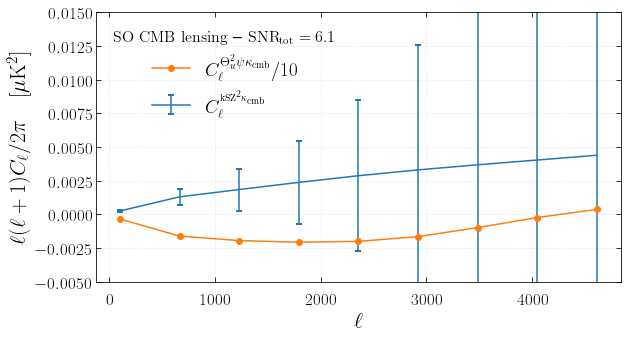

In [52]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)
ax=ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')



ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll),
            markersize=8,
            markeredgewidth=2,
            capsize=3,
            label=r'$C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}$')
ax.plot(l,
        fac_plc*cl_lensing/10,
        marker='o',
        label=r'$C_\ell^{\Theta_u^2\psi \kappa_\mathrm{cmb}}/10$')


ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(frameon=False,
          fontsize=19,
          loc=2,
          title=r'$\mathrm{SO}\,\,\mathrm{CMB}\,\,\mathrm{lensing}$\,\,--\,\,$\mathrm{SNR}_\mathrm{tot}=6.1$')
ax.set_ylim(-0.005,0.015)
# ax.set_xlim(400,5e3)
fig.tight_layout()
plt.savefig('cls_so_lensing.pdf')


In [30]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []



cl_kSZ_kSZ_g_fiducial = M.cl_kSZ_kSZ_kcmb()
ell_array = cl_kSZ_kSZ_g_fiducial['ell']
fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

for i in range(len(param_list)):
    ti = time.perf_counter()
    for ip in range(len(param_list)):
        M.set({param_list[ip]:param_fiducial_values[ip]})
    M.set({param_list[i]:param_fiducial_values[i]+param_fiducial_values[i]*delta_p_over_p,
           'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()
    
    cl_kSZ_kSZ_g_tot_plus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    M.set({param_list[i]:param_fiducial_values[i]-param_fiducial_values[i]*delta_p_over_p,
          'output':'kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_lensing_term'})
    M.compute()
    cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()
    
    cl_kSZ_kSZ_g_tot_minus = fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")
M.struct_cleanup()
M.empty()

computed in 59.8583 seconds
computed in 63.8597 seconds
computed in 64.1283 seconds


[]

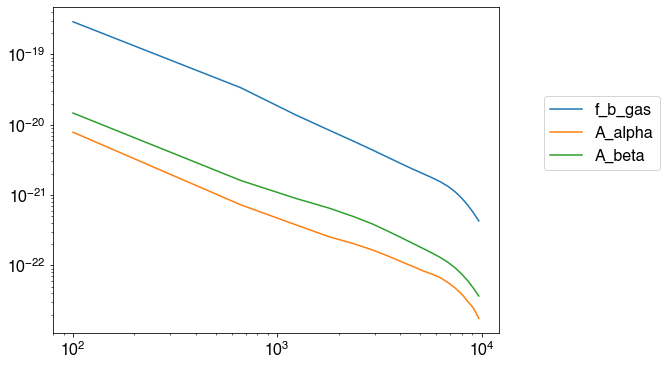

In [31]:
# some sanity check:
plt.rcParams['text.usetex'] = False
for i in range(len(param_list)):
    plt.plot(ell_array,np.abs(dcl_kSZ_kSZ_g_tot[i]),label=param_list[i])
plt.legend(loc=(1.1,0.5))
plt.loglog()

In [32]:
dcl_kSZ_kSZ_g_tot

[array([2.90640766e-19, 3.34469470e-20, 1.38220488e-20, 8.35926315e-21,
        5.84121295e-21, 4.37560217e-21, 3.42396216e-21, 2.77997556e-21,
        2.32887886e-21, 2.00699993e-21, 1.75461664e-21, 1.53446391e-21,
        1.32023290e-21, 1.10646267e-21, 9.02048677e-22, 7.16556424e-22,
        5.59109436e-22, 4.28324669e-22]),
 array([7.82084872e-21, 7.23905664e-22, 3.78955236e-22, 2.55179271e-22,
        2.04137818e-22, 1.65928474e-22, 1.35618190e-22, 1.12714677e-22,
        9.63677438e-23, 8.33765564e-23, 7.47457808e-23, 6.65089877e-23,
        5.64594498e-23, 4.75156245e-23, 3.89339352e-23, 3.07270474e-23,
        2.46413133e-23, 1.76928414e-23]),
 array([1.46451840e-20, 1.60696462e-21, 8.97869716e-22, 6.51758160e-22,
        4.95426563e-22, 3.87910348e-22, 3.05474224e-22, 2.47460386e-22,
        2.04703125e-22, 1.73490040e-22, 1.48963606e-22, 1.28633916e-22,
        1.09630635e-22, 9.17348381e-23, 7.50274393e-23, 6.03117541e-23,
        4.71966448e-23, 3.66800489e-23])]

[]

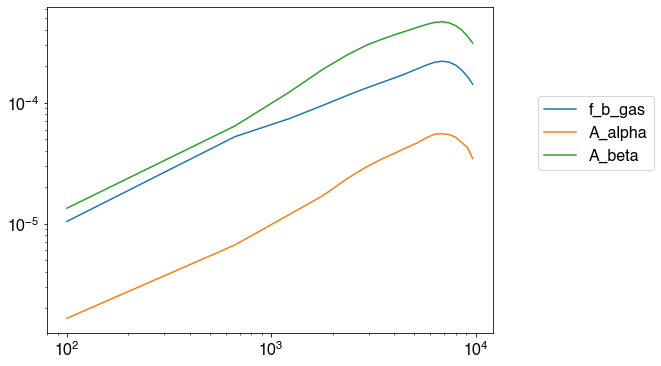

In [33]:
for i in range(len(param_list)):
    plt.plot(ell_array,np.fabs(dl_kSZ_kSZ_g_tot_plus[i]-dl_kSZ_kSZ_g_tot_minus[i]),
             label=param_list[i])

plt.legend(loc=(1.1,0.5))
plt.loglog()

In [39]:
#theory parameters
M_parameters = len(param_list)

# # data covariance matrix
# fac_cov = 1.
# covmat_data = fac_cov*np.diag((np.sqrt(2./(2.*np.asarray(ell_array)+1.))*(np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])))**2.)


# inv_covmat_data = np.linalg.inv(covmat_data)
# det_covmat_data = np.linalg.det(covmat_data)



dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m])/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab)) #+ (1./prior_mat[a][b])**2.
        if a==b:
            fisher_F[a][b] += 1./(prior_mat[a][b])**2.
            
print("Fisher F")
print(fisher_F)

inverse_fisher_F = np.linalg.inv(fisher_F)

print("Inverse Fisher F^-1")
print(inverse_fisher_F)

fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas)   

Fisher F
[[3.99116715e+05 1.72304944e+02 3.37036638e+02]
 [1.72304944e+02 4.58183543e+00 8.95584262e+00]
 [3.37036638e+02 8.95584262e+00 1.76505688e+01]]
Inverse Fisher F^-1
[[ 2.54688436e-06 -8.74639958e-05 -4.25366245e-06]
 [-8.74639958e-05  2.65498287e+01 -1.34696288e+01]
 [-4.25366245e-06 -1.34696288e+01  6.89118354e+00]]
[1.59589610e-03 5.15265259e+00 2.62510639e+00]


In [40]:
np.diag(inverse_fisher_F)

array([2.54688436e-06, 2.65498287e+01, 6.89118354e+00])

In [41]:
prior_mat

array([[0.001596, 0.      , 0.      ],
       [0.      ,      inf, 0.      ],
       [0.      , 0.      ,      inf]])

In [42]:
np.save('test_fisher_so_solensing_with_prior_on_fb.npy',inverse_fisher_F)

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


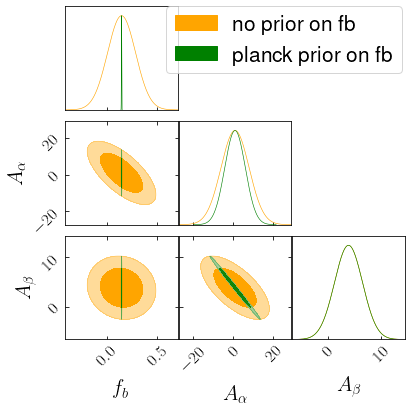

In [45]:
# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_planck = np.load('test_fisher_so_solensing_with_prior_on_fb.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')
inverse_fisher_F_advact = np.load('test_fisher_so_solensing_without_prior_on_fb.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A_{\alpha}$',r'$A_{\beta}$',r'\sigma_\mathrm{log M}', r'\alpha_s',
         r'M_1^\prime', r'M_\mathrm{min}^\mathrm{HOD}', r'\lambda']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method
matrix1 = GaussianND(mean, inverse_fisher_F_planck, labels = labels, names = names)
matrix2 = GaussianND(mean, inverse_fisher_F_advact, labels = labels, names = names)

# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = True
g.settings.legend_fontsize = 24
g.settings.axes_labelsize = 24
g.settings.axes_fontsize = 20
g.settings.axis_tick_x_rotation = 45
g.settings.axis_tick_y_rotation = 45
g.settings.alpha_filled_add = 0.9
g.settings.title_limit_fontsize = 1

g.triangle_plot([matrix2,matrix1], 
                names,
            filled = True,
            legend_labels = ['no prior on fb', 'planck prior on fb'], 
            contour_colors = ['orange','green'])

# Save triplot
g.export('so_solensing.pdf')

# remnant stuff

In [88]:
# let's plot the contours
# np.save('planck_unwise_ttg_fb_Aalpha_Abeta_160122.npy',inverse_fisher_F)

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


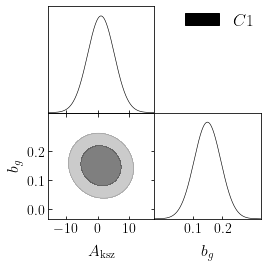

In [89]:
import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
labels = [r'A_\mathrm{ksz}', r'b_g']

# Current method
matrix1 = GaussianND(mean, inverse_fisher_F, labels = labels, names = names)
# matrix2 = GaussianND(mean, inverse_fisher_F_advact, labels = labels, names = names)

# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 20
g.settings.axes_labelsize = 19
g.settings.axes_fontsize = 17
# g.settings.axis_tick_x_rotation = 45
# g.settings.axis_tick_y_rotation = 45
# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.triangle_plot([matrix1], 
                names,
            filled = True,
            #share_x = True,
            legend_labels = [r'$C1$'], 
            contour_colors = ['k','purple'],
            contour_args = [{'alpha':0.5}])

# Save triplot

Planck kSZ2-g

In [3]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

'dlogell' : 0.,
'dell': 200.,
'ell_max' : 2800.0,
'ell_min' : 400.0,
'f_sky':0.6, 
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 141.7266 seconds


In [7]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)

1.0362823248392565


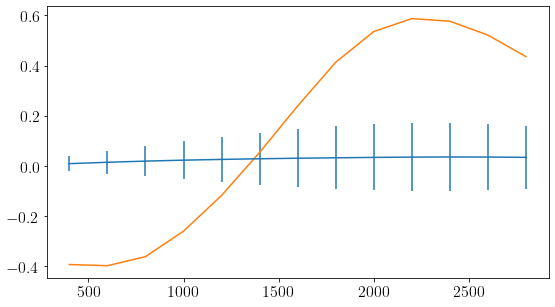

In [11]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [54]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot = np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


In [55]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-7
param_list = ['A_ksz','A_lens']
param_fiducial_values = [1.,1.]
comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
    cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [57]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.97899605 0.0513717 ]


In [85]:
1/0.97899605

1.0214545809454492

advACT kSZ2-g

In [94]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',
'dlogell' : 0.,
'dell': 200.,
'ell_max' : 7800.0,
'ell_min' : 400.0,
'f_sky':0.3, 
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 95.4821 seconds


In [95]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)

22.37082133203438


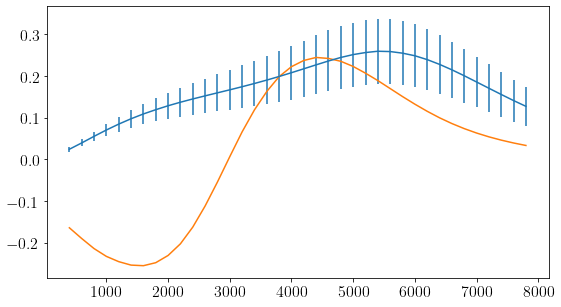

In [96]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [97]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot = np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


In [98]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-7
param_list = ['A_ksz','A_lens']
param_fiducial_values = [1.,1.]
comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
    cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [99]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.05017583 0.02136475]


In [100]:
1./fisher_sigmas

array([19.92991565, 46.80606379])

In [76]:
1./0.04345354

23.013084779744066

SO kSZ2-g

In [86]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',
'dlogell' : 0.,
'dell': 200.,
'ell_max' : 9800.0,
'ell_min' : 400.0,
'f_sky':0.4, 
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 118.9926 seconds


In [87]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)

120.47904228071909


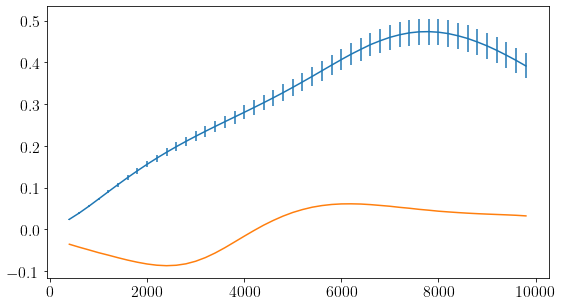

In [89]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [90]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot = np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


In [91]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-7
param_list = ['A_ksz','A_lens']
param_fiducial_values = [1.,1.]
comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
    cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [92]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.00973757 0.02014536]


In [93]:
1./fisher_sigmas

array([102.69504609,  49.63923155])

S4 kSZ2-g

In [102]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/s4_filter_functions_l_fl_230222.txt',        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_nl.txt',
'dlogell' : 0.,
'dell': 200.,
'ell_max' : 9800.0,
'ell_min' : 400.0,
'f_sky':0.4, 
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 122.3076 seconds


In [121]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h'])
cl_lensing = np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 10000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)

246.9284781133154


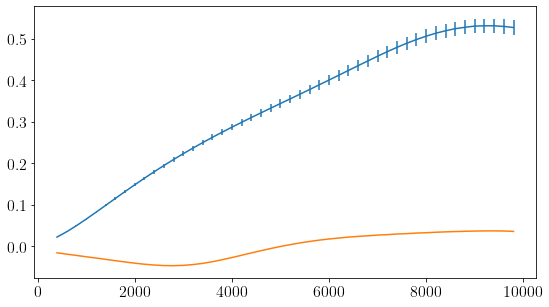

In [104]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

ax.errorbar(l,fac_plc*cl_tot,yerr=fac_plc*np.sqrt(covll))
ax.plot(l,fac_plc*cl_lensing)

In [105]:
cl_kSZ_kSZ_g_fiducial = cl_kSZ_kSZ_g_planck.copy()
ell_array = np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])

# fac_cov = 1e0
covmat_data = np.diag(covll)

inv_covmat_data = np.linalg.inv(covmat_data)
det_covmat_data = np.linalg.det(covmat_data)

fac_cl_to_dl = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])*(np.asarray(cl_kSZ_kSZ_g_fiducial['ell'])+1.)/2./np.pi

cl_ksz_tot = np.asarray(cl_kSZ_kSZ_g_fiducial['1h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['2h'])+np.asarray(cl_kSZ_kSZ_g_fiducial['3h'])
cl_lens = np.asarray(cl_kSZ_kSZ_g['lensing term'])


In [118]:
dcl_kSZ_kSZ_g_tot = []
dl_kSZ_kSZ_g_tot_plus = []
dl_kSZ_kSZ_g_tot_minus = []

delta_p_over_p = 1e-7
param_list = ['A_ksz','A_lens']
param_fiducial_values = [1.,1]
comps_list = [cl_ksz_tot,cl_lens]


cl_ksz_obs = param_fiducial_values[0]*cl_ksz_tot + param_fiducial_values[1]*cl_lens

for i in range(len(param_list)):
    ti = time.perf_counter()
    
    cl_kSZ_kSZ_g_tot_plus = cl_ksz_obs + delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_plus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_plus)
    
    cl_kSZ_kSZ_g_tot_minus = cl_ksz_obs - delta_p_over_p*param_fiducial_values[i]*comps_list[i]
    dl_kSZ_kSZ_g_tot_minus.append(fac_cl_to_dl*cl_kSZ_kSZ_g_tot_minus)
    
    

    dcl_kSZ_kSZ_g_tot.append((cl_kSZ_kSZ_g_tot_plus-cl_kSZ_kSZ_g_tot_minus)/2./param_fiducial_values[i]/delta_p_over_p)
    tf = time.perf_counter()
    print(f"computed in {tf - ti:0.4f} seconds")

computed in 0.0000 seconds
computed in 0.0000 seconds


In [119]:
#theory parameters
M_parameters = len(param_list)




dmu_parameters = []
for m in range(M_parameters):
    dmu_parameters.append(np.asarray(dcl_kSZ_kSZ_g_tot[m]))#/np.sqrt(fac_cov))


fisher_F = np.zeros((M_parameters,M_parameters))
for a in range(M_parameters):
    for b in range(M_parameters):
        fisher_M_ab = np.outer(dmu_parameters[a],dmu_parameters[b]) + np.outer(dmu_parameters[b],dmu_parameters[a])
        fisher_F[a][b]=0.5*np.trace(np.matmul(inv_covmat_data,fisher_M_ab))

inverse_fisher_F = np.linalg.inv(fisher_F)
fisher_sigmas = []
for m in range(M_parameters):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print(fisher_sigmas) 

[0.00485177 0.02041102]


In [120]:
1/fisher_sigmas

array([206.11017345,  48.99314841])

# HOD and galaxy distributions

In [9]:
M = Class()
M.set(ksz_params)
M.set({'output':'gal_gal_1h'})
M.compute()

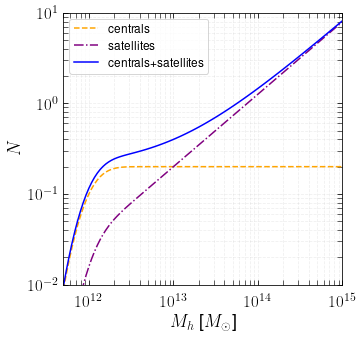

In [10]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$N$',size=title_size)
ax.set_xlabel(r'$M_h$ [$M_\odot$]',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2,1e1)
ax.set_xlim(5e11,1e15)
M_arr = np.geomspace(5e11,1e15,100)
get_N_centrals = np.vectorize(M.get_N_centrals)
Nc = get_N_centrals(0.,M_arr,1e12,0.25,0.2)
get_N_sats = np.vectorize(M.get_N_satellites)
Ns = get_N_sats(0.,M_arr,Nc,0.,0.8,1e13)
ax.plot(M_arr,Nc,ls='--',c='orange',label='centrals')
ax.plot(M_arr,Ns,ls='-.',c='purple',label='satellites')
ax.plot(M_arr,Ns+Nc,ls='-',c='b',label='centrals+satellites')
ax.legend(loc=2,ncol = 1,frameon=True,fontsize=12)
#plt.savefig('HOD_fig1_2106.08438.pdf')

In [27]:
M = Class()
M.set(ksz_params)
M.set(bestfit_blue_hod_params)
M.set({'output':'gal_gal_1h'
      })

M.compute()
get_ng_bar_at_z = np.vectorize(M.get_ng_bar_at_z)
get_volume = np.vectorize(M.get_volume_dVdzdOmega_at_z)
M = Class()
M.set(ksz_params)
M.set(bestfit_blue_hod_params)
M.set({'output':'gal_gal_1h',
       'alpha_s_HOD' : 0.
      })

M.compute()
get_ng_bar_2nc_at_z = np.vectorize(M.get_ng_bar_at_z)

In [28]:
z_arr = np.linspace(1e-8,4.,1000)

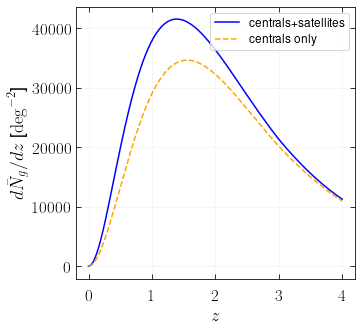

In [29]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$d\bar{N}_g/dz$    [$\mathrm{deg}^{-2}$]',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
# ax.set_ylim(1e0,2e3)
# ax.set_xlim(5e11,1e15)

ax.plot(z_arr,get_ng_bar_at_z(z_arr)*get_volume(z_arr)/3282.8,ls='-',c='blue',label='centrals+satellites')
ax.plot(z_arr,get_ng_bar_2nc_at_z(z_arr)*get_volume(z_arr)/3282.8/2.,ls='--',c='orange',label='centrals only')

ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)
#plt.savefig('HOD_fig1_2106.08438.pdf')



In [30]:
M = Class()
M.set(ksz_params)
M.set(bestfit_blue_hod_params)
M.set({'output':'gal_gal_1h',
       'galaxy_sample' : 'unwise',
       'galaxy_sample_id' : 'blue'
})

M.compute()
get_dNgdz_cat_blue = np.vectorize(M.get_galaxy_number_counts)
M = Class()
M.set(ksz_params)
M.set(bestfit_green_hod_params)
M.set({'output':'gal_gal_1h',
       'galaxy_sample' : 'unwise',
       'galaxy_sample_id' : 'green'
})

M.compute()
get_dNgdz_cat_green = np.vectorize(M.get_galaxy_number_counts)

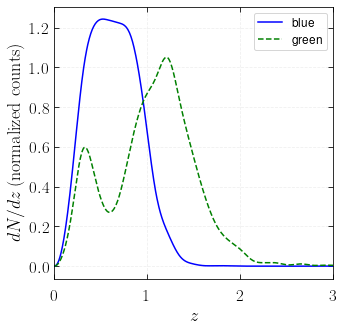

In [32]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$dN/dz$  $(\mathrm{normalized\,\,counts})$',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
# ax.set_ylim(1e0,2e3)
ax.set_xlim(0.,3.)

ax.plot(z_arr,get_dNgdz_cat_blue(z_arr),ls='-',c='blue',label='blue')
ax.plot(z_arr,get_dNgdz_cat_green(z_arr),ls='--',c='green',label='green')


ax.legend(loc=1,ncol = 1,frameon=True,fontsize=12)
#plt.savefig('HOD_fig1_2106.08438.pdf')




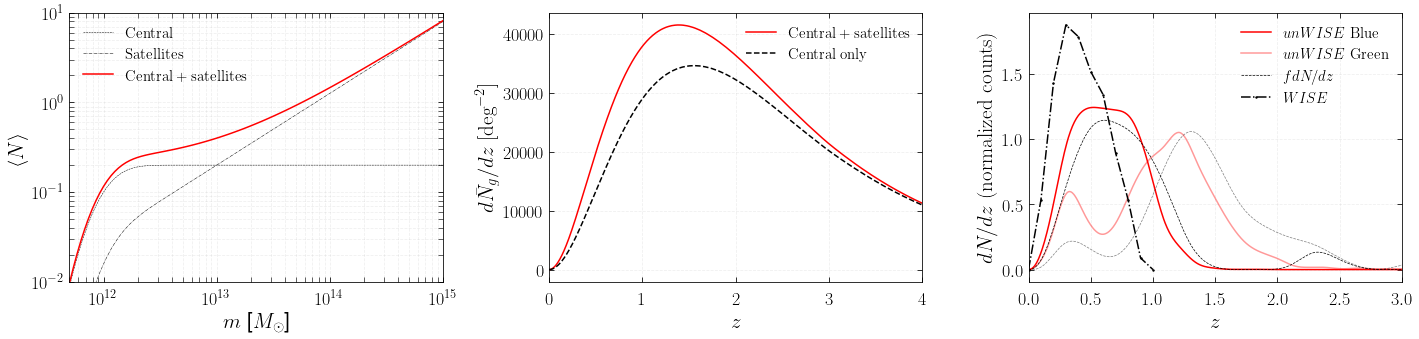

In [45]:
label_size = 18
title_size = 21
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))


ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$\langle N\rangle$',size=title_size)
ax.set_xlabel(r'$m$ [$M_\odot$]',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2,1e1)
ax.set_xlim(5e11,1e15)
M_arr = np.geomspace(5e11,1e15,100)
get_N_centrals = np.vectorize(M.get_N_centrals)
Nc = get_N_centrals(0.,M_arr,1e12,0.25,0.2)
get_N_sats = np.vectorize(M.get_N_satellites)
Ns = get_N_sats(0.,M_arr,Nc,0.,0.8,1e13)
ax.plot(M_arr,Nc,ls='--',c='k',label=r'$\mathrm{Central}$',lw=0.5)
ax.plot(M_arr,Ns,ls='-.',c='k',label=r'$\mathrm{Satellites}$',lw=0.5)
ax.plot(M_arr,Ns+Nc,ls='-',c='r',label=r'$\mathrm{Central+satellites}$')
ax.legend(loc=2,ncol = 1,frameon=False,fontsize=15)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$d\bar{N}_g/dz$    $[\mathrm{deg}^{-2}]$',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
# ax.set_ylim(1e0,2e3)
# ax.set_xlim(5e11,1e15)

# steradian to square degree

ax.plot(z_arr,get_ng_bar_at_z(z_arr)*get_volume(z_arr)/3282.8,ls='-',c='r',label=r'$\mathrm{Central+satellites}$')
ax.plot(z_arr,get_ng_bar_2nc_at_z(z_arr)*get_volume(z_arr)/3282.8/2.,ls='--',c='k',label=r'$\mathrm{Central\,\,only}$')

ax.legend(loc=1,ncol = 1,frameon=False,fontsize=15)

ax.set_xlim(0.,4.)

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r'$dN/dz$  $(\mathrm{normalized\,\,counts})$',size=title_size)
ax.set_xlabel(r'$z$',size=title_size)
ax.set_xscale('linear')
ax.set_yscale('linear')
# ax.set_ylim(1e0,2e3)
ax.set_xlim(0.,3.)

ax.plot(z_arr,get_dNgdz_cat_blue(z_arr),ls='-',c='r',label=r'$unWISE\,\,\mathrm{Blue}$')
ax.plot(z_arr,get_dNgdz_cat_green(z_arr),ls='-',c='r',label=r'$unWISE\,\,\mathrm{Green}$',alpha=0.4)


zug, fdndzug_b, fdndzug_g, fdndzug_r = np.loadtxt('../sz_auxiliary_files/UNWISE_galaxy_distributions/normalised_fdndz.txt',unpack=True)
ax.plot(zug,fdndzug_b,label=r'$fdN/dz$',lw=0.7,ls='--',c='k')

ax.plot(zug,fdndzug_g,lw=0.7,ls='--',c='k',alpha=0.5)
z, dnwise = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',unpack=True)

ax.plot(z,dnwise,label=r'$WISE$',c='k',marker='o',markersize=1.4,ls='-.')
ax.legend(loc=1,ncol = 1,frameon=False,fontsize=15)
fig.tight_layout()
plt.savefig('galaxies.pdf')




In [35]:
np.trapz(get_ng_bar_at_z(z_arr)*get_volume(z_arr)*get_dNgdz_cat_blue(z_arr)/3282.8,z_arr)

24627.70988141382

In [65]:
M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set(ksz_params)
M.set(bestfit_green_hod_params)

# M.set({'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h'})
M.set({'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h',
       #kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
#        'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

# 'dlogell' : 0.,
# 'dell': 200.,
# 'ell_max' : 2800.0,
# 'ell_min' : 400.0,
'f_sky':0.5, # 0.3 for advACT, 0.4 for SO and S4, 0.5 for planck
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':1,
      })




ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 7.5018 seconds


In [66]:
def binning(ell_class, dl_class, ell_alex, bpwf, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True):
    """
    Interpolate class dl's, convert ro cl's, and binn, according to alex binning scheme  
    in log 
    bwf- bandpower window function 
    """
    #interpolate and to cl's (Alex data is in cl's)
    #print(ell_class)
    dl_class = np.log(dl_class)
    f_kg = interp1d(ell_class, dl_class)
    new_ell = np.arange(2, ell_alex[15], 1) # up to 1051.5
    inter_dls=np.asarray(f_kg(new_ell))
    inter_dls = np.exp(inter_dls)
    if conv2cl==True:
        inter_cls = inter_dls*(2.0*np.pi)/(new_ell)/(new_ell+1.0)
    #binning / bandpower WF from Alex 
    clbinned = np.zeros(10)
    for i in range (10):
        wi = bpwf[i]
        # wi starts from ell=2 according to Alex, email 1-9-22; could add ell=0,1, but would contribute nothing to the sum
        ci_binned = np.sum(wi[2:1504]*inter_cls[:1502])
        #print(ci_binned)
        clbinned[i]=ci_binned
    #print(clbinned)
    return ell_alex[:10], clbinned[:10]

In [69]:
theory = M.cl_gg()
shot_noise = M.A_sn()


s_blue =  0.455
s_green =  0.648
s_red = 0.842
# /Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts
path_data = "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/datapointsforunwisexcmblensing/"
path_cov = "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/datapointsforunwisexcmblensing/covariances/"

bpwf_gg = np.loadtxt(path_data+"cl_highL6000_sz_mask_C1+gaussian_filter20_windows_auto.txt")

alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample2.dat')
cov = np.loadtxt(path_cov + "Covariance_2222_green.txt")
s = s_green

trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_green_transfer_namaster.txt')


    
ell_alex, cl_alex, sigma_alex = alex[0], alex[1], alex[2]
cov_alex = cov




cl_ell_theory = theory['ell']
dl_1h_theory = theory['1h']
dl_2h_theory = theory['2h']
dl_gg_theory = np.asarray(list(dl_1h_theory)) + np.asarray(list(dl_2h_theory))
ell_theory = np.asarray(list(cl_ell_theory))
ell_gg_binned, cl_gg_binned = binning(ell_theory, dl_gg_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)



# Cl_kxmu
theory_km =M.cl_gm()# 
cl_ell_theory_gm = theory_km['ell']
dl_1h_theory_gm = theory_km['1h']
dl_2h_theory_gm = theory_km['2h']
dl_gm_theory = np.asarray(list(dl_1h_theory_gm)) + np.asarray(list(dl_2h_theory_gm))
ell_theory = np.asarray(list(cl_ell_theory_gm))
ell_gm_binned, cl_gm_binned = binning(ell_theory, dl_gm_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)

# Cl_muxmu
theory_mm =M.cl_mm()# 
cl_ell_theory_mm = theory_mm['ell']
dl_1h_theory_mm = theory_mm['1h']
dl_2h_theory_mm = theory_mm['2h']
dl_mm_theory = np.asarray(list(dl_1h_theory_mm)) + np.asarray(list(dl_2h_theory_mm))
ell_theory = np.asarray(list(cl_ell_theory_mm))
ell_mm_binned, cl_mm_binned = binning(ell_theory, dl_mm_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)
print('sigma8',M.sigma8())
# M.struct_cleanup()
# M.empty()
cl_bin_tot  =  cl_gg_binned + 2*(5*s-2)*cl_gm_binned  + (5*s-2)*(5*s-2)*cl_mm_binned + shot_noise
cl_final = cl_bin_tot[1:]
ell = ell_gm_binned[1:]

sigma8 0.8100262035099804


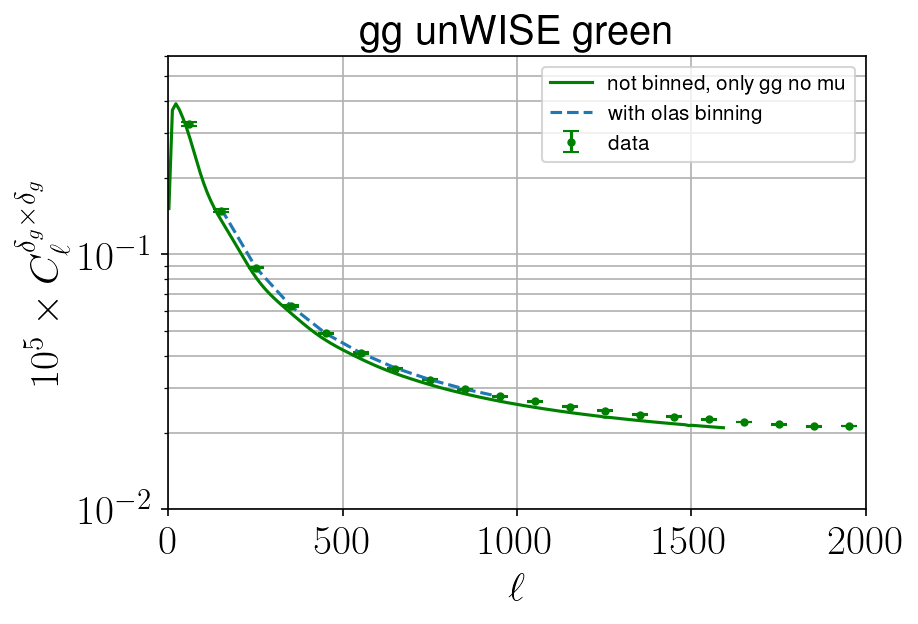

In [75]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
ax.set_xlabel(r"$\ell$", fontsize=20)
ax.set_ylabel(r'$10^5 \times C_{\ell}^{\delta_{g} \times \delta_{g}} $', fontsize=20)
ax.set_title(r"gg unWISE green") #"\n" "redshift epsrel=%.7s, redshift epsabs=%.7s" "\n" "mass epsrel=%.7s, mass epsabs=%.7s" "\n" "dell=%.7s" "\n" "ndim masses=%.7s, ndim resdhifts=%.7s"%(color,pdict['redshift_epsrel'],pdict['redshift_epsabs'], pdict['mass_epsrel'],pdict['mass_epsabs'], pdict['dell'], pdict['ndim_masses'], pdict['ndim_redshifts']))
ax.errorbar(ell_alex,  1e5 * cl_alex, yerr= 1e5 *sigma_alex, fmt = ".", color = 'green', capsize=4, label="data")


l =np.asarray(M.cl_gg()['ell'])
fac = l*(l+1.)/2./np.pi
ax.plot(M.cl_gg()['ell'],1e5*np.asarray(M.cl_gg()['1h'])/fac+1e5*np.asarray(M.cl_gg()['2h'])/fac + 1e5*M.A_sn(),
       c='g',label='not binned, only gg no mu')
ax.plot(ell,1e5*cl_final,ls='--',label='with olas binning')
ax.axes.set_xlim(0,2000)
ax.axes.set_ylim(1e-2,6e-1)
ax.tick_params(axis="x", labelsize=20) 
ax.tick_params(axis="y", labelsize=20)
ax.axes.axhline(0, color='k', lw=0.4)
ax.legend(prop={'size': 10})
ax.set_yscale('log')
# ax.set_xscale('log')
ax.grid(which="both" )

plt.show()



In [79]:
M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set(ksz_params)
M.set(bestfit_blue_hod_params)

# M.set({'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h'})
M.set({'output':'gal_gal_1h,gal_gal_2h,gal_lensmag_1h,gal_lensmag_2h, lensmag_lensmag_1h, lensmag_lensmag_2h',
       #kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
#        'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

# 'dlogell' : 0.,
# 'dell': 200.,
# 'ell_max' : 2800.0,
# 'ell_min' : 400.0,
'f_sky':0.5, # 0.3 for advACT, 0.4 for SO and S4, 0.5 for planck
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':1,
      })




ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 7.7993 seconds


In [80]:
def binning(ell_class, dl_class, ell_alex, bpwf, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True):
    """
    Interpolate class dl's, convert ro cl's, and binn, according to alex binning scheme  
    in log 
    bwf- bandpower window function 
    """
    #interpolate and to cl's (Alex data is in cl's)
    #print(ell_class)
    dl_class = np.log(dl_class)
    f_kg = interp1d(ell_class, dl_class)
    new_ell = np.arange(2, ell_alex[15], 1) # up to 1051.5
    inter_dls=np.asarray(f_kg(new_ell))
    inter_dls = np.exp(inter_dls)
    if conv2cl==True:
        inter_cls = inter_dls*(2.0*np.pi)/(new_ell)/(new_ell+1.0)
    #binning / bandpower WF from Alex 
    clbinned = np.zeros(10)
    for i in range (10):
        wi = bpwf[i]
        # wi starts from ell=2 according to Alex, email 1-9-22; could add ell=0,1, but would contribute nothing to the sum
        ci_binned = np.sum(wi[2:1504]*inter_cls[:1502])
        #print(ci_binned)
        clbinned[i]=ci_binned
    #print(clbinned)
    return ell_alex[:10], clbinned[:10]

In [81]:
theory = M.cl_gg()
shot_noise = M.A_sn()


s_blue =  0.455
s_green =  0.648
s_red = 0.842
# /Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts
path_data = "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/datapointsforunwisexcmblensing/"
path_cov = "/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz_external_data_and_scripts/datapointsforunwisexcmblensing/covariances/"

bpwf_gg = np.loadtxt(path_data+"cl_highL6000_sz_mask_C1+gaussian_filter20_windows_auto.txt")

alex = np.loadtxt(path_data+'Bandpowers_Auto_Sample1.dat')
cov =  np.loadtxt(path_cov +"Covariance_1111_blue.txt")
s = s_blue

trans = np.loadtxt(path_data+'clgg_highL6000_sz_mask_C1+gaussian_filter20_smooth_blue_transfer_namaster.txt')


    
ell_alex, cl_alex, sigma_alex = alex[0], alex[1], alex[2]
cov_alex = cov




cl_ell_theory = theory['ell']
dl_1h_theory = theory['1h']
dl_2h_theory = theory['2h']
dl_gg_theory = np.asarray(list(dl_1h_theory)) + np.asarray(list(dl_2h_theory))
ell_theory = np.asarray(list(cl_ell_theory))
ell_gg_binned, cl_gg_binned = binning(ell_theory, dl_gg_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)



# Cl_kxmu
theory_km =M.cl_gm()# 
cl_ell_theory_gm = theory_km['ell']
dl_1h_theory_gm = theory_km['1h']
dl_2h_theory_gm = theory_km['2h']
dl_gm_theory = np.asarray(list(dl_1h_theory_gm)) + np.asarray(list(dl_2h_theory_gm))
ell_theory = np.asarray(list(cl_ell_theory_gm))
ell_gm_binned, cl_gm_binned = binning(ell_theory, dl_gm_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)

# Cl_muxmu
theory_mm =M.cl_mm()# 
cl_ell_theory_mm = theory_mm['ell']
dl_1h_theory_mm = theory_mm['1h']
dl_2h_theory_mm = theory_mm['2h']
dl_mm_theory = np.asarray(list(dl_1h_theory_mm)) + np.asarray(list(dl_2h_theory_mm))
ell_theory = np.asarray(list(cl_ell_theory_mm))
ell_mm_binned, cl_mm_binned = binning(ell_theory, dl_mm_theory, ell_alex, bpwf_gg, Nellbins=9, ellmin = 100.5, ellmax = 1000.5, conv2cl=True)
print('sigma8',M.sigma8())
# M.struct_cleanup()
# M.empty()
cl_bin_tot  =  cl_gg_binned + 2*(5*s-2)*cl_gm_binned  + (5*s-2)*(5*s-2)*cl_mm_binned + shot_noise
cl_final = cl_bin_tot[1:]
ell = ell_gm_binned[1:]

sigma8 0.8100262035099804


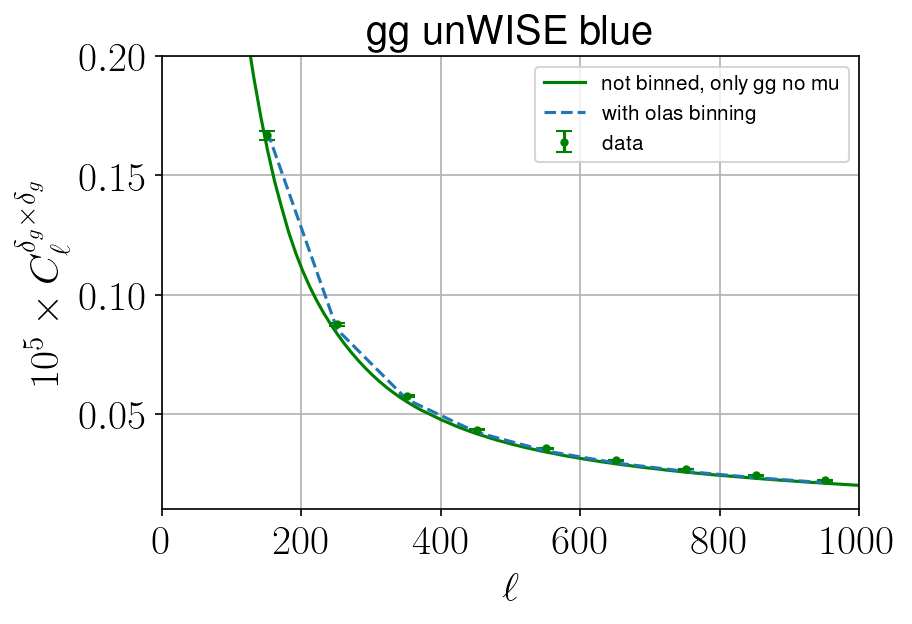

In [85]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=150)
ax.set_xlabel(r"$\ell$", fontsize=20)
ax.set_ylabel(r'$10^5 \times C_{\ell}^{\delta_{g} \times \delta_{g}} $', fontsize=20)
ax.set_title(r"gg unWISE blue") #"\n" "redshift epsrel=%.7s, redshift epsabs=%.7s" "\n" "mass epsrel=%.7s, mass epsabs=%.7s" "\n" "dell=%.7s" "\n" "ndim masses=%.7s, ndim resdhifts=%.7s"%(color,pdict['redshift_epsrel'],pdict['redshift_epsabs'], pdict['mass_epsrel'],pdict['mass_epsabs'], pdict['dell'], pdict['ndim_masses'], pdict['ndim_redshifts']))
ax.errorbar(ell_alex,  1e5 * cl_alex, yerr= 1e5 *sigma_alex, fmt = ".", color = 'green', capsize=4, label="data")


l =np.asarray(M.cl_gg()['ell'])
fac = l*(l+1.)/2./np.pi
ax.plot(M.cl_gg()['ell'],1e5*np.asarray(M.cl_gg()['1h'])/fac+1e5*np.asarray(M.cl_gg()['2h'])/fac + 1e5*M.A_sn(),
       c='g',label='not binned, only gg no mu')
ax.plot(ell,1e5*cl_final,ls='--',label='with olas binning')
ax.axes.set_xlim(0,1000)
ax.axes.set_ylim(1e-2,0.2)
ax.tick_params(axis="x", labelsize=20) 
ax.tick_params(axis="y", labelsize=20)
ax.axes.axhline(0, color='k', lw=0.4)
ax.legend(prop={'size': 10})
ax.set_yscale('linear')
# ax.set_xscale('log')
ax.grid(which="both" )

plt.show()



# Summary Plots 

## plot fisher contours, comparing different experiments for K2G

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


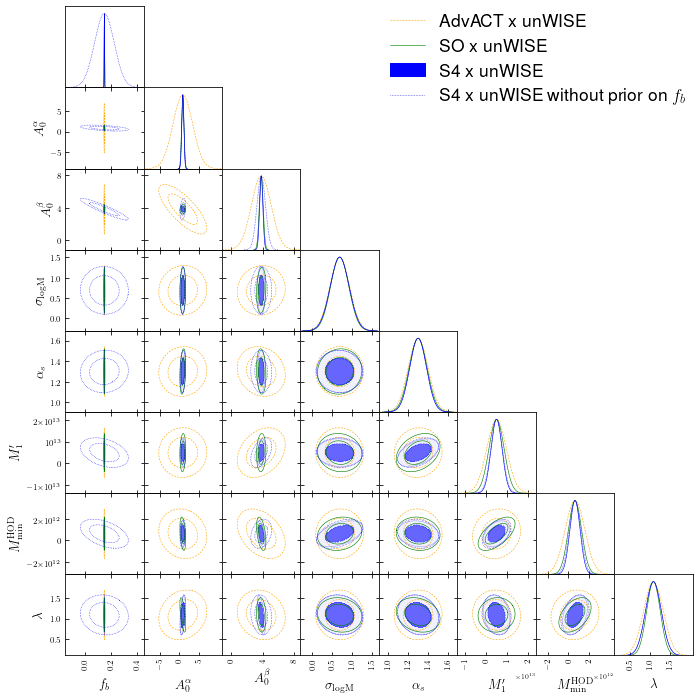

In [67]:
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
              'sigma_log10M_HOD',
              'alpha_s_HOD',
              'M1_prime_HOD',
              'M_min_HOD',
              'x_out_truncated_nfw_profile_satellite_galaxies'
             ]


param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                         0.69, # sigma_log10M_HOD
                         1.30, # alpha_s_HOD
                         5.03e12, # Msun/h # M1_prime_HOD
                         6.25e11, # Msun/h M_min
                         1.09, # x_out_truncated_nfw_profile_satellite_galaxies
                        ]


# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_advact = np.load('test_fisher_advact_unwise_blue_fb_prior.npy')
inverse_fisher_F_so = np.load('test_fisher_so_unwise_blue_fb_prior.npy')
inverse_fisher_F_s4 = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
inverse_fisher_F_s4_no_prior = np.load('test_fisher_s4_unwise_blue_fb_noprior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A^{\alpha}_0$',r'$A^{\beta}_0$',r'\sigma_\mathrm{log M}', r'\alpha_s',
         r'M_1^\prime', r'M_\mathrm{min}^\mathrm{HOD}', r'\lambda']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, inverse_fisher_F_advact, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_so, 
                     labels = labels, 
                     names = names)


matrix3 = GaussianND(mean, 
                     inverse_fisher_F_s4, 
                     labels = labels, 
                     names = names)

matrix4 = GaussianND(mean, 
                     inverse_fisher_F_s4_no_prior, 
                     labels = labels, 
                     names = names)


# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 18
g.settings.axes_fontsize = 13
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2,
                 matrix3,
                 matrix4], 
                names,
            filled = [False,False,True,False],
            legend_labels = ['AdvACT x unWISE' , 
                             'SO x unWISE', 
                             'S4 x unWISE',
                             'S4 x unWISE without prior on $f_b$'], 
            contour_ls =  ['--', '-','-',':'],
            legend_loc='upper right', 
            contour_colors = ['orange','green','blue','blue'])

# Save triplot
g.export('advact_so_s4_unwise_blue_fb_prior.pdf')

In [23]:
matrix1

# galaxy lensing:

a Plot that compares:
advACT x DES; advACT x LSST;

another plot that compares:
advACT x LSST, SO x LSST, s4 x LSST

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


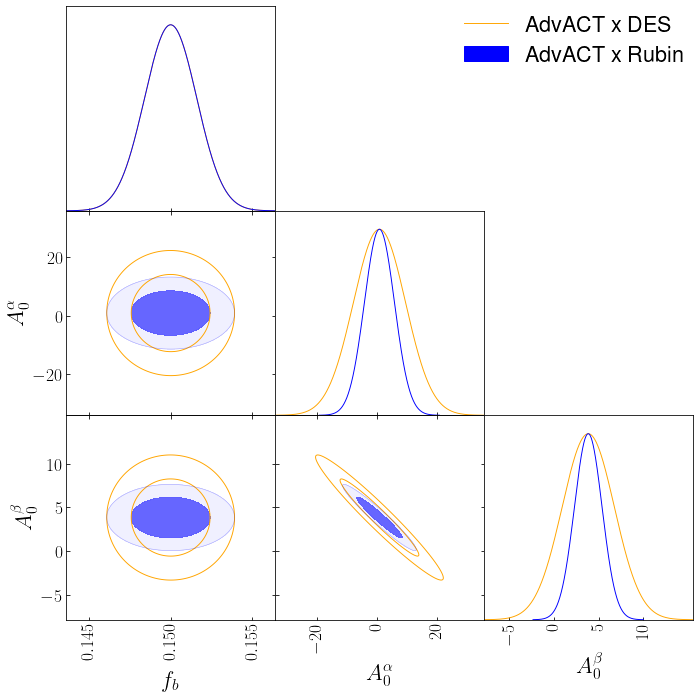

In [197]:

param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]





# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_advact_lsst = np.load('test_fisher_advact_lsst_fb_with_prior.npy')
inverse_fisher_F_advact_des = np.load('test_fisher_advact_des_fb_with_prior.npy')
# inverse_fisher_F_s4 = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A^{\alpha}_0$',r'$A^{\beta}_0$']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, inverse_fisher_F_advact_des, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_advact_lsst, 
                     labels = labels, 
                     names = names)



# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 23
g.settings.axes_fontsize = 18
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2], 
                names,
            filled = [False,True],
            legend_labels = ['AdvACT x DES' , 
                             'AdvACT x Rubin'], 
            contour_ls =  ['-','-'],
            legend_loc='upper right', 
            contour_colors = ['orange','blue'])

# Save triplot
# g.export('advact_des_lsst_fb_prior.pdf')

In [198]:
print(param_list)
print(' ')
print('inverse_fisher_F_advact_des')
inverse_fisher_F = inverse_fisher_F_advact_des
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 





['f_b_gas', 'A_alpha', 'A_beta']
 
inverse_fisher_F_advact_des
[93.98512151  0.10094743  1.30996642]


GetDist Version: 1.3.1, Matplotlib version: 3.4.2


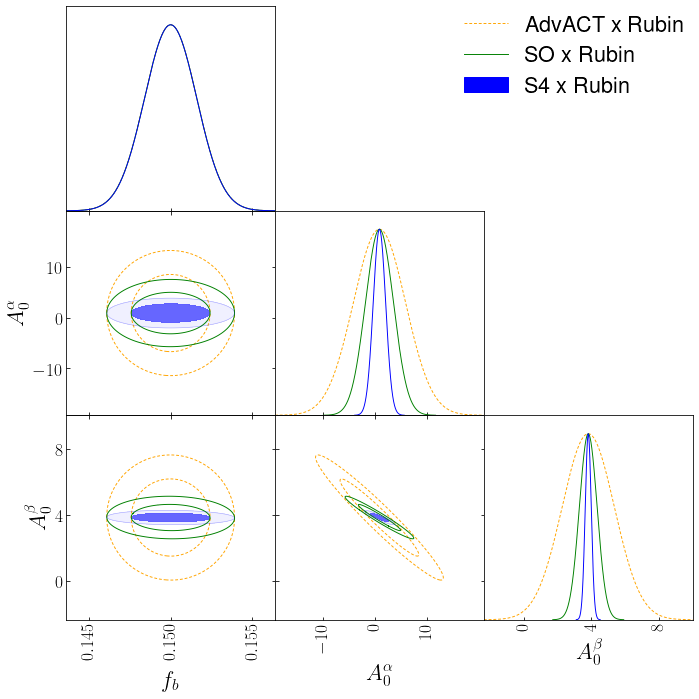

In [195]:

param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]





# plot ellipses
plt.rcParams['text.usetex'] = True
inverse_fisher_F_advact_lsst = np.load('test_fisher_advact_lsst_fb_with_prior.npy')
inverse_fisher_F_so_lsst = np.load('test_fisher_so_lsst_fb_with_prior.npy')
inverse_fisher_F_s4_lsst = np.load('test_fisher_s4_lsst_fb_with_prior.npy')
# inverse_fisher_F_s4 = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A^{\alpha}_0$',r'$A^{\beta}_0$']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, inverse_fisher_F_advact_lsst, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_so_lsst, 
                     labels = labels, 
                     names = names)

matrix3 = GaussianND(mean, 
                     inverse_fisher_F_s4_lsst, 
                     labels = labels, 
                     names = names)


# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 23
g.settings.axes_fontsize = 18
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2,
                 matrix3], 
                names,
            filled = [False,False,True],
            legend_labels = ['AdvACT x Rubin' , 
                             'SO x Rubin',
                             'S4 x Rubin'], 
            contour_ls =  ['--','-','-'],
            legend_loc='upper right', 
            contour_colors = ['orange','green','blue'])

# Save triplot
# g.export('advact_so_s4_lsst_fb_prior.pdf')

In [196]:
print(param_list)
print(' ')
print('inverse_fisher_F_advact_lsst')
inverse_fisher_F = inverse_fisher_F_advact_lsst
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 






['f_b_gas', 'A_alpha', 'A_beta']
 
inverse_fisher_F_advact_lsst
[93.98549608  0.17535015  2.474718  ]


GetDist Version: 1.3.1, Matplotlib version: 3.4.2


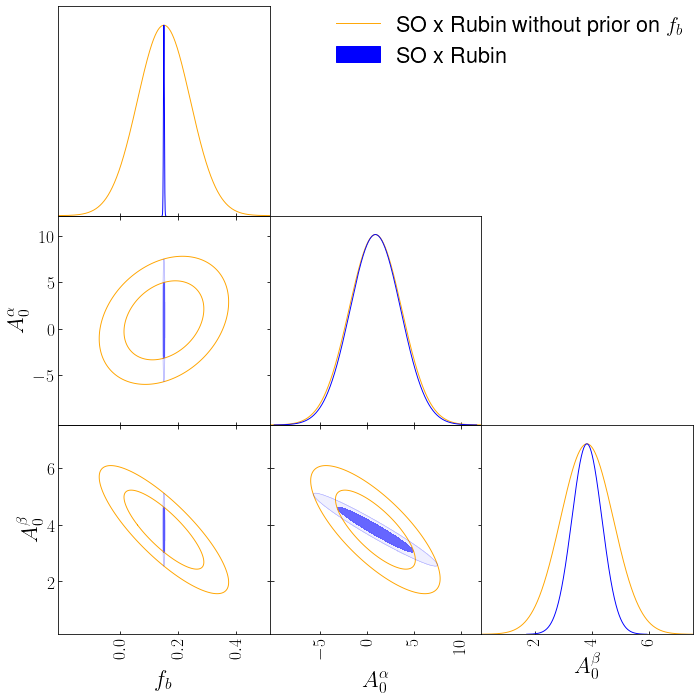

In [193]:

param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]





# plot ellipses
plt.rcParams['text.usetex'] = True
# inverse_fisher_F_advact_lsst = np.load('test_fisher_advact_lsst_fb_without_prior.npy')
inverse_fisher_F_so_lsst_with_prior = np.load('test_fisher_so_lsst_fb_with_prior.npy')
inverse_fisher_F_so_lsst_without_prior = np.load('test_fisher_so_lsst_fb_without_prior.npy')
# inverse_fisher_F_s4 = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A^{\alpha}_0$',r'$A^{\beta}_0$']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, 
                     inverse_fisher_F_so_lsst_without_prior, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_so_lsst_with_prior, 
                     labels = labels, 
                     names = names)

# matrix3 = GaussianND(mean, 
#                      inverse_fisher_F_s4_lsst, 
#                      labels = labels, 
#                      names = names)


# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 23
g.settings.axes_fontsize = 18
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2], 
                names,
            filled = [False,True],
            legend_labels = [r'SO x Rubin without prior on $f_b$' , 
                             'SO x Rubin',
                             ], 
            contour_ls =  ['-','-'],
            legend_loc='upper right', 
            contour_colors = ['orange','blue'])

# Save triplot
# g.export('advact_so_lsst_fb_prior_vs_no_prior.pdf')

In [194]:
print(param_list)
print(' ')
print('inverse_fisher_F_so_lsst_without_prior')
inverse_fisher_F = inverse_fisher_F_so_lsst_without_prior
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 

print(' ')
print('inverse_fisher_F_so_lsst_with_prior')
inverse_fisher_F = inverse_fisher_F_so_lsst_with_prior
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 



['f_b_gas', 'A_alpha', 'A_beta']
 
inverse_fisher_F_so_lsst_without_prior
[1.64654268 0.31248133 4.14366262]
 
inverse_fisher_F_so_lsst_with_prior
[93.99938437  0.32622019  7.2777803 ]


GetDist Version: 1.3.1, Matplotlib version: 3.4.2


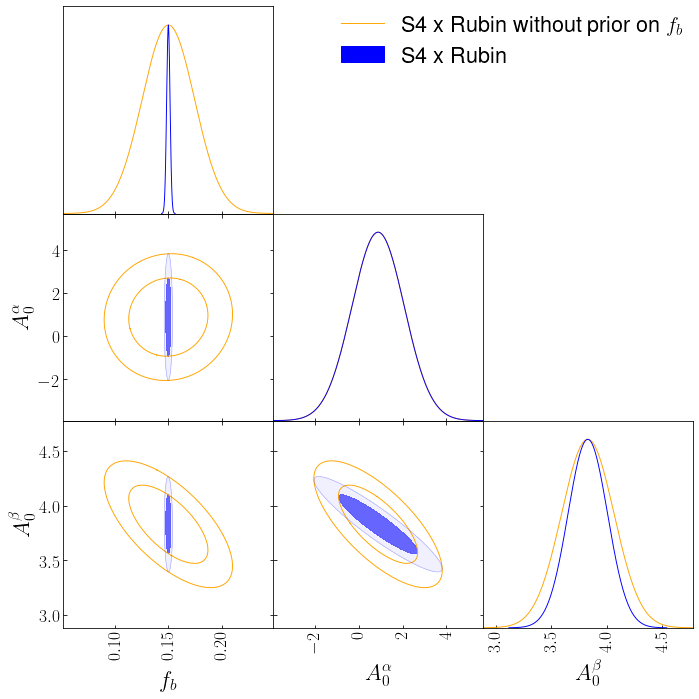

In [191]:

param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]





# plot ellipses
plt.rcParams['text.usetex'] = True
# inverse_fisher_F_advact_lsst = np.load('test_fisher_advact_lsst_fb_without_prior.npy')
inverse_fisher_F_s4_lsst_with_prior = np.load('test_fisher_s4_lsst_fb_with_prior.npy')
inverse_fisher_F_s4_lsst_without_prior = np.load('test_fisher_s4_lsst_fb_without_prior.npy')
# inverse_fisher_F_s4 = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A^{\alpha}_0$',r'$A^{\beta}_0$']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, 
                     inverse_fisher_F_s4_lsst_without_prior, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_s4_lsst_with_prior, 
                     labels = labels, 
                     names = names)

# matrix3 = GaussianND(mean, 
#                      inverse_fisher_F_s4_lsst, 
#                      labels = labels, 
#                      names = names)


# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 23
g.settings.axes_fontsize = 18
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2], 
                names,
            filled = [False,True],
            legend_labels = [r'S4 x Rubin without prior on $f_b$' , 
                             'S4 x Rubin',
                             ], 
            contour_ls =  ['-','-'],
            legend_loc='upper right', 
            contour_colors = ['orange','blue'])

# Save triplot
# g.export('advact_s4_lsst_fb_prior_vs_no_prior.pdf')

In [192]:
print(param_list)
print(' ')
print('inverse_fisher_F_s4_lsst_without_prior')
inverse_fisher_F = inverse_fisher_F_s4_lsst_without_prior
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 

print(' ')
print('inverse_fisher_F_s4_lsst_with_prior')
inverse_fisher_F = inverse_fisher_F_s4_lsst_with_prior
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 



['f_b_gas', 'A_alpha', 'A_beta']
 
inverse_fisher_F_s4_lsst_without_prior
[ 6.08891663  0.73540894 16.21091219]
 
inverse_fisher_F_s4_lsst_with_prior
[94.18199437  0.73612873 21.54375134]


# CMB lensing

GetDist Version: 1.3.1, Matplotlib version: 3.4.2


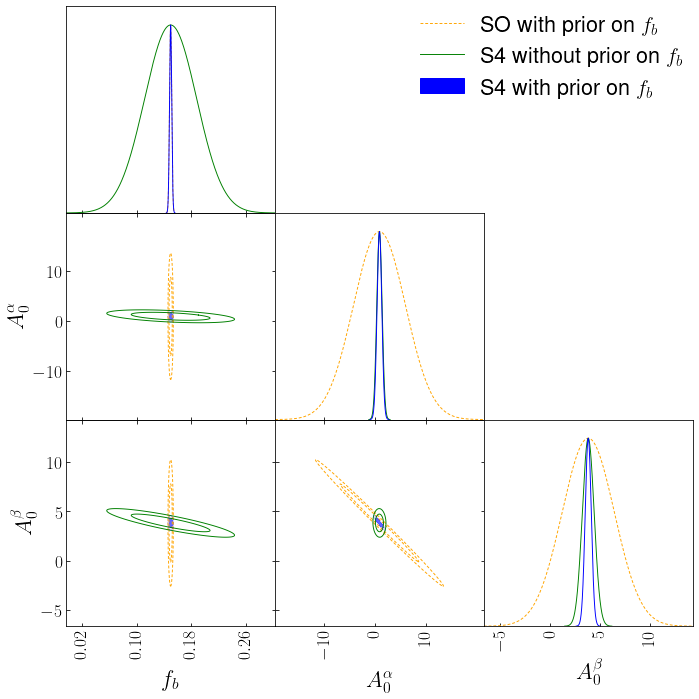

In [174]:

param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]





# plot ellipses
plt.rcParams['text.usetex'] = True
# inverse_fisher_F_advact_lsst = np.load('test_fisher_advact_lsst_fb_without_prior.npy')
inverse_fisher_F_s4 = np.load('test_fisher_s4_s4lensing_with_prior_on_fb.npy')
inverse_fisher_F_s4_no_prior = np.load('test_fisher_s4_s4lensing.npy')
inverse_fisher_F_so = np.load('test_fisher_so_solensing_with_prior_on_fb.npy')
# inverse_fisher_F_s4 = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
# inverse_fisher_F_planck = np.load('planck_unwise_ttg_221121.npy')

import getdist 
from getdist import plots

# The plotting scripts also let you plot Gaussian (or Gaussian mixture) contours 
from getdist.gaussian_mixtures import GaussianND
from getdist.gaussian_mixtures import Mixture2D
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

## Load Fisher matrix and invert it to get Covariance array
# Load Fisher matrix
# File1 = np.loadtxt('File1.dat')
# Invert to get Covariance matrix
# COV_File1 = np.linalg.inv(File1)[0:7,0:7]

# Mean of each cosmo parameters : respect order of generated "Big" Fisher matrix
mean = param_fiducial_values

# Names and labels
names = param_list
# labels = [r'f_b', r'A_{\alpha}', r'$A_{\beta}$']
# labels = [r'f_b', r'$A_{\beta}$', r'$\sigma_\mathrm{log M}$',
#          r'bf_b', r'$bA_{\beta}$', r'$b\alpha_{\mathrm{s}}$']
labels = [r'f_b', r'$A^{\alpha}_0$',r'$A^{\beta}_0$']


#   'sigma_log10M_HOD', r'$\sigma_\mathrm{log M}$'
#   'alpha_s_HOD', r'$\alpha_s^\mathrm{HOD}$'
#   'M1_prime_HOD', r'$M_1^\prime$'
#   'M_min_HOD', r'$M_\mathrm{min}^\mathrm{HOD}$'
#   'x_out_truncated_nfw_profile_satellite_galaxies', r'$\lambda$'

# Current method

matrix1 = GaussianND(mean, 
                     inverse_fisher_F_so, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_s4_no_prior, 
                     labels = labels, 
                     names = names)

matrix3 = GaussianND(mean, 
                     inverse_fisher_F_s4, 
                     labels = labels, 
                     names = names)


# Plot triplot
plt.rcParams['text.usetex'] = True
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})
g = plots.get_subplot_plotter()
g.settings.fig_width_inch = 10
# g.settings.constrained_layout = True
g.settings.figure_legend_frame = False
g.settings.legend_fontsize = 22
g.settings.axes_labelsize = 23
g.settings.axes_fontsize = 18
g.settings.axis_tick_x_rotation = 90
# g.settings.axis_tick_y_rotation = 45

# g.settings.alpha_filled_add = 0.9
# g.settings.title_limit_fontsize = 1

g.settings.solid_contour_palefactor = 0.9
g.settings.alpha_filled_add = 0.6

g.triangle_plot([matrix1,
                 matrix2,
                 matrix3], 
                names,
            filled = [False,False,True],
            legend_labels = [r'SO with prior on $f_b$' , 
                             r'S4 without prior on $f_b$',
                             r'S4 with prior on $f_b$'
                             ], 
            contour_ls =  ['--','-','-'],
            legend_loc='upper right', 
            contour_colors = ['orange','green','blue'])

# Save triplot
# g.export('so_s4_lensing.pdf')

In [175]:

matrix1 = GaussianND(mean, 
                     inverse_fisher_F_so, 
                     labels = labels, 
                     names = names)

matrix2 = GaussianND(mean, 
                     inverse_fisher_F_s4_no_prior, 
                     labels = labels, 
                     names = names)

matrix3 = GaussianND(mean, 
                     inverse_fisher_F_s4, 
                     labels = labels, 
                     names = names)

In [185]:
param_fiducial_values

[0.15, 0.88, 3.83]

In [190]:
print(param_list)
print(' ')
print('inverse_fisher_F_so')
inverse_fisher_F = inverse_fisher_F_so
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 

print(' ')
print('inverse_fisher_F_s4_no_prior')
inverse_fisher_F = inverse_fisher_F_s4_no_prior
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 

print(' ')
print('inverse_fisher_F_s4')
inverse_fisher_F = inverse_fisher_F_s4
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 

['f_b_gas', 'A_alpha', 'A_beta']
 
inverse_fisher_F_so
[93.99108128  0.17078582  1.45898849]
 
inverse_fisher_F_s4_no_prior
[3.9154634  1.67309408 6.44582114]
 
inverse_fisher_F_s4
[94.06648719  1.8786332  12.55347256]


# bispectrum plots

In [268]:
# zz = 2.
# M_min = 1e8
# M = Class()
# # params = planck_2015
# # M.set(params)
zz = 1.
M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,

'use_bg_at_z_in_ksz2g_eff' : 1, # !!!!!!VERY IMPORTANT

'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'nfw', # b16

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'mean_galaxy_bias,bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit'


})
M.compute()
bk_ttg_at_z_hm = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF = []
Bk_TTG_TL = []

pk_halofit = []
for k1 in k1_a:
  k2 = k1
  k3 = k1
  Bk_TTG_HF.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
    
    
lambda2 = 1.
lambda3 = 0.01


# zz = 2.
# M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,

'use_bg_at_z_in_ksz2g_eff' : 1, # !!!!!!VERY IMPORTANT
'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'nfw', # b16

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'mean_galaxy_bias,bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit',
"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm_sq = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF_sq = []
Bk_TTG_TL_sq = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF_sq.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL_sq.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))

    
lambda2 = 0.5
lambda3 = 0.5


# zz = 2.
# M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,
'use_bg_at_z_in_ksz2g_eff' : 1, # !!!!!!VERY IMPORTANT

'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,
    
    


'concentration parameter':'D08',


'gas profile':'nfw', # b16

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'mean_galaxy_bias,bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit',
"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm_f = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF_f = []
Bk_TTG_TL_f = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF_f.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL_f.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))








In [7]:
# zz = 2.
# M_min = 1e8
# M = Class()
# # params = planck_2015
# # M.set(params)
zz = 1.
M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,

'use_bg_at_z_in_ksz2g_eff' : 1, # !!!!!!VERY IMPORTANT

'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'B16', # b16
'gas profile mode':'agn',
'normalize_gas_density_profile': 1,

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'mean_galaxy_bias,bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit'


})
M.compute()
bk_ttg_at_z_hm = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF = []
Bk_TTG_TL = []

pk_halofit = []
for k1 in k1_a:
  k2 = k1
  k3 = k1
  Bk_TTG_HF.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
    
    
lambda2 = 1.
lambda3 = 0.01


# zz = 2.
# M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,

'use_bg_at_z_in_ksz2g_eff' : 1, # !!!!!!VERY IMPORTANT
'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',

'gas profile':'B16', # b16
'gas profile mode':'agn',
'normalize_gas_density_profile': 1,

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'mean_galaxy_bias,bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit',
"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm_sq = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF_sq = []
Bk_TTG_TL_sq = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF_sq.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL_sq.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))

    
lambda2 = 0.5
lambda3 = 0.5


# zz = 2.
# M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,
'use_bg_at_z_in_ksz2g_eff' : 1, # !!!!!!VERY IMPORTANT

'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
    
'gas profile':'B16', # b16
'gas profile mode':'agn',
'normalize_gas_density_profile': 1,
    
    


'concentration parameter':'D08',


# 'gas profile':'b16', # b16

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'mean_galaxy_bias,bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit',
"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm_f = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF_f = []
Bk_TTG_TL_f = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF_f.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL_f.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))








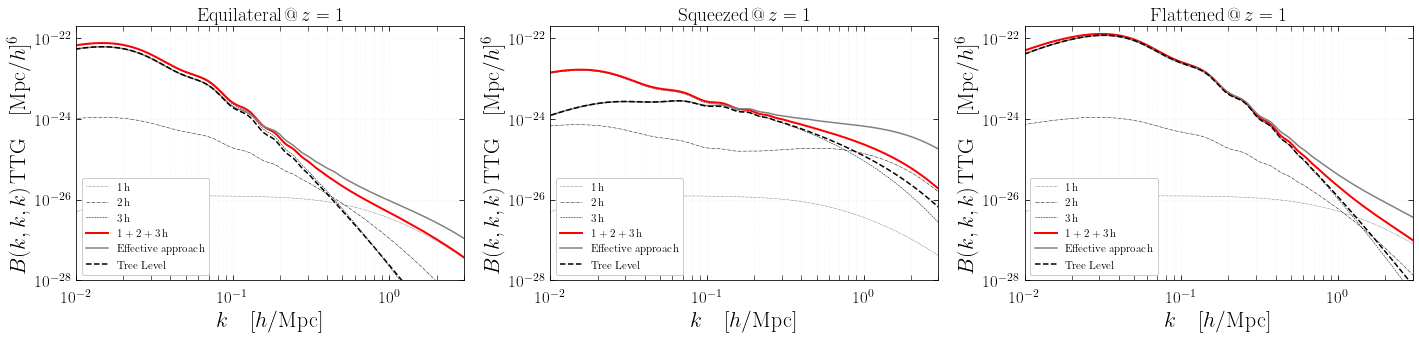

In [9]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,k,k)\,\mathrm{TTG}\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)




ax.loglog()
# plt.xlabel(r'$k\quad\mathrm{[h/Mpc]}$')
# plt.ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$')
ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)
# ax.grid(which='both')
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')
ax.set_title(r'$\mathrm{Equilateral}\,@\, z=1$')




    
ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,k,k)\,\mathrm{TTG}\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],np.asarray(bk_ttg_at_z_hm_sq['1h'])+np.asarray(bk_ttg_at_z_hm_sq['2h'])+np.asarray(bk_ttg_at_z_hm_sq['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF_sq),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL_sq),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)


ax.loglog()
# plt.xlabel(r'$k\quad\mathrm{[h/Mpc]}$')
# plt.ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$')
ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)
# ax.grid(which='both')
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$\mathrm{Squeezed}\,@\, z=1$')
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')


ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,k,k)\,\mathrm{TTG}\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],np.asarray(bk_ttg_at_z_hm_f['1h'])+np.asarray(bk_ttg_at_z_hm_f['2h'])+np.asarray(bk_ttg_at_z_hm_f['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF_f),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL_f),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)




ax.loglog()
# plt.xlabel(r'$k\quad\mathrm{[h/Mpc]}$')
# plt.ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$')
ax.set_ylim(1e1,3e8)
ax.set_xlim(2e-3,1e1)
# ax.grid(which='both')
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$\mathrm{Flattened}\,@\, z=1$')
ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
fig.tight_layout()
plt.savefig('bk_ttg_z1_wct_Mmin1e8_matter_B16_agn.pdf')






# Covmat galaxy lensing - AdvACT x DES

In [5]:

param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]


M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
'ndim_masses' : 50,
'ndim_redshifts' : 50,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.005,
# 'N_samp_fftw' : 250,
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.1,
    
    
'k_min_for_pk_class_sz' : 0.01,
# 'k_max_for_pk_class_sz' : 6.0,
'k_per_decade_class_sz' : 15,
# 'P_k_max_h/Mpc' : 10.0,
    

'N_kSZ2_gal_multipole_grid' :  30,
'N_kSZ2_gal_theta_grid' :  30,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

'n_z_psi_b1g' : 20,
'n_l_psi_b1g' : 20,

'n_z_psi_b2g' : 20,
'n_l_psi_b2g' : 20,

'n_z_psi_b2t' : 20,
'n_l_psi_b2t' : 20,

'n_z_psi_b1t' : 20,
'n_l_psi_b1t' : 20,

'n_z_psi_b1gt' : 20,
'n_l_psi_b1gt' : 20,
})


M.set(
    {
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',

        
'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 8,

        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 32.6606 seconds


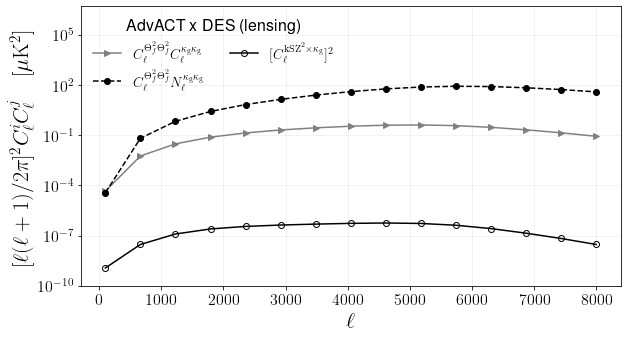

In [6]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()

arcmin_to_radians = np.pi/(60.*180.)
nl_kg = 0.3/(8./arcmin_to_radians/arcmin_to_radians)

fac_dl = (2.726e6)**2*np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi

den =  1.#(2.*np.asarray(M.cl_t2t2f()['ell'])+1.)*np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))**2.

ya = fac_dl**2.*np.asarray(M.cl_t2t2f()['t2t2f'])*(np.asarray(M.cl_kg_kg()['1h'])+np.asarray(M.cl_kg_kg()['2h']))/(np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi)
plt.plot(M.cl_t2t2f()['ell'],ya/den,marker='>',c='grey',
         label=r'$C_\ell^{\Theta_f^2\Theta_f^2}C_\ell^{\kappa_\mathrm{g}\kappa_\mathrm{g}}$')

ya = fac_dl**2.*np.asarray(M.cl_t2t2f()['t2t2f'])*nl_kg
plt.plot(M.cl_t2t2f()['ell'],ya/den,
         marker='o',
         label=r'$C_\ell^{\Theta_f^2\Theta_f^2}N_\ell^{\kappa_\mathrm{g}\kappa_\mathrm{g}}$',
         ls='--',
        c='k')

ya = fac_dl**2.*np.asarray(np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h']))**2.
plt.plot(M.cl_t2t2f()['ell'],ya/den,
         label=r'$[C_\ell^{\mathrm{kSZ}^2\times\kappa_\mathrm{g}}]^2$',
         marker='o',
         markerfacecolor='None',
         c='k'
        )

# plt.yscale('log')
# plt.legend()
# plt.xlabel('multipole l')
# plt.ylabel('Normalized cov')

ax.set_yscale('log')

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$[\ell(\ell+1)/2\pi]^2C_\ell^i C_\ell^j\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.grid(which='both',alpha=0.2)

ax.legend(title='AdvACT x DES (lensing)',
          loc=2,
          ncol=2,
          frameon=False,
          fontsize=14)
ax.set_ylim(1e-10,5e6)

fig.tight_layout()
plt.savefig('advACT_DESlens_covmat_terms.pdf')

# Covmat galaxy lensing - SO x Rubin

In [6]:

param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]


M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
'ndim_masses' : 50,
'ndim_redshifts' : 50,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.005,
# 'N_samp_fftw' : 250,
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.1,
    
    
'k_min_for_pk_class_sz' : 0.01,
# 'k_max_for_pk_class_sz' : 6.0,
'k_per_decade_class_sz' : 15,
# 'P_k_max_h/Mpc' : 10.0,
    

'N_kSZ2_gal_multipole_grid' :  30,
'N_kSZ2_gal_theta_grid' :  30,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

'n_z_psi_b1g' : 20,
'n_l_psi_b1g' : 20,

'n_z_psi_b2g' : 20,
'n_l_psi_b2g' : 20,

'n_z_psi_b2t' : 20,
'n_l_psi_b2t' : 20,

'n_z_psi_b1t' : 20,
'n_l_psi_b1t' : 20,

'n_z_psi_b1gt' : 20,
'n_l_psi_b1gt' : 20,
})


M.set(
    {
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',

        
'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,

        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',

'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 40.6130 seconds


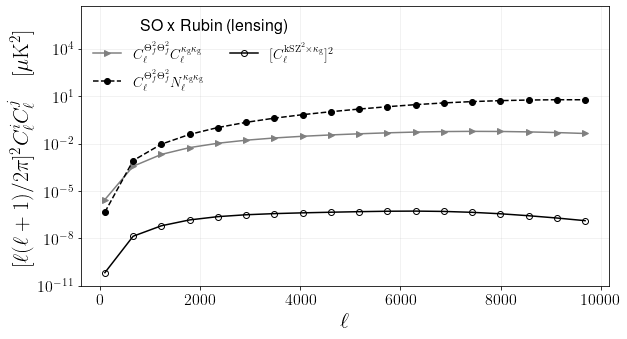

In [7]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kg()

arcmin_to_radians = np.pi/(60.*180.)
nl_kg = 0.3/(40./arcmin_to_radians/arcmin_to_radians)

fac_dl = (2.726e6)**2*np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi

den =  1.#(2.*np.asarray(M.cl_t2t2f()['ell'])+1.)*np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))**2.

ya = fac_dl**2.*np.asarray(M.cl_t2t2f()['t2t2f'])*(np.asarray(M.cl_kg_kg()['1h'])+np.asarray(M.cl_kg_kg()['2h']))/(np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi)
plt.plot(M.cl_t2t2f()['ell'],ya/den,marker='>',c='grey',
         label=r'$C_\ell^{\Theta_f^2\Theta_f^2}C_\ell^{\kappa_\mathrm{g}\kappa_\mathrm{g}}$')

ya = fac_dl**2.*np.asarray(M.cl_t2t2f()['t2t2f'])*nl_kg
plt.plot(M.cl_t2t2f()['ell'],ya/den,
         marker='o',
         label=r'$C_\ell^{\Theta_f^2\Theta_f^2}N_\ell^{\kappa_\mathrm{g}\kappa_\mathrm{g}}$',
         ls='--',
        c='k')

ya = fac_dl**2.*np.asarray(np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h']))**2.
plt.plot(M.cl_t2t2f()['ell'],ya/den,
         label=r'$[C_\ell^{\mathrm{kSZ}^2\times\kappa_\mathrm{g}}]^2$',
         marker='o',
         markerfacecolor='None',
         c='k'
        )

# plt.yscale('log')
# plt.legend()
# plt.xlabel('multipole l')
# plt.ylabel('Normalized cov')

ax.set_yscale('log')

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$[\ell(\ell+1)/2\pi]^2C_\ell^i C_\ell^j\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.grid(which='both',alpha=0.2)

ax.legend(title='SO x Rubin (lensing)',
          loc=2,
          ncol=2,
          frameon=False,
          fontsize=14)
ax.set_ylim(1e-11,5e6)

fig.tight_layout()
plt.savefig('so_lsstlens_covmat_terms.pdf')

# Covmat CMB lensing - SO

In [8]:

param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_blue_hod_params)

M.set({
# precision params:
    
'ndim_masses' : 50,
'ndim_redshifts' : 50,

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.001,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.005,
# 'N_samp_fftw' : 250,
'nfw_profile_epsabs' : 1e-33,
'nfw_profile_epsrel' : 0.1,
    
    
'k_min_for_pk_class_sz' : 0.01,
# 'k_max_for_pk_class_sz' : 6.0,
'k_per_decade_class_sz' : 15,
# 'P_k_max_h/Mpc' : 10.0,
    

'N_kSZ2_gal_multipole_grid' :  30,
'N_kSZ2_gal_theta_grid' :  30,
'ell_min_kSZ2_gal_multipole_grid' : 2.,
'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

'n_z_psi_b1g' : 20,
'n_l_psi_b1g' : 20,

'n_z_psi_b2g' : 20,
'n_l_psi_b2g' : 20,

'n_z_psi_b2t' : 20,
'n_l_psi_b2t' : 20,

'n_z_psi_b1t' : 20,
'n_l_psi_b1t' : 20,

'n_z_psi_b1gt' : 20,
'n_l_psi_b1gt' : 20,
})


M.set(
    {
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',

        
# 'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
# 'shape_noise_siggamma2': 0.3,
# 'ns_gal_per_arcmin2': 8,

        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',
'cmb_lensing_noise_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_lensing_noise.dat',
        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 10000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

for ip in range(len(param_list)):
    M.set({param_list[ip]:param_fiducial_values[ip]
          })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 35.3967 seconds


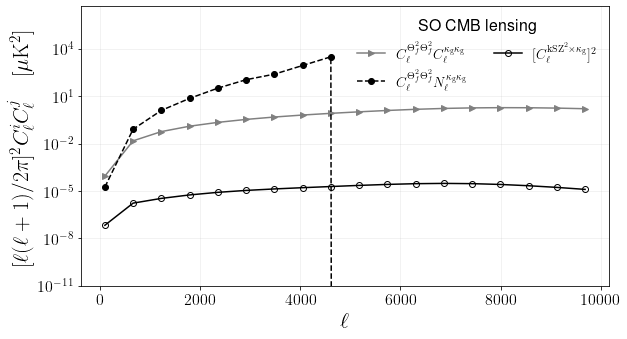

In [10]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(9,5),sharey=True)

ax=ax1

cl_kSZ_kSZ_g = M.cl_kSZ_kSZ_kcmb()

arcmin_to_radians = np.pi/(60.*180.)
nl_kg = np.vectorize(M.get_lensing_noise_at_ell)

fac_dl = (2.726e6)**2*np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi

den =  1.#(2.*np.asarray(M.cl_t2t2f()['ell'])+1.)*np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))**2.

ya = fac_dl**2.*np.asarray(M.cl_t2t2f()['t2t2f'])*(np.asarray(M.cl_kk()['1h'])+np.asarray(M.cl_kk()['2h']))/(np.asarray(M.cl_t2t2f()['ell'])*(np.asarray(M.cl_t2t2f()['ell'])+1.)/2./np.pi)
plt.plot(M.cl_t2t2f()['ell'],ya/den,marker='>',c='grey',
         label=r'$C_\ell^{\Theta_f^2\Theta_f^2}C_\ell^{\kappa_\mathrm{g}\kappa_\mathrm{g}}$')

ya = fac_dl**2.*np.asarray(M.cl_t2t2f()['t2t2f'])*nl_kg(np.asarray(M.cl_t2t2f()['ell']))
plt.plot(M.cl_t2t2f()['ell'],ya/den,
         marker='o',
         label=r'$C_\ell^{\Theta_f^2\Theta_f^2}N_\ell^{\kappa_\mathrm{g}\kappa_\mathrm{g}}$',
         ls='--',
        c='k')

ya = fac_dl**2.*np.asarray(np.asarray(cl_kSZ_kSZ_g['1h'])+np.asarray(cl_kSZ_kSZ_g['2h'])+np.asarray(cl_kSZ_kSZ_g['3h']))**2.
plt.plot(M.cl_t2t2f()['ell'],ya/den,
         label=r'$[C_\ell^{\mathrm{kSZ}^2\times\kappa_\mathrm{g}}]^2$',
         marker='o',
         markerfacecolor='None',
         c='k'
        )

# plt.yscale('log')
# plt.legend()
# plt.xlabel('multipole l')
# plt.ylabel('Normalized cov')

ax.set_yscale('log')

ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$[\ell(\ell+1)/2\pi]^2C_\ell^i C_\ell^j\quad [\mathrm{\mu K^2}]$',size=title_size)

ax.grid(which='both',alpha=0.2)

ax.legend(title='SO CMB lensing',
          loc=1,
          ncol=2,
          frameon=False,
          fontsize=14)
ax.set_ylim(1e-11,5e6)

fig.tight_layout()
plt.savefig('so_lensing_covmat_terms.pdf')

In [208]:

param_list = ['f_b_gas',
              'A_alpha',
              'A_beta'
             ]


param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83  # A_beta
                        ]






print(param_list)
print(' ')
fisher = np.load('test_fisher_s4_des.npy')
print('test_fisher_s4_des.npy')
inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 




print(param_list)
print(' ')
fisher = np.load('test_fisher_s4_des_fb_prior.npy')
print('test_fisher_s4_des.npy')
inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 




print(param_list)
print(' ')
fisher = np.load('test_fisher_so_des_fb_with_prior.npy')
print('test_fisher_so_des_fb_with_prior.npy')
inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 


print(' ')
fisher = np.load('test_fisher_so_des_fb_without_prior.npy')
print('test_fisher_so_des_fb_without_prior.npy')
inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 




print(' ')
fisher = np.load('test_fisher_advact_des_fb_without_prior.npy')
print('test_fisher_advact_des_fb_without_prior.npy')
inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 





print(' ')
fisher = np.load('test_fisher_advact_lsst_fb_without_prior.npy')
print('test_fisher_advact_lsst_fb_without_prior.npy')
inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 



print(' ')
fisher = np.load('test_fisher_so_solensing_without_prior_on_fb.npy')
print('test_fisher_so_solensing_without_prior_on_fb.npy')
inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 



print(' ')
fisher = np.load('test_fisher_so_solensing_with_prior_on_fb.npy')
print('test_fisher_so_solensing_with_prior_on_fb.npy')
inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 













['f_b_gas', 'A_alpha', 'A_beta']
 
test_fisher_s4_des.npy
[4.22987952 0.34652919 9.09865768]
['f_b_gas', 'A_alpha', 'A_beta']
 
test_fisher_s4_des.npy
[94.08009906  0.34927147 10.43886828]
['f_b_gas', 'A_alpha', 'A_beta']
 
test_fisher_so_des_fb_with_prior.npy
[93.99058793  0.17061401  3.6744652 ]
 
test_fisher_so_des_fb_without_prior.npy
[1.02832936 0.14805722 2.15925997]
 
test_fisher_advact_des_fb_without_prior.npy
[0.1729379  0.06075226 0.73465786]
 
test_fisher_advact_lsst_fb_without_prior.npy
[0.31672681 0.13150394 1.19710311]
 
test_fisher_so_solensing_without_prior_on_fb.npy
[1.07247432 0.12493033 1.45324708]
 
test_fisher_so_solensing_with_prior_on_fb.npy
[93.99108128  0.17078582  1.45898849]


In [213]:
param_list = ['f_b_gas',
              'A_alpha',
              'A_beta',
              'sigma_log10M_HOD',
              'alpha_s_HOD',
              'M1_prime_HOD',
              'M_min_HOD',
              'x_out_truncated_nfw_profile_satellite_galaxies'
             ]

# prior_list = [np.inf,#0.001596, # f_b_gas: 0.001596
#               np.inf, # A_alpha
#               np.inf, # A_beta
#               0.25, # sigma_log10M_HOD
#               0.10, # alpha_s_HOD
#               5e12,  # Msun/h # M1_prime_HOD
#               1e12,  #  Msun/h M_min
#               0.25 # x_out_truncated_nfw_profile_satellite_galaxies
# ]
# prior_list = np.asarray(prior_list)
# prior_mat = np.diag(prior_list)
# prior_mat

param_fiducial_values = [0.15, # f_b_gas
                         0.88, # A_alpha
                         3.83, # A_beta
                         0.69, # sigma_log10M_HOD
                         1.30, # alpha_s_HOD
                         5.03e12, # Msun/h # M1_prime_HOD
                         6.25e11, # Msun/h M_min
                         1.09, # x_out_truncated_nfw_profile_satellite_galaxies
                        ]


print(param_list)

print(' ')
fisher = np.load('test_fisher_s4_unwise_blue_fb_noprior.npy')
print('test_fisher_s4_unwise_blue_fb_noprior.npy')
inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 


print(' ')
fisher = np.load('test_fisher_s4_unwise_blue_fb_prior.npy')
print('test_fisher_s4_unwise_blue_fb_prior.npy')
inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 




print(' ')
fisher = np.load('test_fisher_so_unwise_blue_fb_noprior.npy')
print('test_fisher_so_unwise_blue_fb_noprior.npy')
inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 


print(' ')
fisher = np.load('test_fisher_so_unwise_blue_fb_prior.npy')
print('test_fisher_so_unwise_blue_fb_prior.npy')
inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 




print(' ')
fisher = np.load('test_fisher_advact_unwise_blue_fb_noprior.npy')
print('test_fisher_advact_unwise_blue_fb_noprior.npy')
inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 


print(' ')
fisher = np.load('test_fisher_advact_unwise_blue_fb_prior.npy')
print('test_fisher_advact_unwise_blue_fb_prior.npy')
inverse_fisher_F = fisher
fisher_sigmas = []
for m in range(len(param_list)):
    fisher_sigmas.append(np.sqrt(inverse_fisher_F[m][m]))
fisher_sigmas = np.asarray(fisher_sigmas)
print((fisher_sigmas/param_fiducial_values)**-1) 









['f_b_gas', 'A_alpha', 'A_beta', 'sigma_log10M_HOD', 'alpha_s_HOD', 'M1_prime_HOD', 'M_min_HOD', 'x_out_truncated_nfw_profile_satellite_galaxies']
 
test_fisher_s4_unwise_blue_fb_noprior.npy
[ 2.00701904  2.9434859   7.05010453  2.87920389 15.48107507  1.78410547
  1.14001549  5.55651414]
 
test_fisher_s4_unwise_blue_fb_prior.npy
[94.00638959  3.35953022 18.89787956  2.88012068 15.50053437  1.90971326
  1.27932548  5.57454532]
 
test_fisher_so_unwise_blue_fb_noprior.npy
[ 0.88732545  1.52473587  2.75521785  2.99727089 14.30838752  1.35677066
  0.98587917  6.35759674]
 
test_fisher_so_unwise_blue_fb_prior.npy
[93.989151    2.91025583 15.69656011  2.99794782 14.48314302  1.38315134
  0.99086742  6.45607584]
 
test_fisher_advact_unwise_blue_fb_noprior.npy
[ 0.75146067  0.29571483  1.95569526  2.76740363 13.17379418  1.04662454
  0.64475698  4.43570726]
 
test_fisher_advact_unwise_blue_fb_prior.npy
[93.98796653  0.35012212  3.0694466   2.77184136 13.22539079  1.06514263
  0.6653865   4.477

# halo model plots

In [3]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',

# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

# 'dlogell' : 0.,
# 'dell': 564.,

'ell_max' : 8000.0,
'ell_min' : 100.0,
        
'dlogell' : 0.1,
'dell': 0.,
        
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', # set Battaglia 16 profile
'gas profile mode' : 'agn',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 132.2643 seconds


In [4]:
cl_kSZ_kSZ_g_agn_planck = M.cl_kSZ_kSZ_g()

In [5]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)


M.set(
    {
'output':'mean_galaxy_bias,gal_lens_1h,gal_lens_2h,gal_gal_1h,gal_gal_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',

# 'galaxy_sample': 'unwise',
# 'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

        
        
# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',

# 'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',



        
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',

        
'pk_nonlinear_for_vrms2' : 1,        

# 'dlogell' : 0.,
# 'dell': 564.,

'ell_max' : 13000.0,
'ell_min' : 100.0,
        
'dlogell' : 0.1,
'dell': 0.,
        
'f_sky':0.3, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', # set Battaglia 16 profile
'gas profile mode' : 'agn',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 124.3437 seconds


In [6]:
cl_kSZ_kSZ_g_agn_advact = M.cl_kSZ_kSZ_g()

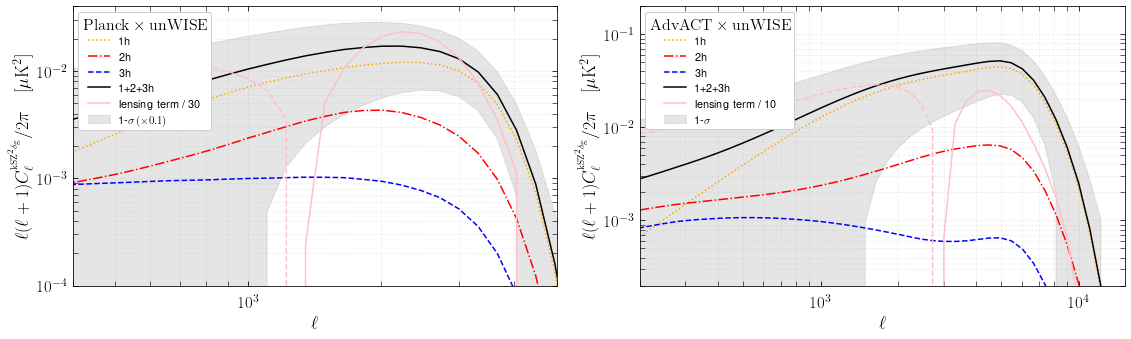

In [21]:

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))





ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')






cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_planck.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='orange',ls=':',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='b',ls='--',marker = 'None')

ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = '1+2+3h',
             c='k',ls='-',marker = 'None')
ax.fill_between(cl_kSZ_kSZ_g['ell'],
                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat']))/10.,
                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat']))/10.,
                color='grey',alpha=0.2,label=r'1-$\sigma \,(\times 0.1)$')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/30.,label = 'lensing term / 30',c='pink',ls='-',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/30.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')




# cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_planck_new_filter.copy()

# fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
# # ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='orange',ls=':',marker = 'None')
# # ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.',marker = 'None')
# # ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='b',ls='--',marker = 'None')

# ax.plot(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = '1+2+3h new filter',
#              c='r',ls='-',marker = 'None')
# ax.fill_between(cl_kSZ_kSZ_g['ell'],
#                 fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat']))/2.,
#                 fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat']))/2.,
#                 color='green',alpha=0.2,label=r'1-$\sigma \,(\times 0.5)$ new filter')

# # # plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
# # ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/30.,label = 'lensing term / 30',c='pink',ls='-',marker = 'None')
# # ax.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/30.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')





# # l_arr = np.asarray(cl_kSZ_kSZ_g['ell'])#np.geomspace(1e2,1e4,100)
# # arcmin_to_radians = np.pi/(60.*180.)
# # DeltaT = 10.*arcmin_to_radians
# # ThetaFWHM = 1.4*arcmin_to_radians
# # Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))
# # plt.loglog(l_arr,Nl)


# Ola_eff = np.loadtxt('/Users/boris/Work/ksz_bispectra/black_unwise_green.txt')
# cell_ola_eff = Ola_eff[1,:]
# ell_ola_eff = Ola_eff[0,:]
# Ola_measurements = np.loadtxt('/Users/boris/Work/ksz_bispectra/pink_unwise_green.txt')
# err_cell_ola_measurements = Ola_measurements[2,:]
# cell_ola_measurements = Ola_measurements[1,:]
# ell_ola_measurements = Ola_measurements[0,:]

# #ax.plot(ell_ola_eff,cell_ola_eff*1.2/5.,label='ola eff')

# ax.fill_between(ell_ola_measurements,
#                 cell_ola_measurements*1.2/5.-err_cell_ola_measurements*1.2/5.,
#                 cell_ola_measurements*1.2/5.+err_cell_ola_measurements*1.2/5.,
#             label='Kusiak, BB, Hill et al 21',
#             color='orange',
#             alpha=0.1)


ax.loglog()
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(fontsize=11,loc=2,title=r'$\mathrm{Planck\times unWISE}$',framealpha=1)
ax.set_ylim(1e-4,4e-2)
ax.set_xlim(400,5e3)
# ax.set_title('Planck')


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')






cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_advact.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='orange',ls=':',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='b',ls='--',marker = 'None')

ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = '1+2+3h',
             c='k',ls='-',marker = 'None')
ax.fill_between(cl_kSZ_kSZ_g['ell'],
                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
                color='grey',alpha=0.2,label=r'1-$\sigma$')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')




# l_arr = np.asarray(cl_kSZ_kSZ_g['ell'])#np.geomspace(1e2,1e4,100)
# arcmin_to_radians = np.pi/(60.*180.)
# DeltaT = 10.*arcmin_to_radians
# ThetaFWHM = 1.4*arcmin_to_radians
# Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))
# plt.loglog(l_arr,Nl)


ax.loglog()
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\delta_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(fontsize=11,title=r'$\mathrm{AdvACT\times unWISE}$',framealpha=1)
ax.set_ylim(2e-4,2e-1)
ax.set_xlim(2e2,1.5e4)
# ax.set_title('advACT')

fig.tight_layout()
plt.savefig('cl_ttg_comparison_lens_cov.pdf')

In [22]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_blue_hod_params)

# M.set({
# # precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
# })


M.set(
    {
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',

        
'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 8,

        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',

'pk_nonlinear_for_vrms2' : 1,        

# 'dlogell' : 0.,
# 'dell': 564.,
# 'ell_max' : 8000.0,
# 'ell_min' : 100.0,
'f_sky':0.3, 

        
'ell_max' : 13000.0,
'ell_min' : 100.0,
        
'dlogell' : 0.1,
'dell': 0.,        

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'agn',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

# for ip in range(len(param_list)):
#     M.set({param_list[ip]:param_fiducial_values[ip]
#           })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 136.5875 seconds


In [23]:
cl_kSZ_kSZ_g_agn_advact = M.cl_kSZ_kSZ_kg()

In [24]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_blue_hod_params)

# M.set({
# # precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
# })


M.set(
    {
'output':'gallens_lens_1h,gallens_lens_2h,gallens_gallens_1h,gallens_gallens_2h,kSZ_kSZ_gallens fft (1h),kSZ_kSZ_gallens fft (2h),kSZ_kSZ_gallens fft (3h),kSZ_kSZ_gallens_covmat,kSZ_kSZ_gallens_lensing_term',

        
'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
'shape_noise_siggamma2': 0.3,
'ns_gal_per_arcmin2': 40.,

        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',

'pk_nonlinear_for_vrms2' : 1,        

# 'dlogell' : 0.,
# 'dell': 564.,
# 'ell_max' : 8000.0,
# 'ell_min' : 100.0,
'f_sky':0.4, 

        
'ell_max' : 13000.0,
'ell_min' : 100.0,
        
'dlogell' : 0.1,
'dell': 0.,        

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'agn',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

# for ip in range(len(param_list)):
#     M.set({param_list[ip]:param_fiducial_values[ip]
#           })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 131.0551 seconds


In [25]:
cl_kSZ_kSZ_g_agn_so_rubin = M.cl_kSZ_kSZ_kg()

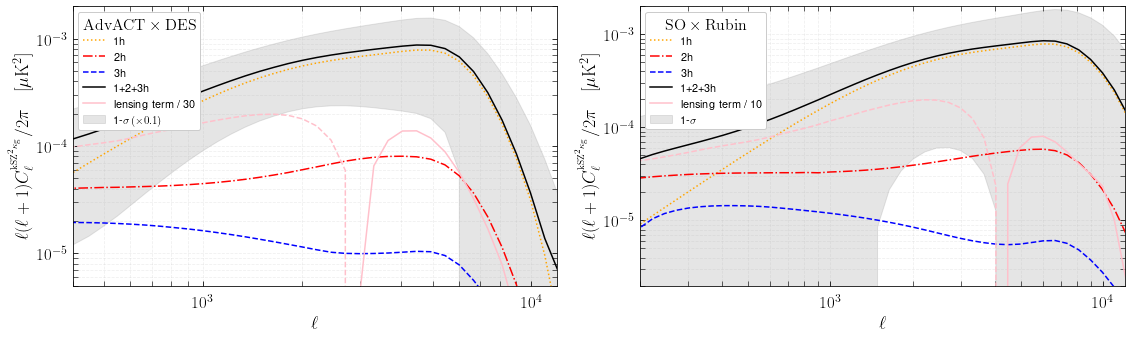

In [34]:

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))





ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')






cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_advact.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='orange',ls=':',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='b',ls='--',marker = 'None')

ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = '1+2+3h',
             c='k',ls='-',marker = 'None')
ax.fill_between(cl_kSZ_kSZ_g['ell'],
                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat']))/10.,
                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat']))/10.,
                color='grey',alpha=0.2,label=r'1-$\sigma \,(\times 0.1)$')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/30.,label = 'lensing term / 30',c='pink',ls='-',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/30.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')




# cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_planck_new_filter.copy()

# fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
# # ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='orange',ls=':',marker = 'None')
# # ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.',marker = 'None')
# # ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='b',ls='--',marker = 'None')

# ax.plot(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = '1+2+3h new filter',
#              c='r',ls='-',marker = 'None')
# ax.fill_between(cl_kSZ_kSZ_g['ell'],
#                 fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat']))/2.,
#                 fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat']))/2.,
#                 color='green',alpha=0.2,label=r'1-$\sigma \,(\times 0.5)$ new filter')

# # # plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
# # ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/30.,label = 'lensing term / 30',c='pink',ls='-',marker = 'None')
# # ax.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/30.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')





# # l_arr = np.asarray(cl_kSZ_kSZ_g['ell'])#np.geomspace(1e2,1e4,100)
# # arcmin_to_radians = np.pi/(60.*180.)
# # DeltaT = 10.*arcmin_to_radians
# # ThetaFWHM = 1.4*arcmin_to_radians
# # Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))
# # plt.loglog(l_arr,Nl)


# Ola_eff = np.loadtxt('/Users/boris/Work/ksz_bispectra/black_unwise_green.txt')
# cell_ola_eff = Ola_eff[1,:]
# ell_ola_eff = Ola_eff[0,:]
# Ola_measurements = np.loadtxt('/Users/boris/Work/ksz_bispectra/pink_unwise_green.txt')
# err_cell_ola_measurements = Ola_measurements[2,:]
# cell_ola_measurements = Ola_measurements[1,:]
# ell_ola_measurements = Ola_measurements[0,:]

# #ax.plot(ell_ola_eff,cell_ola_eff*1.2/5.,label='ola eff')

# ax.fill_between(ell_ola_measurements,
#                 cell_ola_measurements*1.2/5.-err_cell_ola_measurements*1.2/5.,
#                 cell_ola_measurements*1.2/5.+err_cell_ola_measurements*1.2/5.,
#             label='Kusiak, BB, Hill et al 21',
#             color='orange',
#             alpha=0.1)


ax.loglog()
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(fontsize=11,loc=2,title=r'$\mathrm{AdvACT\times DES}$',framealpha=1)
ax.set_ylim(5e-6,2e-3)
ax.set_xlim(400,1.2e4)
# ax.set_title('Planck')


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')






cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_so_rubin.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='orange',ls=':',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='b',ls='--',marker = 'None')

ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = '1+2+3h',
             c='k',ls='-',marker = 'None')
ax.fill_between(cl_kSZ_kSZ_g['ell'],
                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
                color='grey',alpha=0.2,label=r'1-$\sigma$')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')




# l_arr = np.asarray(cl_kSZ_kSZ_g['ell'])#np.geomspace(1e2,1e4,100)
# arcmin_to_radians = np.pi/(60.*180.)
# DeltaT = 10.*arcmin_to_radians
# ThetaFWHM = 1.4*arcmin_to_radians
# Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))
# plt.loglog(l_arr,Nl)


ax.loglog()
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{g}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(fontsize=11,title=r'$\mathrm{SO\times Rubin}$',framealpha=1)
ax.set_ylim(2e-6,2e-3)
ax.set_xlim(2e2,1.2e4)
# ax.set_title('advACT')

fig.tight_layout()
plt.savefig('cl_ttkg_comparison_lens_cov.pdf')

In [35]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_blue_hod_params)

# M.set({
# # precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
# })


M.set(
    {
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',

        
# 'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
# 'shape_noise_siggamma2': 0.3,
# 'ns_gal_per_arcmin2': 8,

        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/so_goal_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_goal_nl.txt',
'cmb_lensing_noise_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/so_lensing_noise.dat',
        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

# for ip in range(len(param_list)):
#     M.set({param_list[ip]:param_fiducial_values[ip]
#           })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 35.1603 seconds


In [36]:
cl_kSZ_kSZ_g_so_so_lensing = M.cl_kSZ_kSZ_kcmb()

In [37]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_blue_hod_params)

# M.set({
# # precision params:
    
# 'ndim_masses' : 50,
# 'ndim_redshifts' : 50,

# 'redshift_epsabs': 1.0e-40,
# 'redshift_epsrel': 0.001,
# 'mass_epsabs': 1.0e-40,
# 'mass_epsrel': 0.005,
# # 'N_samp_fftw' : 250,
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.1,
    
    
# 'k_min_for_pk_class_sz' : 0.01,
# # 'k_max_for_pk_class_sz' : 6.0,
# 'k_per_decade_class_sz' : 15,
# # 'P_k_max_h/Mpc' : 10.0,
    

# 'N_kSZ2_gal_multipole_grid' :  30,
# 'N_kSZ2_gal_theta_grid' :  30,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
    

# 'n_z_psi_b1g' : 20,
# 'n_l_psi_b1g' : 20,

# 'n_z_psi_b2g' : 20,
# 'n_l_psi_b2g' : 20,

# 'n_z_psi_b2t' : 20,
# 'n_l_psi_b2t' : 20,

# 'n_z_psi_b1t' : 20,
# 'n_l_psi_b1t' : 20,

# 'n_z_psi_b1gt' : 20,
# 'n_l_psi_b1gt' : 20,
# })


M.set(
    {
'output':'lens_lens_1h,lens_lens_2h,kSZ_kSZ_lens fft (1h),kSZ_kSZ_lens fft (2h),kSZ_kSZ_lens fft (3h),kSZ_kSZ_lens_covmat,kSZ_kSZ_lens_lensing_term',

        
# 'full_path_to_source_dndz_gal' : '/Users/boris/Work/DES/nz_redmagic_source_z_bin3.txt', # source galaxies
# 'shape_noise_siggamma2': 0.3,
# 'ns_gal_per_arcmin2': 8,

        
'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/s4_filter_functions_l_fl_230222.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_nl.txt',
'cmb_lensing_noise_file':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/s4_lensing_noise.dat',
        
'pk_nonlinear_for_vrms2' : 1,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 5000.0,
'ell_min' : 100.0,
'f_sky':0.4, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 2.4e-08, # green: 1.5e-07 # blue: 2.4e-08,

'gas profile' : 'B16', 
'gas profile mode' : 'custom',
        
'normalize_gas_density_profile': 1,        

'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 0,
'use_fdndz_for_ksz2g_eff':0,
      })

# for ip in range(len(param_list)):
#     M.set({param_list[ip]:param_fiducial_values[ip]
#           })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 34.1808 seconds


In [38]:
cl_kSZ_kSZ_g_s4_s4_lensing = M.cl_kSZ_kSZ_kcmb()

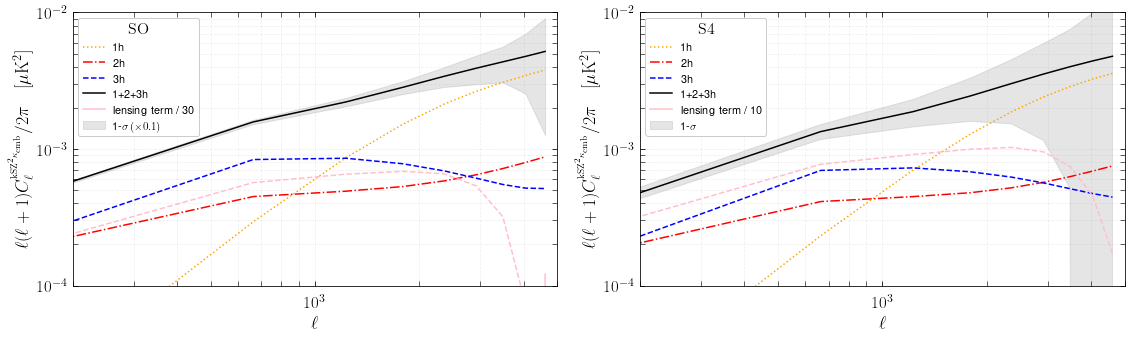

In [42]:

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))





ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')






cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_so_so_lensing.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='orange',ls=':',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='b',ls='--',marker = 'None')

ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = '1+2+3h',
             c='k',ls='-',marker = 'None')
ax.fill_between(cl_kSZ_kSZ_g['ell'],
                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat']))/10.,
                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat']))/10.,
                color='grey',alpha=0.2,label=r'1-$\sigma \,(\times 0.1)$')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/30.,label = 'lensing term / 30',c='pink',ls='-',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/30.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')




# cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_planck_new_filter.copy()

# fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
# # ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='orange',ls=':',marker = 'None')
# # ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.',marker = 'None')
# # ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='b',ls='--',marker = 'None')

# ax.plot(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = '1+2+3h new filter',
#              c='r',ls='-',marker = 'None')
# ax.fill_between(cl_kSZ_kSZ_g['ell'],
#                 fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat']))/2.,
#                 fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat']))/2.,
#                 color='green',alpha=0.2,label=r'1-$\sigma \,(\times 0.5)$ new filter')

# # # plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
# # ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/30.,label = 'lensing term / 30',c='pink',ls='-',marker = 'None')
# # ax.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/30.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')





# # l_arr = np.asarray(cl_kSZ_kSZ_g['ell'])#np.geomspace(1e2,1e4,100)
# # arcmin_to_radians = np.pi/(60.*180.)
# # DeltaT = 10.*arcmin_to_radians
# # ThetaFWHM = 1.4*arcmin_to_radians
# # Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))
# # plt.loglog(l_arr,Nl)


# Ola_eff = np.loadtxt('/Users/boris/Work/ksz_bispectra/black_unwise_green.txt')
# cell_ola_eff = Ola_eff[1,:]
# ell_ola_eff = Ola_eff[0,:]
# Ola_measurements = np.loadtxt('/Users/boris/Work/ksz_bispectra/pink_unwise_green.txt')
# err_cell_ola_measurements = Ola_measurements[2,:]
# cell_ola_measurements = Ola_measurements[1,:]
# ell_ola_measurements = Ola_measurements[0,:]

# #ax.plot(ell_ola_eff,cell_ola_eff*1.2/5.,label='ola eff')

# ax.fill_between(ell_ola_measurements,
#                 cell_ola_measurements*1.2/5.-err_cell_ola_measurements*1.2/5.,
#                 cell_ola_measurements*1.2/5.+err_cell_ola_measurements*1.2/5.,
#             label='Kusiak, BB, Hill et al 21',
#             color='orange',
#             alpha=0.1)


ax.loglog()
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
# ax.legend(fontsize=11,loc=2)
ax.legend(fontsize=11,loc=2,title=r'$\mathrm{SO}$',framealpha=1)
ax.set_ylim(1e-4,1e-2)
ax.set_xlim(2e2,5e3)
# ax.set_title('Planck')


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')






cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_s4_s4_lensing.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = '1h',c='orange',ls=':',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = '2h',c='r',ls='-.',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = '3h',c='b',ls='--',marker = 'None')

ax.plot(cl_kSZ_kSZ_g['ell'],
         fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
         #yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
         label = '1+2+3h',
             c='k',ls='-',marker = 'None')
ax.fill_between(cl_kSZ_kSZ_g['ell'],
                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])-fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
                fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h'])+fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
                color='grey',alpha=0.2,label=r'1-$\sigma$')

# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),label = 'cl (hf)',c='orange',ls='--',marker = 'o')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'None')
ax.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')




# l_arr = np.asarray(cl_kSZ_kSZ_g['ell'])#np.geomspace(1e2,1e4,100)
# arcmin_to_radians = np.pi/(60.*180.)
# DeltaT = 10.*arcmin_to_radians
# ThetaFWHM = 1.4*arcmin_to_radians
# Nl = DeltaT**2.*np.exp(ThetaFWHM**2.*l_arr*(l_arr+1.)/8./np.log(2.))
# plt.loglog(l_arr,Nl)


ax.loglog()
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2\kappa_\mathrm{cmb}}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(fontsize=11,title=r'$\mathrm{S4}$',framealpha=1)
ax.set_ylim(1e-4,1e-2)
ax.set_xlim(2e2,5e3)
# ax.set_title('advACT')

fig.tight_layout()
plt.savefig('cl_ttkcmb_comparison_lens_cov.pdf')

# kSZ powerr spectrum plot

In [5]:
# ksz_params = {
# #fiducial ksz params
# 'omega_b' : 0.022383,
# 'omega_cdm' : 0.12011,
# 'h' : 0.6732,
# 'tau_reio' : 0.0543,
# 'ln10^{10}A_s' : 3.0448,
# 'n_s' : 0.96605,
# 'k_pivot' : 0.05,
# 'N_ncdm' : 1,
# 'N_ur' : 2.0328,
# 'm_ncdm' : 0.06,
# 'f_free' : 1.0,
# 'pressure profile' : 'B12',
# 'k_min_for_pk_class_sz' : 0.001,
# 'k_max_for_pk_class_sz' : 60.0,
# 'k_per_decade_class_sz' : 50,
# 'P_k_max_h/Mpc' : 100.0,
# 'non linear' : 'halofit',
# 'z_min' : 0.01,
# 'M_min' : 1e10,
# 'm_min_counter_terms' : 1e10,
# 'M_max' : 1e+17,
# 'mass function' : 'T10',
# 'galaxy_sample' : 'unwise',
# 'galaxy_sample_id' : 'green',
# 'concentration parameter' : 'D08',
# 'use_hod' : 'yes',
# 'use_analytical_truncated_nfw' : 'yes',
# 'x_out_truncated_nfw_profile_satellite_galaxies' : 1,
# 'M0 equal M_min (HOD)' : 'no',
# 'gas profile' : 'nfw',
# 'gas profile mode' : 'agn',
# 'sigma_log10M_HOD' : 0.76,
# 'alpha_s_HOD' : 2.08,
# 'M_min_HOD' : 10100000000000.0,
# 'M1_prime_HOD' : 118000000000000.0,
# 'M0_HOD' : 0.0,
# 'x_out_truncated_nfw_profile' : 1.0,
# 'pk_nonlinear_for_vrms2' : 1,
# 'hm_consistency' : 1,
# 'sz_verbose' : 0, # for full output when not using python wrapper set to >100, this doesnt work with python wrapper
# #'root' : 'sz_auxiliary_files/run_scripts/tmp/class-sz_tmp_',
# #'write sz results to files' : 'yes',
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.001,
# 'redshift_epsabs' : 1e-50,
# 'redshift_epsrel' : 0.001,
# 'mass_epsabs' : 1e-30,
# 'mass_epsrel' : 0.01,
# 'dell' : 300,
# 'ell_max' : 5000.0,
# 'ell_min' : 100.0,

# 'non linear' : 'halofit',
# 'nonlinear_verbose' : 0,
# 'ndim_masses' : 80,
# 'ndim_redshifts' : 80,
# #'l_max_scalars' : 5000,
# 'output' : 'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h),kSZ_kSZ_gal_hf',
# # 'output' : 'kSZ_kSZ_gal_1h,kSZ_kSZ_gal_2h,kSZ_kSZ_gal_3h',
# 'z_max' : 4.0,
# #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',

# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',

# 'n_ell_density_profile' : 50,
# 'n_m_density_profile' : 50,
# 'n_z_density_profile' : 50,
# 'k_per_decade_for_pk' : 50,
# 'z_max_pk' : 4.0,
    

# # slow:
# # 'n_z_psi_b1g' : 100,
# # 'n_l_psi_b1g' : 400,

# # 'n_z_psi_b2g' : 100,
# # 'n_l_psi_b2g' : 400,

# # 'n_z_psi_b2t' : 100,
# # 'n_l_psi_b2t' : 400,

# # 'n_z_psi_b1t' : 100,
# # 'n_l_psi_b1t' : 100,

# # 'n_z_psi_b1gt' : 100,
# # 'n_l_psi_b1gt' : 100,
    
    
# # fast:
# 'n_z_psi_b1g' : 50,
# 'n_l_psi_b1g' : 50,

# 'n_z_psi_b2g' : 50,
# 'n_l_psi_b2g' : 50,

# 'n_z_psi_b2t' : 50,
# 'n_l_psi_b2t' : 50,

# 'n_z_psi_b1t' : 50,
# 'n_l_psi_b1t' : 50,

# 'n_z_psi_b1gt' : 50,
# 'n_l_psi_b1gt' : 50,

# 'N_samp_fftw' : 800, # fast: 800 ;  slow: 2000
# 'l_min_samp_fftw' : 1e-9,
# 'l_max_samp_fftw' : 1e9,
    
# 'N_kSZ2_gal_multipole_grid' :  70,
# 'N_kSZ2_gal_theta_grid' :  70,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
# }

In [35]:
xout_rhoe = 50. # has to be >5 ?
# ksz power spectrum is the simple formula 1 of https://arxiv.org/pdf/1607.01769.pdf
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
    'mass function' : 'T08M200c',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
    
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-2,
       'z_max': 4.,
       'M_min':1e9, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'muK2',
       'Frequency for y-distortion in GHz': 150.,
'gas profile':'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 0,
    
        'dell':0.,
        'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'x_out_truncated_density_profile (electrons)': 5., 

    
'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_b16 = M.cl_ksz()

In [4]:
m_ar = np.geomspace(1e10,1e15,100)
get_normalization_gas_density_profile_50 = np.vectorize(M.get_normalization_gas_density_profile)

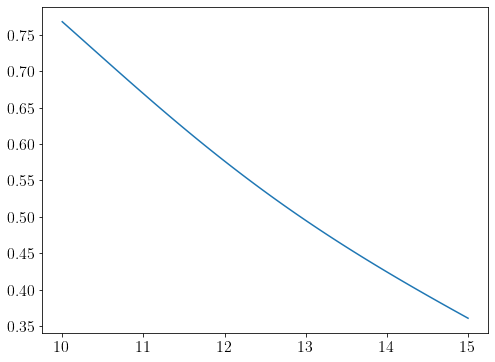

In [6]:
plt.plot(np.log10(m_ar),get_normalization_gas_density_profile_50(0.1,m_ar))

In [7]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
    'mass function' : 'T08M200c',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
    
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-2,
       'z_max': 4.,
       'M_min':1e9, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'muK2',
       'Frequency for y-distortion in GHz': 150.,
'gas profile':'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 1,
    
        'dell':0.,
        'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'x_out_truncated_density_profile (electrons)': xout_rhoe, 
    
'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_b16_with_cd = M.cl_ksz()

In [8]:
get_normalization_gas_density_profile_50_with_cd = np.vectorize(M.get_normalization_gas_density_profile)

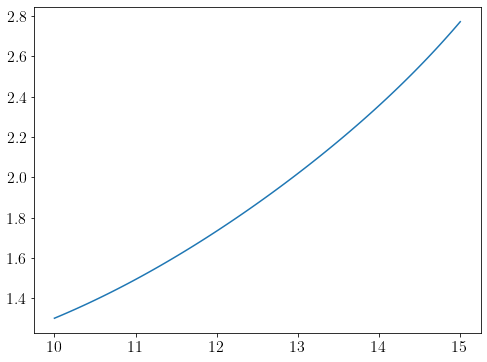

In [10]:
# the factor i need to multiply the density profile to get fb at the end.
plt.plot(np.log10(m_ar),1./get_normalization_gas_density_profile_50_with_cd(0.1,m_ar))

In [11]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
    'mass function' : 'T08M200c',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
    
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-2,
       'z_max': 4.,
       'M_min':1e9, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'muK2',
       'Frequency for y-distortion in GHz': 150.,
'gas profile':'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 1,
    
        'dell':0.,
        'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'x_out_truncated_density_profile (electrons)': 20., 
    
'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_b16_with_cd_xout_20 = M.cl_ksz()

In [12]:
get_normalization_gas_density_profile_20_with_cd = np.vectorize(M.get_normalization_gas_density_profile)

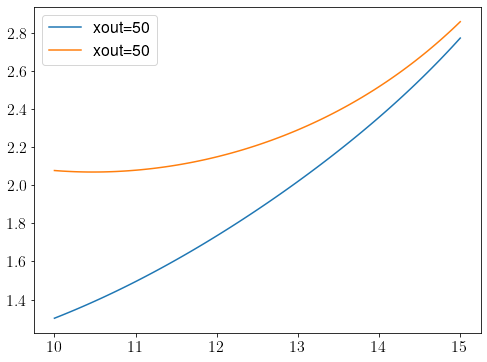

In [16]:
# the factor i need to multiply the density profile to get fb at the end.
plt.plot(np.log10(m_ar),1./get_normalization_gas_density_profile_50_with_cd(0.1,m_ar),label='xout=50')
plt.plot(np.log10(m_ar),1./get_normalization_gas_density_profile_20_with_cd(0.1,m_ar),label='xout=50')
plt.legend()

In [17]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
    'mass function' : 'T08M200c',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
    
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-2,
       'z_max': 4.,
       'M_min':1e9, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'muK2',
       'Frequency for y-distortion in GHz': 150.,
'gas profile':'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 1,
    
        'dell':0.,
        'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'x_out_truncated_density_profile (electrons)': 10., 
    
'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_b16_with_cd_xout_10 = M.cl_ksz()

In [18]:
get_normalization_gas_density_profile_10_with_cd = np.vectorize(M.get_normalization_gas_density_profile)

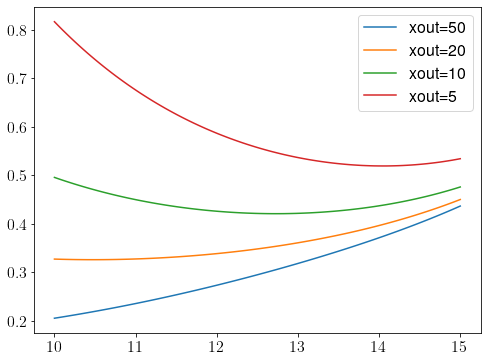

In [34]:
# the factor i need to multiply the density profile to get fb at the end.
plt.plot(np.log10(m_ar),M.get_f_b()/get_normalization_gas_density_profile_50_with_cd(0.1,m_ar),label='xout=50')
plt.plot(np.log10(m_ar),M.get_f_b()/get_normalization_gas_density_profile_20_with_cd(0.1,m_ar),label='xout=20')
plt.plot(np.log10(m_ar),M.get_f_b()/get_normalization_gas_density_profile_10_with_cd(0.1,m_ar),label='xout=10')
plt.plot(np.log10(m_ar),M.get_f_b()/get_normalization_gas_density_profile_5_with_cd(0.1,m_ar),label='xout=5')
plt.legend()

Text(0, 0.5, 'factor')

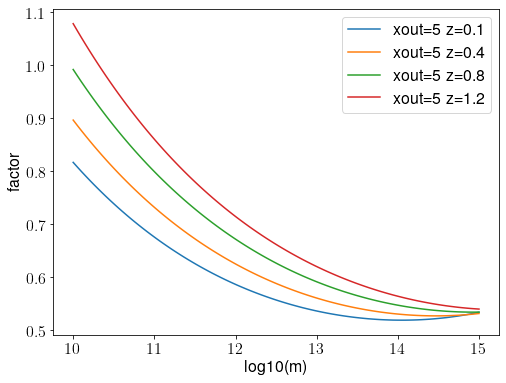

In [48]:
# the factor i need to multiply the density profile to get fb at the end.

plt.plot(np.log10(m_ar),M.get_f_b()/get_normalization_gas_density_profile_5_with_cd(0.1,m_ar),label='xout=5 z=0.1')
plt.plot(np.log10(m_ar),M.get_f_b()/get_normalization_gas_density_profile_5_with_cd(0.4,m_ar),label='xout=5 z=0.4')
plt.plot(np.log10(m_ar),M.get_f_b()/get_normalization_gas_density_profile_5_with_cd(0.8,m_ar),label='xout=5 z=0.8')
plt.plot(np.log10(m_ar),M.get_f_b()/get_normalization_gas_density_profile_5_with_cd(1.2,m_ar),label='xout=5 z=1.2')
plt.legend()
plt.xlabel('log10(m)')
plt.ylabel('factor')

In [12]:
get_normalization_gas_density_profile_20_with_cd = np.vectorize(M.get_normalization_gas_density_profile)

In [85]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
    'mass function' : 'T08M200c',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
    
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-2,
       'z_max': 4.,
       'M_min':1e9, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'muK2',
       'Frequency for y-distortion in GHz': 150.,
'gas profile':'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 1,
    
        'dell':0.,
        'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'x_out_truncated_density_profile (electrons)': 5., 
    
'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_b16_with_cd_xout_5 = M.cl_ksz()

In [26]:
get_normalization_gas_density_profile_5_with_cd = np.vectorize(M.get_normalization_gas_density_profile)

In [29]:
# ksz power spectrum is the simple formula 1 of https://arxiv.org/pdf/1607.01769.pdf
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
    'mass function' : 'T08M200c',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
        'dell':0.,
        'dlogell':0.2,
    
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-2,
       'z_max': 4.,
       'M_min':1e9, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'muK2',
       'Frequency for y-distortion in GHz': 150.,
'gas profile':'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 0,
    


'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,
    
'x_out_truncated_density_profile (electrons)': xout_rhoe, 

'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_nfw = M.cl_ksz()



# ksz power spectrum is the simple formula 1 of https://arxiv.org/pdf/1607.01769.pdf
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
        'modes':'s',
        'lensing': 'yes',
        'l_max_scalars':10000,
    'mass function' : 'T08M200c',
       'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
       'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  
        'dell':0.,
        'dlogell':0.2,
    
       'ell_max' : 10000,
       'ell_min' : 2,
       'z_min': 1e-2,
       'z_max': 4.,
       'M_min':1e9, # all masses in Msun/h
       'M_max':5e15,
       'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
       'units for tSZ spectrum': 'muK2',
       'Frequency for y-distortion in GHz': 150.,
'gas profile':'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 1,
    
    


'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,
    

'x_out_truncated_density_profile (electrons)': 5., 

'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_nfw_with_cd = M.cl_ksz()

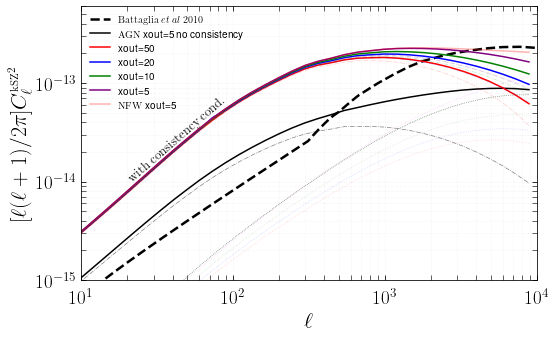

In [36]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax2) = plt.subplots(1,1,figsize=(8,5))

# ax = ax1

ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')

ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell^{_\mathrm{kSZ^2}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)


# ax.plot(M.raw_cl()['ell'],M.raw_cl()['ell']*(M.raw_cl()['ell']+1.)/2./np.pi*M.raw_cl()['tt'],label='unlensed cmb')
# ax.plot(M.lensed_cl()['ell'],M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt'],label='lensed cmb')
l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_bat.dat',unpack=True)
ax.plot(l_bat,dl_bat*(M.T_cmb()*1e6)**-2.,label=r'$\mathrm{Battaglia}$ $et$ $al$ $2010$',ls='--',c='k',lw=2.5)

# ax.plot(l_bat_patchy,dl_bat_patchy*(M.T_cmb()*1e6)**-2.,label=r'$\mathrm{Battaglia}$ $et$ $al$ $2010$',ls='--',c='k',lw=2.5)


# ax.plot(cl_ksz_nfw['ell'],np.asarray(cl_ksz_nfw['1h']),c='k',alpha=0.2,ls=':',lw=0.7)
# ax.plot(cl_ksz_nfw['ell'],np.asarray(cl_ksz_nfw['2h']),c='k',alpha=0.2,ls='-.',lw=0.7)
# ax.plot(cl_ksz_nfw['ell'],np.asarray(cl_ksz_nfw['1h'])+np.asarray(cl_ksz_nfw['2h']),c='k',ls='-',label=r'$\mathrm{NFW}$',alpha=0.3)




ax.plot(cl_ksz_b16['ell'],np.asarray(cl_ksz_b16['1h']),c='k',alpha=0.5,ls=':',lw=0.7)
ax.plot(cl_ksz_b16['ell'],np.asarray(cl_ksz_b16['2h']),c='k',alpha=0.5,ls='-.',lw=0.7)
ax.plot(cl_ksz_b16['ell'],np.asarray(cl_ksz_b16['1h'])+np.asarray(cl_ksz_b16['2h']),c='k',ls='-',label=r'$\mathrm{AGN}$ xout=5 no consistency')





ax.plot(cl_ksz_b16_with_cd['ell'],np.asarray(cl_ksz_b16_with_cd['1h']),c='r',alpha=0.2,ls=':',lw=0.7)
ax.plot(cl_ksz_b16_with_cd['ell'],np.asarray(cl_ksz_b16_with_cd['2h']),c='r',alpha=0.2,ls='-.',lw=0.7)
ax.plot(cl_ksz_b16_with_cd['ell'],np.asarray(cl_ksz_b16_with_cd['1h'])+np.asarray(cl_ksz_b16_with_cd['2h']),c='r',ls='-',label='xout=50')


ax.plot(cl_ksz_b16_with_cd_xout_20['ell'],np.asarray(cl_ksz_b16_with_cd_xout_20['1h']),c='b',alpha=0.2,ls=':',lw=0.7)
ax.plot(cl_ksz_b16_with_cd_xout_20['ell'],np.asarray(cl_ksz_b16_with_cd_xout_20['2h']),c='b',alpha=0.2,ls='-.',lw=0.7)
ax.plot(cl_ksz_b16_with_cd_xout_20['ell'],np.asarray(cl_ksz_b16_with_cd_xout_20['1h'])+np.asarray(cl_ksz_b16_with_cd_xout_20['2h']),c='b',ls='-',label='xout=20')




ax.plot(cl_ksz_b16_with_cd_xout_10['ell'],np.asarray(cl_ksz_b16_with_cd_xout_10['1h']),c='g',alpha=0.2,ls=':',lw=0.7)
ax.plot(cl_ksz_b16_with_cd_xout_10['ell'],np.asarray(cl_ksz_b16_with_cd_xout_10['2h']),c='g',alpha=0.2,ls='-.',lw=0.7)
ax.plot(cl_ksz_b16_with_cd_xout_10['ell'],np.asarray(cl_ksz_b16_with_cd_xout_10['1h'])+np.asarray(cl_ksz_b16_with_cd_xout_10['2h']),c='g',ls='-',label='xout=10')



ax.plot(cl_ksz_b16_with_cd_xout_5['ell'],np.asarray(cl_ksz_b16_with_cd_xout_5['1h']),c='g',alpha=0.2,ls=':',lw=0.7)
ax.plot(cl_ksz_b16_with_cd_xout_5['ell'],np.asarray(cl_ksz_b16_with_cd_xout_5['2h']),c='g',alpha=0.2,ls='-.',lw=0.7)
ax.plot(cl_ksz_b16_with_cd_xout_5['ell'],np.asarray(cl_ksz_b16_with_cd_xout_5['1h'])+np.asarray(cl_ksz_b16_with_cd_xout_5['2h']),c='purple',ls='-',label='xout=5')






ax.plot(cl_ksz_nfw_with_cd['ell'],np.asarray(cl_ksz_nfw_with_cd['1h']),c='magenta',alpha=0.2,ls=':',lw=0.7)
ax.plot(cl_ksz_nfw_with_cd['ell'],np.asarray(cl_ksz_nfw_with_cd['2h']),c='magenta',alpha=0.2,ls='-.',lw=0.7)
ax.plot(cl_ksz_nfw_with_cd['ell'],np.asarray(cl_ksz_nfw_with_cd['1h'])+np.asarray(cl_ksz_nfw_with_cd['2h']),label=r'$\mathrm{NFW}$ xout=5',c='r',ls='-',alpha=0.3)





textstr  = r'$\mathrm{with}$ $\mathrm{consistency}$ $\mathrm{cond.}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.1, 0.68, textstr, transform=ax.transAxes, fontsize=13,rotation=41,
        verticalalignment='top')
        #,bbox=props)
    
    
# textstr  = r'$1$-$\mathrm{halo}$ $\mathrm{terms}$'
# # props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
# props = dict(boxstyle='None', facecolor='None', alpha=1.)
# ax.text(0.235, 0.25, textstr, transform=ax.transAxes, fontsize=11,rotation=46,
#         verticalalignment='top')
#         #,bbox=props)

    
# textstr  = r'$2$-$\mathrm{halo}$ $\mathrm{terms}$'
# # props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
# props = dict(boxstyle='None', facecolor='None', alpha=1.)
# ax.text(0.83, 0.48, textstr, transform=ax.transAxes, fontsize=11,rotation=-35,
#         verticalalignment='top')
#         #,bbox=props)

    
    
# textstr  = r'$\mathrm{AGN}$'
# # props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
# props = dict(boxstyle='None', facecolor='None', alpha=1.)
# ax.text(0.75, 0.74, textstr, transform=ax.transAxes, fontsize=13,rotation=6,
#         verticalalignment='top')
#         #,bbox=props)


# textstr  = r'$\mathrm{NFW}$'
# # props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
# props = dict(boxstyle='None', facecolor='None', alpha=1.)
# ax.text(0.5, 0.743, textstr, transform=ax.transAxes, fontsize=13,rotation=26,
#         verticalalignment='top')
        #,bbox=props)

    
    

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=10,frameon=False)
ax.set_ylim(1e-15,6e-13)
ax.set_xlim(10,1e4)

# l_advact, F_advact = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',unpack=True)
# l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',unpack=True)


# #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',

# # label_size = 17
# # title_size = 22
# # legend_size = 13
# # handle_length = 1.5
# # fig, (ax1) = plt.subplots(1,1,figsize=(8,5))
# ax = ax3
# ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
# ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
# ax.xaxis.set_ticks_position('both')
# ax.yaxis.set_ticks_position('both')
# plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
# plt.setp(ax.get_xticklabels(), fontsize=label_size)
# ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

# # ax.plot(l_planck,F_planck/np.max(F_planck),label=r'$Planck$',c='k',ls='-',alpha=0.6)
# # ax.plot(l_advact,F_advact/np.max(F_advact),label=r'$AdvACT$',c='k',ls='-')

# # ax.legend(loc=1)

# ax.set_ylabel(r'$f(\ell)= b(\ell)\times C_\ell^{_\mathrm{kSZ^2}}/C_\ell^\mathrm{tot}$',size=title_size)
# ax.set_xlabel(r'$\ell$',size=title_size)

# ax.set_xscale('linear')
# ax.set_ylim(0.,0.9)
# ax.set_xlim(0,8.1e3)


# # textstr  = r'$Planck$'
# # # props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
# # props = dict(boxstyle='None', facecolor='None', alpha=1.)
# # ax.text(0.15, 0.8, textstr, transform=ax.transAxes, fontsize=15,rotation=85,
# #         verticalalignment='top')
# #         #,bbox=props)

    
# # textstr  = r'$AdvACT$'
# # # props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
# # props = dict(boxstyle='None', facecolor='None', alpha=1.)
# # ax.text(0.51, 0.8, textstr, transform=ax.transAxes, fontsize=15,rotation=-63,
# #         verticalalignment='top')
#         #,bbox=props)    
    
# plt.plot(new_lar,fl_boris_planck,label=r'$Planck$',ls='--',c='k')


# # l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',unpack=True)
# # ax.plot(l_planck,F_planck,label='ola planck',ls='--',c='b')
# ax.plot(new_lar,fl_boris_advact,label=r'$AdvACT$',c='k',ls='-')
# ax.plot(new_lar,fl_boris_so_goal,label=r'$SO$',c='k',ls='-.')
# ax.plot(new_lar,fl_boris_s4,label=r'$S4$',c='k',ls=':')    
    
ax.legend(frameon=False,fontsize=10,loc=2)
# plt.title('no consistency condition')
fig.tight_layout()
# plt.savefig('cls_ksz_figure_kszonly_xoutrhoe_5.pdf')

In [3]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
'modes':'s',
'lensing': 'yes',
'l_max_scalars':10000,
'mass function' : 'T08M200c',
'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  

'ell_max' : 10000,
'ell_min' : 2,
'z_min': 1e-2,
'z_max': 4.,
'M_min':1e10, # all masses in Msun/h
'M_max':5e15,
'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
'units for tSZ spectrum': 'muK2',
'Frequency for y-distortion in GHz': 150.,
'gas profile':'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 1,
    
'dell':0.,
'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'x_out_truncated_density_profile (electrons)': 1., 
    
'k_min_gas_density_profile':1e-4,
'k_max_gas_density_profile':1e1,
'n_ell_density_profile':50,
'n_m_density_profile': 50, # 80
'n_z_density_profile': 50, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_b16_with_cd_xout_1 = M.cl_ksz()

In [17]:
get_normalization_gas_density_profile_1_with_cd = np.vectorize(M.get_normalization_gas_density_profile)

In [18]:
get_normalization_gas_density_profile_1_with_cd(0.5,1e14)

array(0.11057886)

In [4]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
'modes':'s',
'lensing': 'yes',
'l_max_scalars':10000,
'mass function' : 'T08M200c',
'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  

'ell_max' : 10000,
'ell_min' : 2,
'z_min': 1e-2,
'z_max': 4.,
'M_min':1e10, # all masses in Msun/h
'M_max':5e15,
'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
'units for tSZ spectrum': 'muK2',
'Frequency for y-distortion in GHz': 150.,
'gas profile':'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 0,
'delta for electron density': '200c',
'hm_consistency' : 1,
    
'dell':0.,
'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'x_out_truncated_density_profile (electrons)': 1., 
    
'k_min_gas_density_profile':1e-4,
'k_max_gas_density_profile':1e1,
'n_ell_density_profile':50,
'n_m_density_profile': 50, # 80
'n_z_density_profile': 50, # 80
'mass_epsrel' : 1e-5,
    
'use_xout_in_density_profile_from_enclosed_mass': 1,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_b16_with_cd_xout_from_mnfw = M.cl_ksz()

In [14]:
get_normalization_gas_density_profile_1_with_cd = np.vectorize(M.get_normalization_gas_density_profile)

In [15]:
get_normalization_gas_density_profile_1_with_cd(0.5,1e14)

array(0.28464984)

In [5]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h',
'modes':'s',
'lensing': 'yes',
'l_max_scalars':10000,
'mass function' : 'T08M200c',
'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  

'ell_max' : 10000,
'ell_min' : 2,
'z_min': 1e-2,
'z_max': 4.,
'M_min':1e10, # all masses in Msun/h
'M_max':5e15,
'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
'units for tSZ spectrum': 'muK2',
'Frequency for y-distortion in GHz': 150.,
'gas profile':'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 1,
    
'dell':0.,
'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'x_out_truncated_density_profile (electrons)': 1., 
    
'k_min_gas_density_profile':1e-4,
'k_max_gas_density_profile':1e1,
'n_ell_density_profile':50,
'n_m_density_profile': 50, # 80
'n_z_density_profile': 50, # 80
'mass_epsrel' : 1e-5,
# 'perturb_sampling_stepsize' : 0.005,
# 'k_max_tau0_over_l_max':5.,
# 'neglect_CMB sources_below_visibility' : 1e-30,
# 'transfer_neglect_late_source': 3000.,
# 'halofit_k_per_decade': 3000.,
# 'accurate_lensing': 1,
# 'k_min_tau0': 0.002,
# 'k_step_sub':0.015,
# 'k_step_super':0.0001,
# 'k_step_super_reduction': .1,
# 'l_max_scalars':20000.,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_nfw_with_cd_xout_1 = M.cl_ksz()

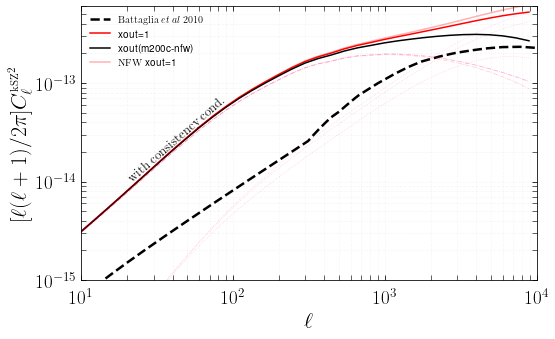

In [8]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax2) = plt.subplots(1,1,figsize=(8,5))

# ax = ax1

ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')

ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell^{_\mathrm{kSZ^2}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)


# ax.plot(M.raw_cl()['ell'],M.raw_cl()['ell']*(M.raw_cl()['ell']+1.)/2./np.pi*M.raw_cl()['tt'],label='unlensed cmb')
# ax.plot(M.lensed_cl()['ell'],M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt'],label='lensed cmb')
l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_bat.dat',unpack=True)
ax.plot(l_bat,dl_bat*(M.T_cmb()*1e6)**-2.,label=r'$\mathrm{Battaglia}$ $et$ $al$ $2010$',ls='--',c='k',lw=2.5)

# ax.plot(l_bat_patchy,dl_bat_patchy*(M.T_cmb()*1e6)**-2.,label=r'$\mathrm{Battaglia}$ $et$ $al$ $2010$',ls='--',c='k',lw=2.5)


# ax.plot(cl_ksz_nfw['ell'],np.asarray(cl_ksz_nfw['1h']),c='k',alpha=0.2,ls=':',lw=0.7)
# ax.plot(cl_ksz_nfw['ell'],np.asarray(cl_ksz_nfw['2h']),c='k',alpha=0.2,ls='-.',lw=0.7)
# ax.plot(cl_ksz_nfw['ell'],np.asarray(cl_ksz_nfw['1h'])+np.asarray(cl_ksz_nfw['2h']),c='k',ls='-',label=r'$\mathrm{NFW}$',alpha=0.3)




ax.plot(cl_ksz_b16_with_cd_xout_1['ell'],np.asarray(cl_ksz_b16_with_cd_xout_1['1h']),c='r',alpha=0.2,ls=':',lw=0.7)
ax.plot(cl_ksz_b16_with_cd_xout_1['ell'],np.asarray(cl_ksz_b16_with_cd_xout_1['2h']),c='r',alpha=0.2,ls='-.',lw=0.7)
ax.plot(cl_ksz_b16_with_cd_xout_1['ell'],np.asarray(cl_ksz_b16_with_cd_xout_1['1h'])+np.asarray(cl_ksz_b16_with_cd_xout_1['2h']),
        c='r',ls='-',label='xout=1')


ax.plot(cl_ksz_b16_with_cd_xout_from_mnfw['ell'],np.asarray(cl_ksz_b16_with_cd_xout_from_mnfw['1h']),c='r',alpha=0.2,ls=':',lw=0.7)
ax.plot(cl_ksz_b16_with_cd_xout_from_mnfw['ell'],np.asarray(cl_ksz_b16_with_cd_xout_from_mnfw['2h']),c='r',alpha=0.2,ls='-.',lw=0.7)
ax.plot(cl_ksz_b16_with_cd_xout_from_mnfw['ell'],np.asarray(cl_ksz_b16_with_cd_xout_from_mnfw['1h'])+np.asarray(cl_ksz_b16_with_cd_xout_from_mnfw['2h']),
        c='k',ls='-',label='xout(m200c-nfw)')






ax.plot(cl_ksz_nfw_with_cd_xout_1['ell'],np.asarray(cl_ksz_nfw_with_cd_xout_1['1h']),c='magenta',alpha=0.2,ls=':',lw=0.7)
ax.plot(cl_ksz_nfw_with_cd_xout_1['ell'],np.asarray(cl_ksz_nfw_with_cd_xout_1['2h']),c='magenta',alpha=0.2,ls='-.',lw=0.7)
ax.plot(cl_ksz_nfw_with_cd_xout_1['ell'],np.asarray(cl_ksz_nfw_with_cd_xout_1['1h'])+np.asarray(cl_ksz_nfw_with_cd_xout_1['2h']),
        label=r'$\mathrm{NFW}$ xout=1',c='r',ls='-',alpha=0.3)



textstr  = r'$\mathrm{with}$ $\mathrm{consistency}$ $\mathrm{cond.}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.1, 0.68, textstr, transform=ax.transAxes, fontsize=13,rotation=41,
        verticalalignment='top')

    

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=10,frameon=False)
ax.set_ylim(1e-15,6e-13)
ax.set_xlim(10,1e4)


    
ax.legend(frameon=False,fontsize=10,loc=2)

fig.tight_layout()
plt.savefig('cls_with_correct_norm.pdf')


In [21]:
M.get_r_delta_of_m_delta_at_z(200.,2e13,0.55)

0.35977764435133414

In [24]:
M.get_dA(0.5)*(1.+0.5)/2.

658.4783835776864

In [20]:
M.get_f_b()

0.15745030410017352

Text(0, 0.5, 'factor')

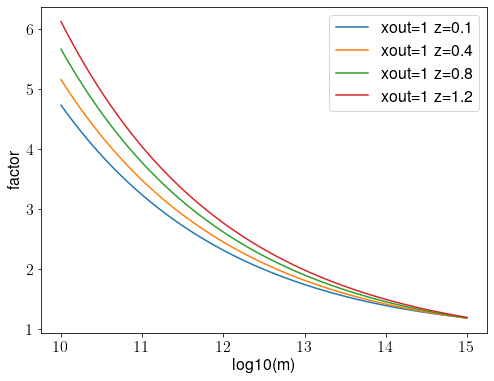

In [9]:
# the factor i need to multiply the density profile to get fb at the end.
m_ar = np.geomspace(1e10,1e15,100)
plt.plot(np.log10(m_ar),M.get_f_b()/get_normalization_gas_density_profile_1_with_cd(0.1,m_ar),label='xout=1 z=0.1')
plt.plot(np.log10(m_ar),M.get_f_b()/get_normalization_gas_density_profile_1_with_cd(0.4,m_ar),label='xout=1 z=0.4')
plt.plot(np.log10(m_ar),M.get_f_b()/get_normalization_gas_density_profile_1_with_cd(0.8,m_ar),label='xout=1 z=0.8')
plt.plot(np.log10(m_ar),M.get_f_b()/get_normalization_gas_density_profile_1_with_cd(1.2,m_ar),label='xout=1 z=1.2')
plt.legend()
plt.xlabel('log10(m)')
plt.ylabel('factor')

# Creating a new halo-model based filter for AdvACT

[]

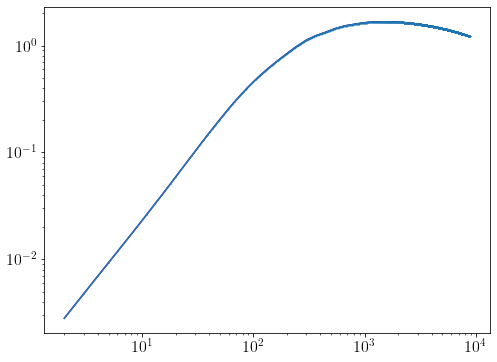

In [62]:
# save a halo-model based ksz-template:

plt.plot(cl_ksz_b16_with_cd_xout_5['ell'],(np.asarray(cl_ksz_b16_with_cd_xout_5['1h'])+np.asarray(cl_ksz_b16_with_cd_xout_5['2h']))*(M.T_cmb()*1e6)**2.,c='purple',ls='-',label='xout=5')


dl_ksz_hm = (np.asarray(cl_ksz_b16_with_cd_xout_5['1h'])+np.asarray(cl_ksz_b16_with_cd_xout_5['2h']))*(M.T_cmb()*1e6)**2.
l_ksz_hm  = cl_ksz_b16_with_cd_xout_5['ell']

import scipy 
dl_ksz_hm_interp = scipy.interpolate.interp1d(l_ksz_hm,dl_ksz_hm)
newl = np.arange(2,8800)


plt.plot(newl,dl_ksz_hm_interp(newl),marker='o',markersize=0.2)
plt.loglog()

In [64]:
# we want to save dl's in dimensionless muk2
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_hm.dat',np.c_[newl,dl_ksz_hm_interp(newl)])
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_patchy_0_hm.dat',np.c_[newl,0.*dl_ksz_hm_interp(newl)])

In [210]:
import scipy
l_max_advact = 8000
ThetaFWHM = 1.4*arcmin_to_radians
DeltaT = 10.*arcmin_to_radians

l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_bat.dat',unpack=True)
l_bat_patchy,dl_bat_patchy = np.loadtxt(path_to_files+'/FBN_kSZ_PS_patchy.d.txt',unpack=True)

# l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_hm.dat',unpack=True)
# l_bat_patchy,dl_bat_patchy = np.loadtxt(path_to_files+'/cl_ksz_patchy_0_hm.dat',unpack=True)

dl_bat_patchy_dimless = dl_bat_patchy*(M.T_cmb()*1e6)**-2. # convert to dim less
dl_bat_dimless = dl_bat*(M.T_cmb()*1e6)**-2. # convert to dim less


new_lar = np.arange(2,10000)

Nl = DeltaT**2.*(M.T_cmb()*1e6)**-2.

dl_advact = new_lar*(new_lar+1.)*Nl/2./np.pi


dl_class_lensed_s34 = M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt']*np.exp(-ThetaFWHM**2.*M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/8./np.log(2.))
dl_beam_s34 = np.exp(-ThetaFWHM**2.*new_lar*(new_lar+1.)/8./np.log(2.))

dl_advact_interp = scipy.interpolate.interp1d(new_lar,dl_advact,bounds_error=False,fill_value=1e100)
dl_class_interp_s34 = scipy.interpolate.interp1d(M.lensed_cl()['ell'],dl_class_lensed_s34,bounds_error=False,fill_value=1e100)
dl_beam_s34_interp = scipy.interpolate.interp1d(new_lar,dl_beam_s34,bounds_error=False,fill_value=1e100)

dl_bat_interp = scipy.interpolate.interp1d(l_bat,dl_bat_dimless,bounds_error=False,fill_value=0.)
dl_bat_patchy_interp = scipy.interpolate.interp1d(l_bat_patchy,dl_bat_patchy_dimless,bounds_error=False,fill_value=0.)



cl_ksz_over_cl_tot_advact = np.sqrt((dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))*dl_beam_s34_interp(new_lar))/(dl_class_interp_s34(new_lar)+dl_bat_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_bat_patchy_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_advact_interp(new_lar))
# cl_ksz_over_cl_tot_advact = (dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))*dl_beam_s34_interp(new_lar)/(dl_class_interp_s34(new_lar)+dl_bat_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_bat_patchy_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_advact_interp(new_lar))

# cl_ksz_over_cl_tot_advact = (dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))/(dl_class_interp_s34(new_lar)+dl_bat_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_bat_patchy_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_advact_interp(new_lar))










bl = np.exp(-1./2.*ThetaFWHM**2.*new_lar*(new_lar+1.)/8./np.log(2.))

fl_boris_advact =  cl_ksz_over_cl_tot_advact*bl/np.max(cl_ksz_over_cl_tot_advact)*0.5*(1.-np.tanh((new_lar-l_max_advact)/50.))



In [249]:
# here planck

l_max_advact = 1000
ThetaFWHM = 5*arcmin_to_radians
DeltaT = 47.*arcmin_to_radians



# l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_bat.dat',unpack=True)
# l_bat_patchy,dl_bat_patchy = np.loadtxt(path_to_files+'/FBN_kSZ_PS_patchy.d.txt',unpack=True)
l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_hm.dat',unpack=True)
l_bat_patchy,dl_bat_patchy = np.loadtxt(path_to_files+'/cl_ksz_patchy_0_hm.dat',unpack=True)

dl_bat_patchy_dimless = dl_bat_patchy*(M.T_cmb()*1e6)**-2. # convert to dim less
dl_bat_dimless = dl_bat*(M.T_cmb()*1e6)**-2. # convert to dim less


new_lar = np.arange(2,10000)

Nl = DeltaT**2.*(M.T_cmb()*1e6)**-2.

dl_advact = new_lar*(new_lar+1.)*Nl/2./np.pi


dl_class_lensed_s34 = M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt']*np.exp(-ThetaFWHM**2.*M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/8./np.log(2.))
dl_beam_s34 = np.exp(-ThetaFWHM**2.*new_lar*(new_lar+1.)/8./np.log(2.))

dl_advact_interp = scipy.interpolate.interp1d(new_lar,dl_advact,bounds_error=False,fill_value=1e100)
dl_class_interp_s34 = scipy.interpolate.interp1d(M.lensed_cl()['ell'],dl_class_lensed_s34,bounds_error=False,fill_value=1e100)
dl_beam_s34_interp = scipy.interpolate.interp1d(new_lar,dl_beam_s34,bounds_error=False,fill_value=1e100)

dl_bat_interp = scipy.interpolate.interp1d(l_bat,dl_bat_dimless,bounds_error=False,fill_value=0.)
dl_bat_patchy_interp = scipy.interpolate.interp1d(l_bat_patchy,dl_bat_patchy_dimless,bounds_error=False,fill_value=0.)



# cl_ksz_over_cl_tot_advact = np.sqrt((dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))*dl_beam_s34_interp(new_lar))/(dl_class_interp_s34(new_lar)+dl_bat_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_bat_patchy_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_advact_interp(new_lar))
cl_ksz_over_cl_tot_advact = (dl_bat_interp(new_lar)+dl_bat_patchy_interp(new_lar))/(dl_class_interp_s34(new_lar)+dl_bat_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_bat_patchy_interp(new_lar)*dl_beam_s34_interp(new_lar)+dl_advact_interp(new_lar))









bl = np.exp(-1./2.*ThetaFWHM**2.*new_lar*(new_lar+1.)/8./np.log(2.))

fl_boris_advact =  cl_ksz_over_cl_tot_advact*bl/np.max(cl_ksz_over_cl_tot_advact)*0.5*(1.-np.tanh((new_lar-l_max_advact)/50.))



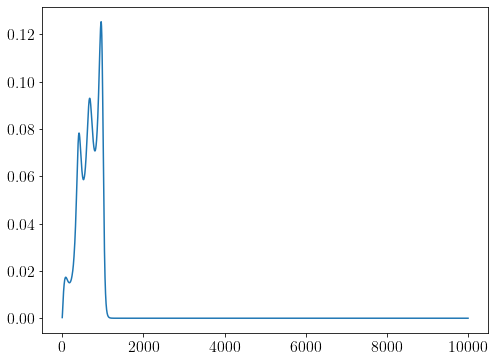

In [250]:
plt.plot(new_lar,fl_boris_advact)
# plt.loglog()

In [ ]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_beam2_only_110422.txt',np.c_[new_lar,bl**2])
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_beam1_only_110422.txt',np.c_[new_lar,bl**1])

In [11]:
new_lar = np.arange(2,10000)
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/ones.txt',np.c_[new_lar,new_lar**0.])

In [252]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_functions_l_fl_with_hm_nl_47uK_nob_110422_lmax_1000.txt',np.c_[new_lar,fl_boris_advact])

In [107]:
# np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_10uK_110422.txt',np.c_[new_lar,fl_boris_advact])

In [80]:
# np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_110422.txt',np.c_[new_lar,fl_boris_advact])

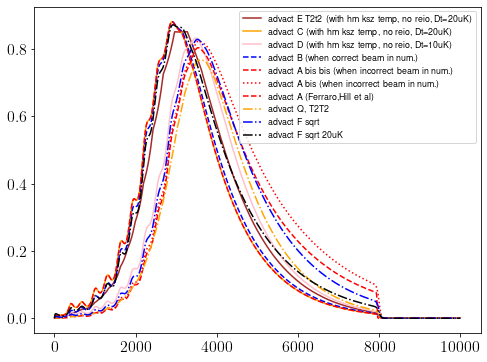

In [101]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_20uK_t2t2_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='advact E T2t2 (with hm ksz temp, no reio, Dt=20uK)',ls='-',c='brown')

l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='advact C (with hm ksz temp, no reio, Dt=20uK)',ls='-',c='orange')

l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_10uK_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='advact D (with hm ksz temp, no reio, Dt=10uK)',ls='-',c='pink')

l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',unpack=True)
plt.plot(l_planck,F_planck,label='advact B (when correct beam in num.)',ls='--',c='b')

l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_20uK_nob_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='advact A bis bis (when incorrect beam in num.)',ls='--',c='r')

l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_bat_nl_10uK_nob_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='advact A bis (when incorrect beam in num.)',ls=':',c='r')

l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',unpack=True)
plt.plot(l_planck,F_planck,label='advact A (Ferraro,Hill et al)',ls='--',c='r')


l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_10uK_t2t2_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='advact Q, T2T2',ls='-.',c='orange')



l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_bat_nl_10uK_wb_sqrt_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='advact F sqrt',ls='-.',c='blue')


l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_bat_nl_20uK_wb_sqrt_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='advact F sqrt 20uK',ls='-.',c='k')

plt.legend(fontsize=9.)

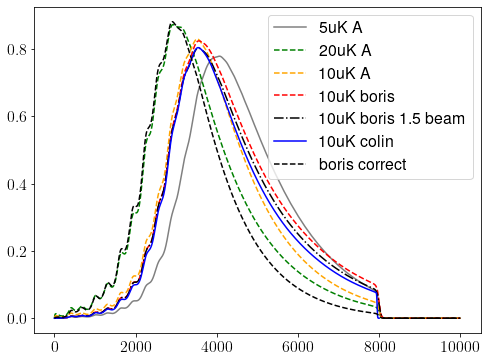

In [243]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_5uK_A_sqrt_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='5uK A',ls='-',c='grey')
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_20uK_A_sqrt_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='20uK A',ls='--',c='green')
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_10uK_A_sqrt_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='10uK A',ls='--',c='orange')
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_bat_nl_10uK_nob_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='10uK boris',ls='--',c='r')
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_bat_nl_10uK_nob_110422_1p5beam.txt',unpack=True)
plt.plot(l_planck,F_planck,label='10uK boris 1.5 beam',ls='-.',c='k')
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',unpack=True)
plt.plot(l_planck,F_planck,label='10uK colin',ls='-',c='b')
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_230222.txt',unpack=True)
plt.plot(l_planck,F_planck,label='boris correct',ls='--',c='k')
plt.legend()

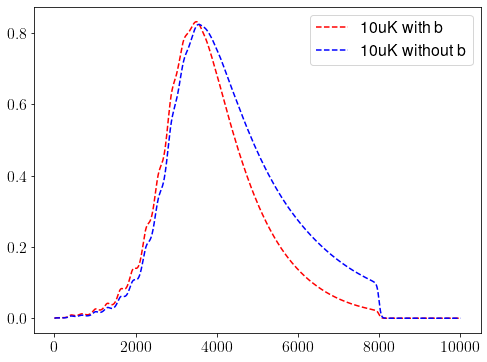

In [196]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_bat_nl_10uK_wb_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='10uK with b',ls='--',c='r')
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_bat_nl_10uK_nob_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='10uK without b',ls='--',c='b')
plt.legend()

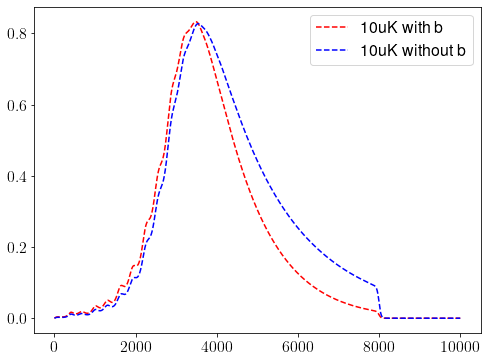

In [195]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_10uK_wb_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='10uK with b',ls='--',c='r')
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_10uK_nob_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='10uK without b',ls='--',c='b')
plt.legend()

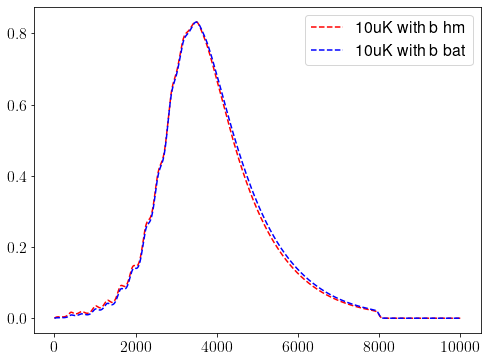

In [194]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_10uK_wb_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='10uK with b hm',ls='--',c='r')
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_bat_nl_10uK_wb_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='10uK with b bat',ls='--',c='b')
plt.legend()

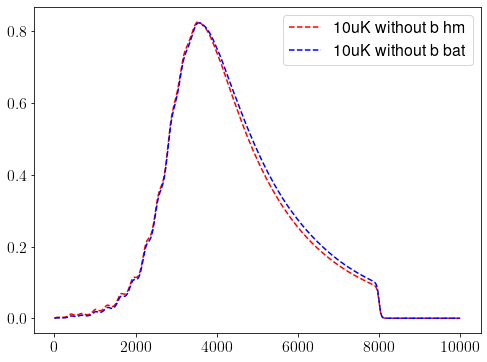

In [193]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_10uK_nob_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='10uK without b hm',ls='--',c='r')
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_bat_nl_10uK_nob_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='10uK without b bat',ls='--',c='b')
plt.legend()

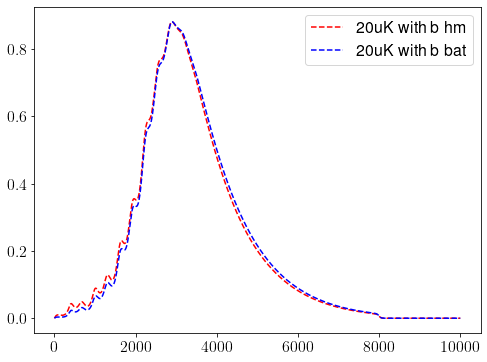

In [192]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_20uK_wb_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='20uK with b hm',ls='--',c='r')
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_bat_nl_20uK_wb_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='20uK with b bat',ls='--',c='b')
plt.legend()

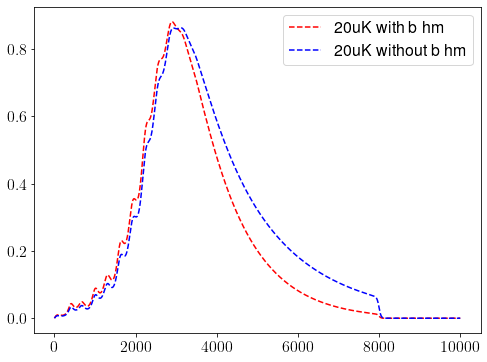

In [151]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_20uK_wb_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='20uK with b hm',ls='--',c='r')
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_20uK_nob_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='20uK without b hm',ls='--',c='b')
plt.legend()

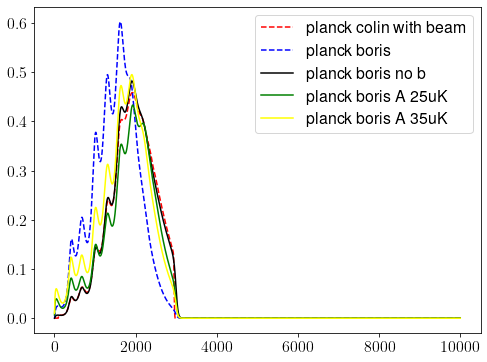

In [238]:
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',unpack=True)
plt.plot(l_planck,F_planck,label='planck colin with beam',ls='--',c='r')
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_in_num_filter_functions_l_fl_190122.txt',unpack=True)
plt.plot(l_planck,F_planck,label='planck boris',ls='--',c='b')
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_functions_l_fl_with_bat_nl_47uK_nob_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='planck boris no b',ls='-',c='k')
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_functions_l_fl_with_hm_nl_25uK_A_sqrt_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='planck boris A 25uK',ls='-',c='green')
l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_functions_l_fl_with_hm_nl_35uK_A_sqrt_110422.txt',unpack=True)
plt.plot(l_planck,F_planck,label='planck boris A 35uK',ls='-',c='yellow')
plt.legend()

### test

In [247]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',
'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_functions_l_fl_with_hm_nl_35uK_A_sqrt_110422.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/planck_nl.txt',

'ksz template file': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_hm.dat',
'ksz template file, reio contribution': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_patchy_0_hm.dat',
        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 3000.0,
'ell_min' : 100.0,
'f_sky':0.6, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07, 
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 85.7901 seconds


In [248]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 3000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

1.5773357605816867
3.1546715211633733


### filter D

In [41]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',
'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_10uK_110422.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',

'ksz template file': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_hm.dat',
'ksz template file, reio contribution': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_patchy_0_hm.dat',
        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.5, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07, 
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 150.6723 seconds


In [42]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

37.29196679398011
74.58393358796022


### filter A

In [21]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',
'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',

'ksz template file': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_hm.dat',
'ksz template file, reio contribution': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_patchy_0_hm.dat',
        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.5, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07, 
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 161.2796 seconds


In [22]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl)

37.32129110628339
74.64258221256678


### filter A bis

In [36]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',
'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_bat_nl_10uK_nob_110422.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',

'ksz template file': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_hm.dat',
'ksz template file, reio contribution': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_patchy_0_hm.dat',
        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.5, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07, 
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 150.3076 seconds


In [37]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl) 

37.121654130595246
74.24330826119049


### filter A bis bis

In [23]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_hf,kSZ_kSZ_gal_hf,kSZ_kSZ_gal_covmat',
'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_20uK_nob_110422.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/adv_act_nl.txt',

'ksz template file': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_hm.dat',
'ksz template file, reio contribution': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_patchy_0_hm.dat',
        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : 0.,
'dell': 564.,
'ell_max' : 8000.0,
'ell_min' : 100.0,
'f_sky':0.5, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07, 
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 156.6933 seconds


In [24]:
cl_kSZ_kSZ_g_planck = M.cl_kSZ_kSZ_g()

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_planck.copy()
cl_tot = np.asarray(np.asarray(cl_kSZ_kSZ_g['hf']))
cl_lensing = 0.*np.asarray(cl_kSZ_kSZ_g['lensing term'])
covll = np.asarray(cl_kSZ_kSZ_g['covmat'])

fac_plc = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g_planck['ell'])*(np.asarray(cl_kSZ_kSZ_g_planck['ell'])+1.)/2./np.pi
l_max_plc= 8000
l = np.asarray(cl_kSZ_kSZ_g['ell'])
cl_hf = np.asarray(cl_kSZ_kSZ_g['hf'])
snrl = cl_tot**2/covll
                   
snrl = np.sqrt(np.sum(snrl[l<l_max_plc]))
print(snrl)
print(2.*snrl) 

28.692192577032262
57.384385154064525


## computation of t2t2 filter

In [70]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_1h,kSZ_kSZ_gal_covmat',
'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/ones.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/advact_nl_10uk_1p4arcmin.txt',

'ksz template file': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_hm.dat',
'ksz template file, reio contribution': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_patchy_0_hm.dat',
        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : .03,
'dell': 0.,
'ell_max' : 12000.0,
'ell_min' : 2.0,
'f_sky':0.5, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07, 
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 17.0429 seconds


[]

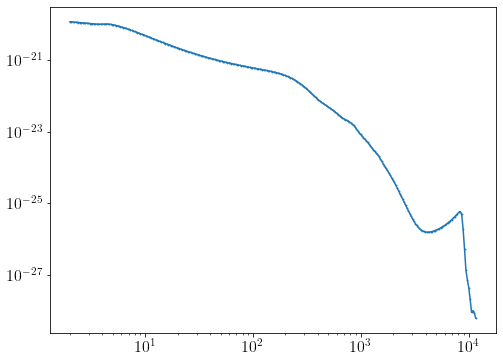

In [71]:
plt.plot(M.cl_t2t2f()['ell'],M.cl_t2t2f()['t2t2f'],marker='o',markersize=0.8)
plt.loglog()

In [72]:
new_lar = np.arange(2,1e4)
import scipy
clksz2ksz2_interp = scipy.interpolate.interp1d(M.cl_t2t2f()['ell'],M.cl_t2t2f()['t2t2f'])
clksz2ksz2_interp(new_lar)

array([1.17268720e-20, 1.04324133e-20, 1.00687066e-20, ...,
       4.71820795e-28, 4.70818050e-28, 4.69815306e-28])

In [73]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/clt2t2_10uK.txt',np.c_[new_lar,clksz2ksz2_interp(new_lar)])

In [74]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
# M.set(bestfit_green_hod_params)


M.set(
    {
'output':'gal_gal_1h,kSZ_kSZ_gal_covmat',
'galaxy_sample': 'custom',
'full_path_to_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/wise_normalized.txt',

'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/ones.txt',
'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/advact_nl_10uk_1p4arcmin.txt',

'ksz template file': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_hm.dat',
'ksz template file, reio contribution': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/cl_ksz_patchy_0_hm.dat',
        
'pk_nonlinear_for_vrms2' : 0,        

'dlogell' : .03,
'dell': 0.,
'ell_max' : 12000.0,
'ell_min' : 2.0,
'f_sky':0.5, 

'effective_galaxy_bias': 1.,
'cl_gal_gal_A_sn' : 1.2566370614359172e-07, 
    
'use_bg_at_z_in_ksz2g_eff' : 0,
'use_bg_eff_in_ksz2g_eff' : 1,
'use_fdndz_for_ksz2g_eff':1,

'compute_ksz2ksz2':1,
      })

ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
print(f"computed in {tf - ti:0.4f} seconds")

computed in 17.6570 seconds


[]

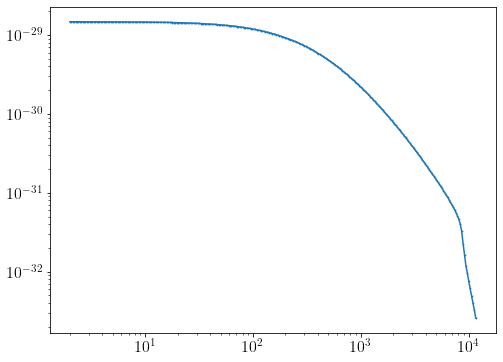

In [75]:
plt.plot(M.cl_t2t2f()['ell'],M.cl_t2t2f()['t2t2f'],marker='o',markersize=0.8)
plt.loglog()

In [76]:
new_lar = np.arange(2,1e4)
import scipy
clksz2ksz2_interp = scipy.interpolate.interp1d(M.cl_t2t2f()['ell'],M.cl_t2t2f()['t2t2f'])
clksz2ksz2_interp(new_lar)

array([1.47372268e-29, 1.47143552e-29, 1.47011833e-29, ...,
       7.78320838e-33, 7.77637002e-33, 7.76953165e-33])

In [77]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/clksz2ksz2_10uK.txt',np.c_[new_lar,clksz2ksz2_interp(new_lar)])

In [78]:
ls_t2t2,cls_t2t2 = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/clt2t2_10uK.txt',unpack=True)
ls_ksz2ksz2,cls_ksz2ksz2 = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/clksz2ksz2_10uK.txt',unpack=True)

[]

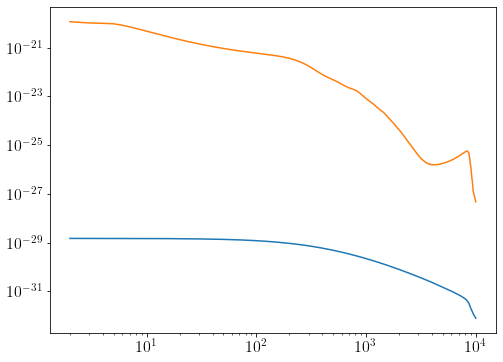

In [79]:
plt.plot(ls_t2t2,cls_ksz2ksz2)
plt.plot(ls_t2t2,cls_t2t2)
plt.loglog()

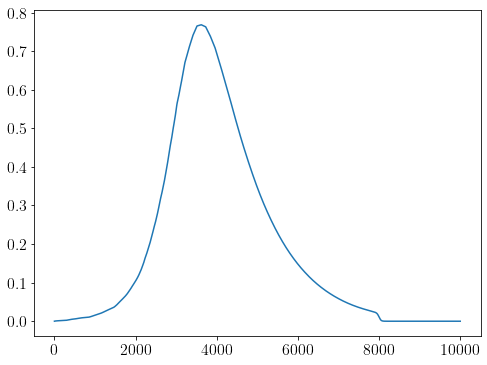

In [80]:

l_max_advact = 8000
ThetaFWHM = 1.4*arcmin_to_radians
bl = np.exp(-1./2.*ThetaFWHM**2.*ls_t2t2*(ls_t2t2+1.)/8./np.log(2.))

fl = bl*cls_ksz2ksz2/cls_t2t2/np.max(cls_ksz2ksz2/cls_t2t2)*0.5*(1.-np.tanh((ls_t2t2-l_max_advact)/50.))
plt.plot(ls_t2t2,fl)
# plt.plot(ls_t2t2,)
# plt.loglog()
# print()

In [81]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/advact_filter_functions_l_fl_with_hm_nl_10uK_t2t2_110422.txt',np.c_[ls_t2t2,fl])

# Theory plots with comparison of profiles

In [12]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#,kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 2.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile' : 1,
'use_bg_at_z_in_ksz2g_eff' : 1,


'x_out_truncated_density_profile (electrons)': 1., 
       
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw_advact = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
# M.struct_cleanup()
# M.empty()

computed in 602.7795 seconds


In [14]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#,kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 2.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile' : 1,
'use_bg_at_z_in_ksz2g_eff' : 1,


'x_out_truncated_density_profile (electrons)': 1., 
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_advact = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
# M.struct_cleanup()
# M.empty()

computed in 498.0191 seconds


In [16]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#,kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 15000.0,
'ell_min' : 2.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'shock',
'normalize_gas_density_profile' : 1,
'use_bg_at_z_in_ksz2g_eff' : 1,


'x_out_truncated_density_profile (electrons)': 1., 
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock_advact = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
# M.struct_cleanup()
# M.empty()

computed in 502.2524 seconds


In [17]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#',kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
#        'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
#        'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 6000.0,
'ell_min' : 2.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile' : 1,
'use_bg_at_z_in_ksz2g_eff' : 1,


'x_out_truncated_density_profile (electrons)': 1., 
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw_planck = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
# M.struct_cleanup()
# M.empty()

computed in 370.3229 seconds


In [18]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#',kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
#        'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
#        'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 6000.0,
'ell_min' : 2.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile' : 1,
'use_bg_at_z_in_ksz2g_eff' : 1,


'x_out_truncated_density_profile (electrons)': 1., 
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_planck = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
# M.struct_cleanup()
# M.empty()

computed in 360.6142 seconds


In [19]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({'output':'mean_galaxy_bias,kSZ_kSZ_gal_hf,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#',kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
#        'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
#        'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 6000.0,
'ell_min' : 2.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'shock',
'normalize_gas_density_profile' : 1,
'use_bg_at_z_in_ksz2g_eff' : 1,

'x_out_truncated_density_profile (electrons)': 1., 
       
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_shock_planck = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
# M.struct_cleanup()
# M.empty()

computed in 408.0720 seconds


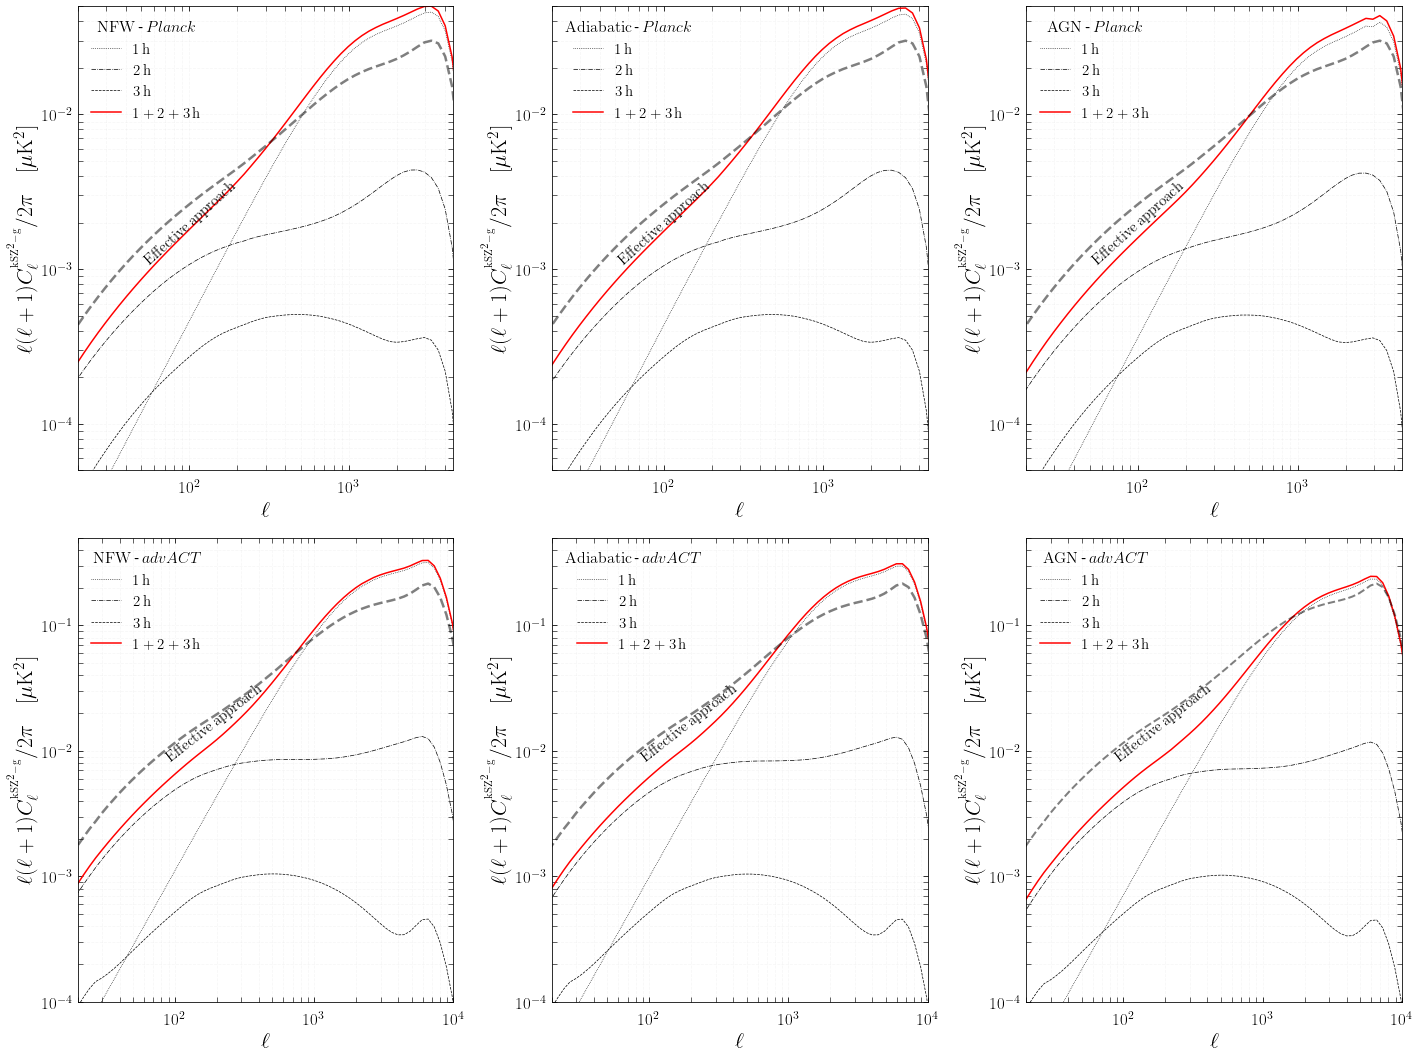

In [20]:
# l_advact, F_advact = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',unpack=True)
# l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',unpack=True)


#'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',

label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
# fig, ((ax2,ax3),(ax4,ax5),(ax6,ax7)) = plt.subplots(3,2,figsize=(16,15))
fig, ((ax2,ax4,ax6),(ax3,ax5,ax7)) = plt.subplots(2,3,figsize=(20,15))
# ax = ax1
# ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
# ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
# ax.xaxis.set_ticks_position('both')
# ax.yaxis.set_ticks_position('both')
# plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
# plt.setp(ax.get_xticklabels(), fontsize=label_size)
# ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

# ax.plot(l_advact,F_advact/np.max(F_advact),label='advACT',c='k',ls='--')
# ax.plot(l_planck,F_planck/np.max(F_planck),label='planck',c='r')
# ax.legend(loc=1)

# ax.set_ylabel(r'$F(\ell)=f(\ell)\times b(\ell)$',size=title_size)
# ax.set_xlabel(r'$\ell$',size=title_size)



ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_planck.copy()
# cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_advact.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.5)


# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')

# simo = np.loadtxt('../../class_sz_external_data_and_scripts/kSZ2_gal_unwise/08-18-2020-l2Cl_filtered_planck_NLveldisp_b1_NOJeans_kSZ2xgals-green.dat',unpack=True)
# ls_simo = simo[:,0]
# cls_simo = simo[:,1]

# ax.plot(ls_simo,2.23*cls_simo,c='blue',ls='-.',alpha=0.5,label='Previous work (effective)')
# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,4.5e3)
ax.set_ylim(5e-5,5e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{NFW}\,$-$\,Planck$')

textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.17, 0.63, textstr, transform=ax.transAxes, fontsize=15,rotation=42,
        verticalalignment='top')
        #,bbox=props)



ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

# cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_advact.copy()
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_advact.copy()


fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.5)


# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,10e3)
ax.set_ylim(1e-4,5e-1)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{NFW}\,$-$\,advACT$')

textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.23, 0.69, textstr, transform=ax.transAxes, fontsize=15,rotation=38,
        verticalalignment='top')
        #,bbox=props)





ax = ax4
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_shock_planck.copy()
# cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_advact.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.5)


# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,4.5e3)
ax.set_ylim(5e-5,5e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{Adiabatic}\,$-$\,Planck$')
textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.17, 0.63, textstr, transform=ax.transAxes, fontsize=15,rotation=42,
        verticalalignment='top')
        #,bbox=props)


ax = ax5
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_shock_advact.copy()
# cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_advact.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.5)


# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,10e3)
ax.set_ylim(1e-4,5e-1)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{Adiabatic}\,$-$\,advACT$')

textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.23, 0.69, textstr, transform=ax.transAxes, fontsize=15,rotation=38,
        verticalalignment='top')
        #,bbox=props)




    
ax = ax6
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_planck.copy()
# cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_advact.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.5)


# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,4.5e3)
ax.set_ylim(5e-5,5e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{AGN}\,$-$\,Planck$')

textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.17, 0.63, textstr, transform=ax.transAxes, fontsize=15,rotation=42,
        verticalalignment='top')
        #,bbox=props)

ax = ax7
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_advact.copy()
# cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_advact.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.)


# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,10e3)
ax.set_ylim(1e-4,5e-1)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{AGN}\,$-$\,advACT$')


    
textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.23, 0.69, textstr, transform=ax.transAxes, fontsize=15,rotation=38,
        verticalalignment='top')
        #,bbox=props)





fig.tight_layout()
plt.savefig('cls_ttg_xout_1.pdf')
# plt.title('agn')

In [253]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({'output':'mean_galaxy_bias,kSZ_kSZ_1h,kSZ_kSZ_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#,kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_functions_l_fl_with_hm_nl_47uK_nob_110422_lmax_1000.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 3000.0,
'ell_min' : 2.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'nfw',
'gas profile mode' : 'agn',
'normalize_gas_density_profile' : 1,
'use_bg_at_z_in_ksz2g_eff' : 1,


'x_out_truncated_density_profile (electrons)': 5., 
       
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_nfw_advact = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
# M.struct_cleanup()
# M.empty()

computed in 133.5339 seconds


In [254]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({'output':'mean_galaxy_bias,kSZ_kSZ_1h,kSZ_kSZ_2h,kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#,kSZ_kSZ_gal_covmat,kSZ_kSZ_gal_lensing_term',
       'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/planck_filter_functions_l_fl_with_hm_nl_47uK_nob_110422_lmax_1000.txt',
       #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',       
       'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/AdvACT_T_default_Nseasons4.0_NLFyrs2.0_noisecurves_deproj0_mask_16000_ell_TT_yy.txt',
#         'full_path_to_noise_curve_for_t_t': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/noise_curves/S4_190604d_2LAT_Tpol_default_noisecurves/S4_190604d_2LAT_T_default_noisecurves_deproj0_SENS0_mask_16000_ell_TT_yy.txt',

'dlogell' : 0.1,
'dell': 0.,
'ell_max' : 3000.0,
'ell_min' : 2.0,
'f_sky':0.3, # 0.3 for advACT, 0.4 for SO and S4
'gas profile' : 'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile' : 1,
'use_bg_at_z_in_ksz2g_eff' : 1,


'x_out_truncated_density_profile (electrons)': 5., 
       
      })
ti = time.perf_counter()
M.compute()
tf = time.perf_counter()
cl_kSZ_kSZ_g_agn_advact = M.cl_kSZ_kSZ_g()
print(f"computed in {tf - ti:0.4f} seconds")
# M.struct_cleanup()
# M.empty()

computed in 167.5630 seconds


In [ ]:
label_size = 19
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax2) = plt.subplots(1,1,figsize=(8,5))

# ax = ax1

ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')

ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$[\ell(\ell+1)/2\pi] C_\ell^{_\mathrm{kSZ^2}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)


# ax.plot(M.raw_cl()['ell'],M.raw_cl()['ell']*(M.raw_cl()['ell']+1.)/2./np.pi*M.raw_cl()['tt'],label='unlensed cmb')
# ax.plot(M.lensed_cl()['ell'],M.lensed_cl()['ell']*(M.lensed_cl()['ell']+1.)/2./np.pi*M.lensed_cl()['tt'],label='lensed cmb')
l_bat,dl_bat = np.loadtxt(path_to_files+'/cl_ksz_bat.dat',unpack=True)
ax.plot(l_bat,dl_bat*(M.T_cmb()*1e6)**-2.,label=r'$\mathrm{Battaglia}$ $et$ $al$ $2010$',ls='--',c='k',lw=2.5)

# ax.plot(l_bat_patchy,dl_bat_patchy*(M.T_cmb()*1e6)**-2.,label=r'$\mathrm{Battaglia}$ $et$ $al$ $2010$',ls='--',c='k',lw=2.5)


# ax.plot(cl_ksz_nfw['ell'],np.asarray(cl_ksz_nfw['1h']),c='k',alpha=0.2,ls=':',lw=0.7)
# ax.plot(cl_ksz_nfw['ell'],np.asarray(cl_ksz_nfw['2h']),c='k',alpha=0.2,ls='-.',lw=0.7)
# ax.plot(cl_ksz_nfw['ell'],np.asarray(cl_ksz_nfw['1h'])+np.asarray(cl_ksz_nfw['2h']),c='k',ls='-',label=r'$\mathrm{NFW}$',alpha=0.3)


cl_ksz_b16 = 

ax.plot(cl_ksz_b16['ell'],np.asarray(cl_ksz_b16['1h']),c='k',alpha=0.5,ls=':',lw=0.7)
ax.plot(cl_ksz_b16['ell'],np.asarray(cl_ksz_b16['2h']),c='k',alpha=0.5,ls='-.',lw=0.7)
ax.plot(cl_ksz_b16['ell'],np.asarray(cl_ksz_b16['1h'])+np.asarray(cl_ksz_b16['2h']),c='k',ls='-',label=r'$\mathrm{AGN}$ xout=5 no consistency')



ax.plot(cl_ksz_nfw_with_cd['ell'],np.asarray(cl_ksz_nfw_with_cd['1h']),c='magenta',alpha=0.2,ls=':',lw=0.7)
ax.plot(cl_ksz_nfw_with_cd['ell'],np.asarray(cl_ksz_nfw_with_cd['2h']),c='magenta',alpha=0.2,ls='-.',lw=0.7)
ax.plot(cl_ksz_nfw_with_cd['ell'],np.asarray(cl_ksz_nfw_with_cd['1h'])+np.asarray(cl_ksz_nfw_with_cd['2h']),label=r'$\mathrm{NFW}$ xout=5',c='r',ls='-',alpha=0.3)






ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=10,frameon=False)
ax.set_ylim(1e-15,6e-13)
ax.set_xlim(10,1e4)
   
    
ax.legend(frameon=False,fontsize=10,loc=2)
# plt.title('no consistency condition')
fig.tight_layout()
# plt.savefig('cls_ksz_figure_kszonly_xoutrhoe_5.pdf')

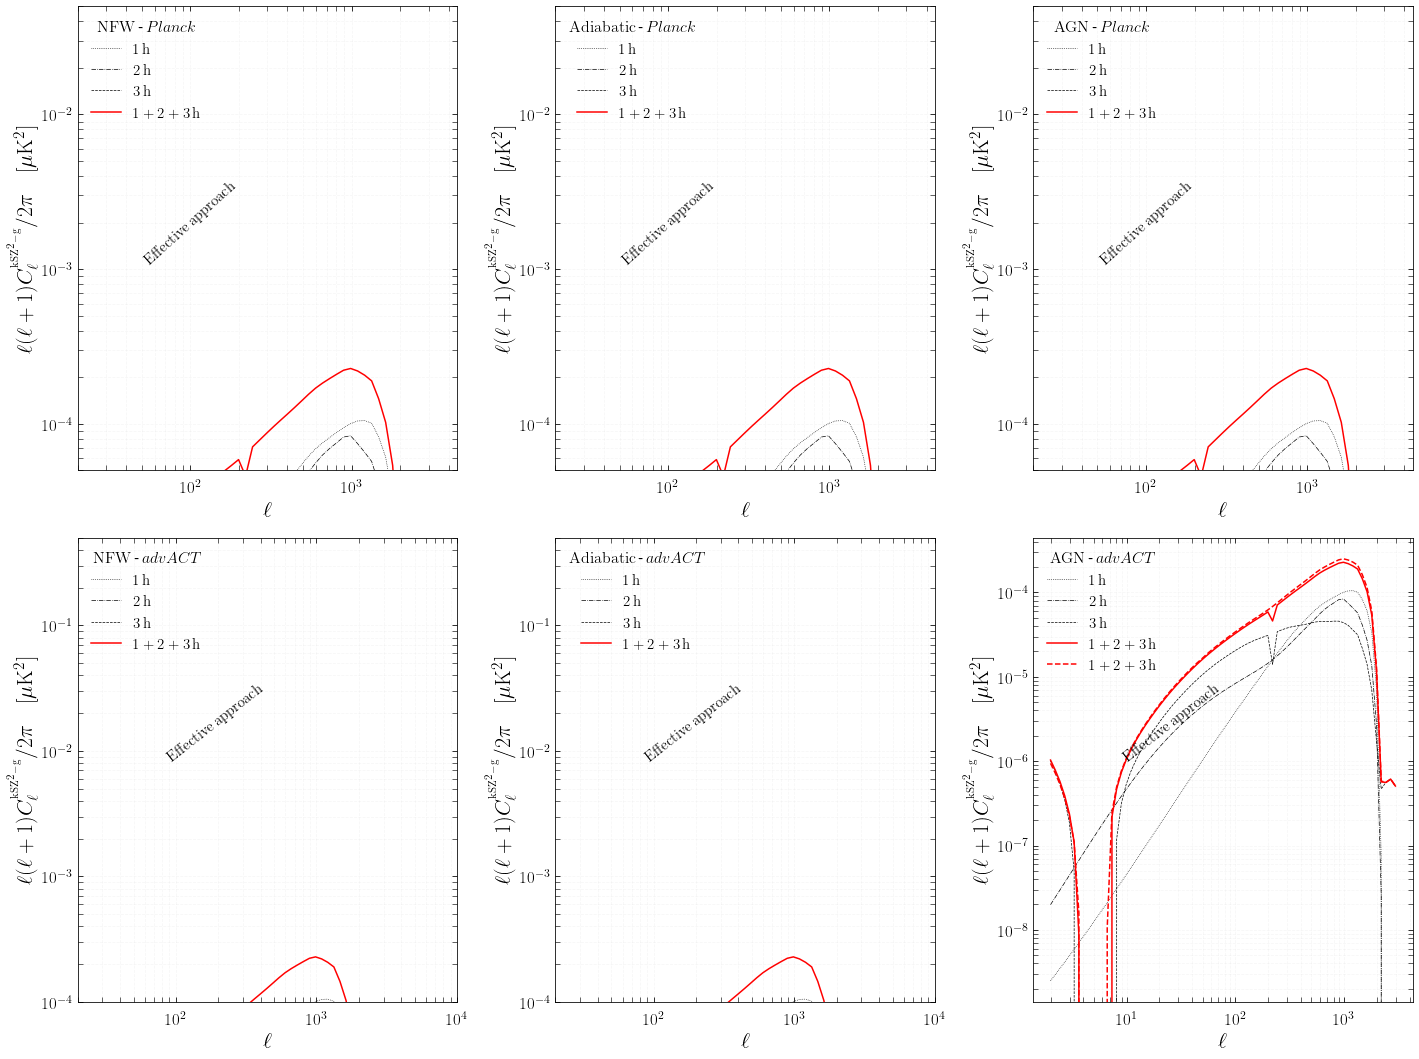

In [258]:
# l_advact, F_advact = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',unpack=True)
# l_planck, F_planck = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',unpack=True)


#'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',

label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
# fig, ((ax2,ax3),(ax4,ax5),(ax6,ax7)) = plt.subplots(3,2,figsize=(16,15))
fig, ((ax2,ax4,ax6),(ax3,ax5,ax7)) = plt.subplots(2,3,figsize=(20,15))
# ax = ax1
# ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
# ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
# ax.xaxis.set_ticks_position('both')
# ax.yaxis.set_ticks_position('both')
# plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
# plt.setp(ax.get_xticklabels(), fontsize=label_size)
# ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

# ax.plot(l_advact,F_advact/np.max(F_advact),label='advACT',c='k',ls='--')
# ax.plot(l_planck,F_planck/np.max(F_planck),label='planck',c='r')
# ax.legend(loc=1)

# ax.set_ylabel(r'$F(\ell)=f(\ell)\times b(\ell)$',size=title_size)
# ax.set_xlabel(r'$\ell$',size=title_size)



ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')
# cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_planck.copy()
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_advact.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.5)


# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')

# simo = np.loadtxt('../../class_sz_external_data_and_scripts/kSZ2_gal_unwise/08-18-2020-l2Cl_filtered_planck_NLveldisp_b1_NOJeans_kSZ2xgals-green.dat',unpack=True)
# ls_simo = simo[:,0]
# cls_simo = simo[:,1]

# ax.plot(ls_simo,2.23*cls_simo,c='blue',ls='-.',alpha=0.5,label='Previous work (effective)')
# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,4.5e3)
ax.set_ylim(5e-5,5e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{NFW}\,$-$\,Planck$')

textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.17, 0.63, textstr, transform=ax.transAxes, fontsize=15,rotation=42,
        verticalalignment='top')
        #,bbox=props)



ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

# cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_advact.copy()
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_advact.copy()


fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.5)


# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,10e3)
ax.set_ylim(1e-4,5e-1)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{NFW}\,$-$\,advACT$')

textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.23, 0.69, textstr, transform=ax.transAxes, fontsize=15,rotation=38,
        verticalalignment='top')
        #,bbox=props)





ax = ax4
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


# cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_shock_planck.copy()
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_advact.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.5)


# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,4.5e3)
ax.set_ylim(5e-5,5e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{Adiabatic}\,$-$\,Planck$')
textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.17, 0.63, textstr, transform=ax.transAxes, fontsize=15,rotation=42,
        verticalalignment='top')
        #,bbox=props)


ax = ax5
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


# cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_shock_advact.copy()
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_advact.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.5)


# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,10e3)
ax.set_ylim(1e-4,5e-1)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{Adiabatic}\,$-$\,advACT$')

textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.23, 0.69, textstr, transform=ax.transAxes, fontsize=15,rotation=38,
        verticalalignment='top')
        #,bbox=props)




    
ax = ax6
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

# cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_planck.copy()
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_advact.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.5)


# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
ax.set_xlim(20.,4.5e3)
ax.set_ylim(5e-5,5e-2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{AGN}\,$-$\,Planck$')

textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.17, 0.63, textstr, transform=ax.transAxes, fontsize=15,rotation=42,
        verticalalignment='top')
        #,bbox=props)

ax = ax7
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')


# cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_advact.copy()
cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_nfw_advact.copy()

fac = (2.726e6)**2*np.asarray(cl_kSZ_kSZ_g['ell'])*(np.asarray(cl_kSZ_kSZ_g['ell'])+1.)/2./np.pi
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h']),label = r'$\mathrm{1\,h}$',c='k',ls=':',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['2h']),label = r'$\mathrm{2\,h}$',c='k',ls='-.',lw=0.7)
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['3h']),label = r'$\mathrm{3\,h}$',c='k',ls='--',lw=0.7)

ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='-')


cl_kSZ_kSZ_g = cl_kSZ_kSZ_g_agn_advact.copy()
ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
        label = r'$\mathrm{1+2+3\,h}$',c='r',ls='--')

# ax.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['hf']),c='k',ls='--',alpha=0.5,lw=2.)


# plt.plot(cl_kSZ_kSZ_g['ell'],fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,label = 'lensing term / 10',c='pink',ls='-',marker = 'o')
# plt.plot(cl_kSZ_kSZ_g['ell'],-fac*np.asarray(cl_kSZ_kSZ_g['lensing term'])/10.,ls='--',c='pink')#,label = 'lensing term',c='pink',ls='-',marker = 'o')



# plt.errorbar(cl_kSZ_kSZ_g['ell'],
#          fac*np.asarray(cl_kSZ_kSZ_g['1h'])+fac*np.asarray(cl_kSZ_kSZ_g['2h'])+fac*np.asarray(cl_kSZ_kSZ_g['3h']),
#          yerr = fac*np.sqrt(np.asarray(cl_kSZ_kSZ_g['covmat'])),
#          label = 'cl tot',
#              c='orange',ls='--',marker = 'o')
# ax.set_xlim(20.,10e3)
# ax.set_ylim(1e-4,5e-1)

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r"$\ell$",size=title_size)
ax.set_ylabel(r"$\ell(\ell+1)C_\ell^\mathrm{^{kSZ^2-g}}/2\pi\quad [\mathrm{\mu K^2}]$",size=title_size)
# ax.grid()
ax.legend(loc=2,frameon=False,fontsize=15,title=r'$\mathrm{AGN}\,$-$\,advACT$')


    
textstr  = r'$\mathrm{Effective}$ $\mathrm{approach}$'
# props = dict(boxstyle='round', facecolor='wheat', alpha=1.)
props = dict(boxstyle='None', facecolor='None', alpha=1.)
ax.text(0.23, 0.69, textstr, transform=ax.transAxes, fontsize=15,rotation=38,
        verticalalignment='top')
        #,bbox=props)





fig.tight_layout()
# plt.savefig('cls_ttg.pdf')
# plt.title('agn')

In [273]:
# zz = 2.
# M_min = 1e8
# M = Class()
# # params = planck_2015
# # M.set(params)
zz = 1.
M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,

'use_bg_at_z_in_ksz2g_eff' : 1, # !!!!!!VERY IMPORTANT

'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'nfw', # b16

'x_out_truncated_density_profile (electrons)': 5.,
    
'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'mean_galaxy_bias,bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit'


})
M.compute()
bk_ttg_at_z_hm = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF = []
Bk_TTG_TL = []

pk_halofit = []
for k1 in k1_a:
  k2 = k1
  k3 = k1
  Bk_TTG_HF.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
    
    
lambda2 = 1.
lambda3 = 0.01


# zz = 2.
# M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,

'use_bg_at_z_in_ksz2g_eff' : 1, # !!!!!!VERY IMPORTANT
'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,


'concentration parameter':'D08',


'gas profile':'nfw', # b16
    
'x_out_truncated_density_profile (electrons)': 5.,

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'mean_galaxy_bias,bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit',
"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm_sq = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF_sq = []
Bk_TTG_TL_sq = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF_sq.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL_sq.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))

    
lambda2 = 0.5
lambda3 = 0.5


# zz = 2.
# M_min = 1e10
M = Class()
# params = planck_2015
# M.set(params)
M.set({

'omega_b' : 0.0226,
'omega_cdm' : 0.11,
'h' : 0.71,
'tau_reio' : 0.088,
'n_s' : 0.963,
'k_pivot' : 0.002,
'N_ncdm' : 1,
'N_ur' : 2.0328,
'm_ncdm' : 0.06,
'f_free' : 1.0 ,   
    
'z_min':1e-6,
'z_max':4.0,
'use_bg_at_z_in_ksz2g_eff' : 1, # !!!!!!VERY IMPORTANT

'mass function':'T10',
'M_min':M_min,
'M_max':1e+17,
'hm_consistency':1,
    
    


'concentration parameter':'D08',


'gas profile':'nfw', # b16
    
'x_out_truncated_density_profile (electrons)': 5.,

'sigma_log10M_HOD':0.76,
'alpha_s_HOD':2.08,
'M_min_HOD':10100000000000.0,
'M1_prime_HOD':118000000000000.0,
'M0_HOD':0.0,
'M0 equal M_min (HOD)':'no',

'pk_nonlinear_for_vrms2':0,
'delta for electron density':'200m',
'delta for galaxies':'200m',
'delta for matter density':'200m',
'sz_verbose':0,

'ndim_masses':150,
'ndim_redshifts':150,

'output':'mean_galaxy_bias,bk_ttg_at_z_hf,bk_ttg_at_z_1h,bk_ttg_at_z_2h,bk_ttg_at_z_3h',

'dlnk_for_pk_hm':0.01,
'z_for_pk_hm':zz,

'k_min_for_pk_hm':0.001,
'k_max_for_pk_hm':10.0,
    
'k_min_for_pk_class_sz':0.0001,
'k_max_for_pk_class_sz':100.0,
'k_per_decade_class_sz':20.0,
'P_k_max_h/Mpc' : 148.54426619132502,

'non linear':'halofit',
"bispectrum_lambda_2" : lambda2,
"bispectrum_lambda_3" : lambda3

})
M.compute()
bk_ttg_at_z_hm_f = M.bk_ttg_at_z_hm()


z = zz
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk_TTG_HF_f = []
Bk_TTG_TL_f = []

pk_halofit = []
for k1 in k1_a:
  k2 = lambda2*k1
  k3 = lambda3*k1
  Bk_TTG_HF_f.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_effective_approach(k1,k2,k3,z))
  Bk_TTG_TL_f.append(M.get_mean_galaxy_bias_at_z(z)*M.get_ttg_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))









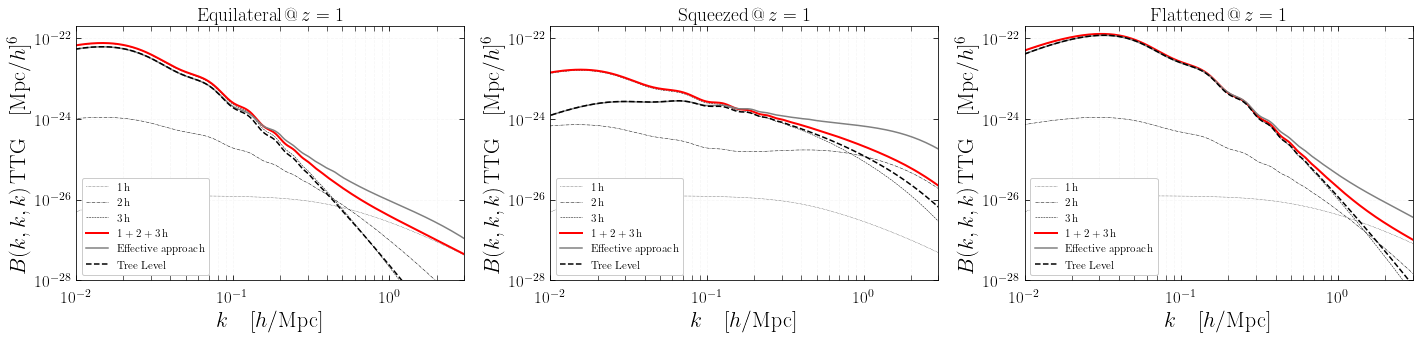

In [274]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,k,k)\,\mathrm{TTG}\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)




ax.loglog()
# plt.xlabel(r'$k\quad\mathrm{[h/Mpc]}$')
# plt.ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$')
ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)
# ax.grid(which='both')
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')
ax.set_title(r'$\mathrm{Equilateral}\,@\, z=1$')




    
ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,k,k)\,\mathrm{TTG}\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],np.asarray(bk_ttg_at_z_hm_sq['1h'])+np.asarray(bk_ttg_at_z_hm_sq['2h'])+np.asarray(bk_ttg_at_z_hm_sq['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF_sq),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL_sq),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)


ax.loglog()
# plt.xlabel(r'$k\quad\mathrm{[h/Mpc]}$')
# plt.ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$')
ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)
# ax.grid(which='both')
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$\mathrm{Squeezed}\,@\, z=1$')
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')


ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,k,k)\,\mathrm{TTG}\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],np.asarray(bk_ttg_at_z_hm_f['1h'])+np.asarray(bk_ttg_at_z_hm_f['2h'])+np.asarray(bk_ttg_at_z_hm_f['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF_f),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL_f),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)




ax.loglog()
# plt.xlabel(r'$k\quad\mathrm{[h/Mpc]}$')
# plt.ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$')
ax.set_ylim(1e1,3e8)
ax.set_xlim(2e-3,1e1)
# ax.grid(which='both')
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$\mathrm{Flattened}\,@\, z=1$')
ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
fig.tight_layout()
plt.savefig('bk_ttg_z1_wct_Mmin1e8_matter_nfw_test_xout_5.pdf')





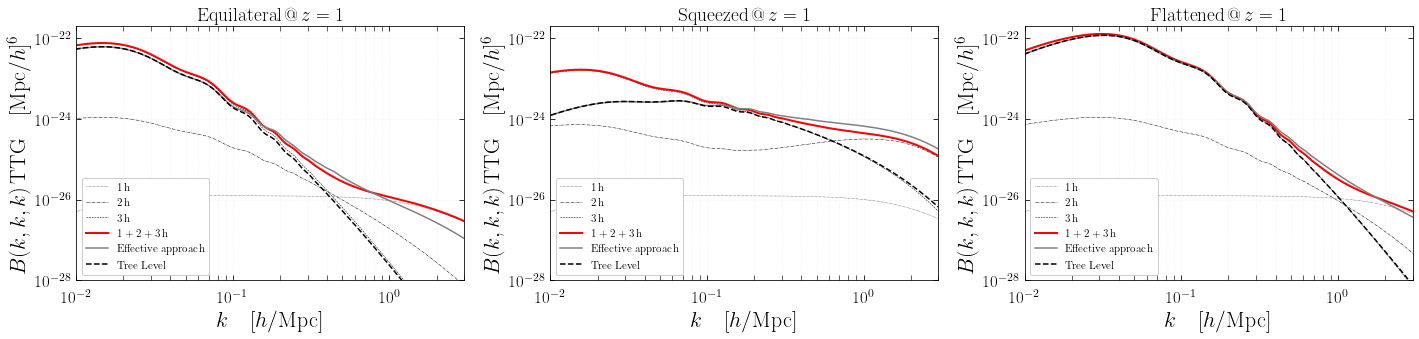

In [12]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,k,k)\,\mathrm{TTG}\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],bk_ttg_at_z_hm['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm['k'],np.asarray(bk_ttg_at_z_hm['1h'])+np.asarray(bk_ttg_at_z_hm['2h'])+np.asarray(bk_ttg_at_z_hm['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)




ax.loglog()
# plt.xlabel(r'$k\quad\mathrm{[h/Mpc]}$')
# plt.ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$')
ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)
# ax.grid(which='both')
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')
ax.set_title(r'$\mathrm{Equilateral}\,@\, z=1$')




    
ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,k,k)\,\mathrm{TTG}\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],bk_ttg_at_z_hm_sq['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm_sq['k'],np.asarray(bk_ttg_at_z_hm_sq['1h'])+np.asarray(bk_ttg_at_z_hm_sq['2h'])+np.asarray(bk_ttg_at_z_hm_sq['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF_sq),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL_sq),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)


ax.loglog()
# plt.xlabel(r'$k\quad\mathrm{[h/Mpc]}$')
# plt.ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$')
ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)
# ax.grid(which='both')
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$\mathrm{Squeezed}\,@\, z=1$')
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
# plt.savefig('bk_z1_wct_Mmin1e8.pdf')


ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,k,k)\,\mathrm{TTG}\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h/\mathrm{Mpc]}$',size=title_size)

ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['1h'],label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['2h'],label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],bk_ttg_at_z_hm_f['3h'],label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
ax.plot(bk_ttg_at_z_hm_f['k'],np.asarray(bk_ttg_at_z_hm_f['1h'])+np.asarray(bk_ttg_at_z_hm_f['2h'])+np.asarray(bk_ttg_at_z_hm_f['3h']),
        label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)

ax.plot(k1_a,np.asarray(Bk_TTG_HF_f),label=r'$\mathrm{Effective}$ $\mathrm{approach}$',alpha=1.,c='grey')
ax.plot(k1_a,np.asarray(Bk_TTG_TL_f),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,ls='--',c='k',lw=1.5)




ax.loglog()
# plt.xlabel(r'$k\quad\mathrm{[h/Mpc]}$')
# plt.ylabel(r'$B(k,k,k)\quad\mathrm{[Mpc/h]^6}$')
ax.set_ylim(1e1,3e8)
ax.set_xlim(2e-3,1e1)
# ax.grid(which='both')
ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$\mathrm{Flattened}\,@\, z=1$')
ax.set_ylim(1e-28,2e-22)
ax.set_xlim(1e-2,3e0)
# plt.title('M_min = %.2e Msun/h at z=%.2f'%(M_min,zz))
fig.tight_layout()
# plt.savefig('bk_ttg_z1_wct_Mmin1e8_matter_nfw.pdf')





# power spectra plots

In [3]:
# zacharegas21_cosmo_redmagic = {
    
#      # P18 1st column table 1 of https://arxiv.org/pdf/1807.06209.pdf
#     'Omega_b': 0.0486,
#     'Omega_cdm': 0.341-0.0486,
#     'h':  0.6737,
#     'tau_reio': 0.0543,
#     'sigma8': 0.735,
#     'n_s':  0.9649,
#     'k_pivot': 0.05,
#     'N_ncdm': 1,
#     'N_ur': 2.0328,
#     'm_ncdm': 0.06
# }

# p18_cosmo = {
    
#      # P18 1st column table 1 of https://arxiv.org/pdf/1807.06209.pdf
#     'omega_b': 0.022383,
#     'omega_cdm': 0.12011,
#     'h': 0.6732,
#     'tau_reio': 0.0543,
#     'ln10^{10}A_s': 3.0448,
#     'n_s': 0.96605,
#     'k_pivot': 0.05,
#     'N_ncdm': 1,
#     'N_ur': 2.0328,
#     'm_ncdm': 0.06
# }
# ksz_params_pks = {
# #fiducial ksz params
# 'omega_b' : 0.022383,
# 'omega_cdm' : 0.12011,
# 'h' : 0.6732,
# 'tau_reio' : 0.0543,
# 'ln10^{10}A_s' : 3.0448,
# 'n_s' : 0.96605,
# 'k_pivot' : 0.05,
# 'N_ncdm' : 1,
# 'N_ur' : 2.0328,
# 'm_ncdm' : 0.06,
    
# #      # P18 1st column table 1 of https://arxiv.org/pdf/1807.06209.pdf
# #     'omega_b': 0.022383,
# #     'omega_cdm': 0.12011,
# #     'h': 0.6732,
# #     'tau_reio': 0.0543,
# #     'ln10^{10}A_s': 3.0448,
# #     'n_s': 0.96605,
# #     'k_pivot': 0.05,
# #     'N_ncdm': 1,
# #     'N_ur': 2.0328,
# #     'm_ncdm': 0.06    
    

# 'f_free' : 1.0,
# 'pressure profile' : 'B12',
# 'k_min_for_pk_class_sz' : 0.001,
# 'k_max_for_pk_class_sz' : 60.0,
# 'k_per_decade_class_sz' : 50,
# 'P_k_max_h/Mpc' : 100.0,
# 'non linear' : 'halofit',
# 'z_min' : 0.01, # minimum redshift in simone's calculations
# 'z_max' : 4.,
# 'M_min' : 1e10,
# 'm_min_counter_terms' : 1e10,
# 'M_max' : 1e+17,
# 'mass function' : 'T10',
# 'galaxy_sample' : 'unwise',
# 'galaxy_sample_id' : 'green',
# 'concentration parameter' : 'D08',
# 'use_hod' : 'yes',
# 'use_analytical_truncated_nfw' : 'yes',
# 'x_out_truncated_nfw_profile_satellite_galaxies' : 1,
# 'M0 equal M_min (HOD)' : 'no',
# 'gas profile' : 'nfw',
# 'gas profile mode' : 'agn',
# 'sigma_log10M_HOD' : 0.76,
# 'alpha_s_HOD' : 2.08,
# 'M_min_HOD' : 10100000000000.0,
# 'M1_prime_HOD' : 118000000000000.0,
# 'M0_HOD' : 0.0,
# 'x_out_truncated_nfw_profile' : 1.0,
# 'pk_nonlinear_for_vrms2' : 1,
# 'hm_consistency' : 1,
# 'normalize_gas_density_profile': 1,
# 'sz_verbose' : 0, # for full output when not using python wrapper set to >100, this doesnt work with python wrapper
# #'root' : 'sz_auxiliary_files/run_scripts/tmp/class-sz_tmp_',
# #'write sz results to files' : 'yes',
# 'nfw_profile_epsabs' : 1e-33,
# 'nfw_profile_epsrel' : 0.001,
# 'redshift_epsabs' : 1e-50,
# 'redshift_epsrel' : 0.001,
# 'mass_epsabs' : 1e-30,
# 'mass_epsrel' : 0.01,
# 'dell' : 300,
# 'ell_max' : 5000.0,
# 'ell_min' : 100.0,

# 'non linear' : 'halofit',
# 'nonlinear_verbose' : 0,
# 'ndim_masses' : 80,
# 'ndim_redshifts' : 80,
# #'l_max_scalars' : 5000,
# 'output' : 'kSZ_kSZ_gal fft (1h),kSZ_kSZ_gal fft (2h),kSZ_kSZ_gal fft (3h)',#,kSZ_kSZ_gal_hf',
# # 'output' : 'kSZ_kSZ_gal_1h,kSZ_kSZ_gal_2h,kSZ_kSZ_gal_3h',
# 'z_max' : 4.0,
# #'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/AdvACT_kSZfilt_ellmax8000_smoothed_tapered_nosqrt_w1p5arcminbeam.txt',

# 'ksz_filter_file' : '/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/UNWISE_galaxy_distributions/unwise_filter_functions_l_fl.txt',

# 'n_ell_density_profile' : 50,
# 'n_m_density_profile' : 50,
# 'n_z_density_profile' : 50,
# 'k_per_decade_for_pk' : 50,
# 'z_max_pk' : 4.0,
    

# # slow:
# # 'n_z_psi_b1g' : 100,
# # 'n_l_psi_b1g' : 400,

# # 'n_z_psi_b2g' : 100,
# # 'n_l_psi_b2g' : 400,

# # 'n_z_psi_b2t' : 100,
# # 'n_l_psi_b2t' : 400,

# # 'n_z_psi_b1t' : 100,
# # 'n_l_psi_b1t' : 100,

# # 'n_z_psi_b1gt' : 100,
# # 'n_l_psi_b1gt' : 100,
    
    
# # fast:
# 'n_z_psi_b1g' : 50,
# 'n_l_psi_b1g' : 50,

# 'n_z_psi_b2g' : 50,
# 'n_l_psi_b2g' : 50,

# 'n_z_psi_b2t' : 50,
# 'n_l_psi_b2t' : 50,

# 'n_z_psi_b1t' : 50,
# 'n_l_psi_b1t' : 50,

# 'n_z_psi_b1gt' : 50,
# 'n_l_psi_b1gt' : 50,

# 'N_samp_fftw' : 800, # fast: 800 ;  slow: 2000
# 'l_min_samp_fftw' : 1e-9,
# 'l_max_samp_fftw' : 1e9,
    
# 'N_kSZ2_gal_multipole_grid' :  70,
# 'N_kSZ2_gal_theta_grid' :  70,
# 'ell_min_kSZ2_gal_multipole_grid' : 2.,
# 'ell_max_kSZ2_gal_multipole_grid' : 2e5,
# }


z_for_pk_hm = 1.
# M_min = 1e10

In [4]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({
'mass function':'T08M200c',
'output': 'mPk,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,mPk,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',
'modes':'s',

'mass function' : 'T08M200c',
'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  

'ell_max' : 10000,
'ell_min' : 2,
'z_min': 1e-2,
'z_max': 4.,
'M_min':1e9, # all masses in Msun/h
'M_max':5e15,
'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
'units for tSZ spectrum': 'muK2',
'Frequency for y-distortion in GHz': 150.,
'gas profile':'B16',
'gas profile mode' : 'shock',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 1,

'dell':0.,
'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'x_out_truncated_density_profile (electrons)': 1., 

'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,



"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,
})

M.compute()
# M.set({'output':'pk_gg_at_z_1h,pk_at_z_1h,pk_gg_at_z_2h,pk_at_z_2h'})
# M.set({'z_for_pk_hm':zz})
M.compute()
pk_at_z_hm = M.pk_at_z_hm()
pk_gg_at_z_hm = M.pk_gg_at_z_hm()
pk_at_z_class_halofit = np.vectorize(M.pk)
pk_bb_at_z_hm_shock = M.pk_bb_at_z_hm()
# M.struct_cleanup()
# M.empty()

In [5]:

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({
'mass function':'T08M200c',
'output': 'mPk,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,mPk,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',
'modes':'s',

'mass function' : 'T08M200c',
'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  

'ell_max' : 10000,
'ell_min' : 2,
'z_min': 1e-2,
'z_max': 4.,
'M_min':1e9, # all masses in Msun/h
'M_max':5e15,
'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
'units for tSZ spectrum': 'muK2',
'Frequency for y-distortion in GHz': 150.,
'gas profile':'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 0,

'dell':0.,
'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'x_out_truncated_density_profile (electrons)': 1., 

'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,



"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,
})

M.compute()
# M.set({'output':'pk_gg_at_z_1h,pk_at_z_1h,pk_gg_at_z_2h,pk_at_z_2h'})
# M.set({'z_for_pk_hm':zz})
# M.compute()
pk_at_z_hm_no_consistency = M.pk_at_z_hm()
# pk_gg_at_z_hm = M.pk_gg_at_z_hm()
# pk_at_z_class_halofit = np.vectorize(M.pk)
# pk_bb_at_z_hm_shock = M.pk_bb_at_z_hm()
# M.struct_cleanup()
# M.empty()

In [6]:

M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({
'mass function':'T08M200c',
'output': 'mPk,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,mPk,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',
'modes':'s',

'mass function' : 'T08M200c',
'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  

'ell_max' : 10000,
'ell_min' : 2,
'z_min': 1e-2,
'z_max': 4.,
'M_min':1e9, # all masses in Msun/h
'M_max':5e15,
'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
'units for tSZ spectrum': 'muK2',
'Frequency for y-distortion in GHz': 150.,
'gas profile':'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 1,

'dell':0.,
'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'x_out_truncated_density_profile (electrons)': 1., 

'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,



"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,
})

M.compute()

pk_at_z_class_hmcode = np.vectorize(M.pk)
pk_bb_at_z_hm_agn = M.pk_bb_at_z_hm()



In [7]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
M.set({
'mass function':'T08M200c',
'output': 'mean_galaxy_bias,mPk,gal_gal_1h,gal_gal_2h,pk_at_z_1h,pk_at_z_2h,mPk,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h,dndlnM',
'modes':'s',

'mass function' : 'T08M200c',
'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  

'ell_max' : 10000,
'ell_min' : 2,
'z_min': 1e-2,
'z_max': 4.,
'M_min':1e9, # all masses in Msun/h
'M_max':5e15,
'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
'units for tSZ spectrum': 'muK2',
'Frequency for y-distortion in GHz': 150.,
'gas profile':'nfw',
'gas profile mode' : 'shock',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 1,

'dell':0.,
'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'x_out_truncated_density_profile (electrons)': 1., 

'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,



"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,
})


# M.set({'output':'pk_gg_at_z_1h,pk_at_z_1h,pk_gg_at_z_2h,pk_at_z_2h'})
# M.set({'z_for_pk_hm':zz})
M.compute()

# pk_at_z_class_hmcode = np.vectorize(M.pk)
pk_bb_at_z_hm_nfw = M.pk_bb_at_z_hm()



In [8]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

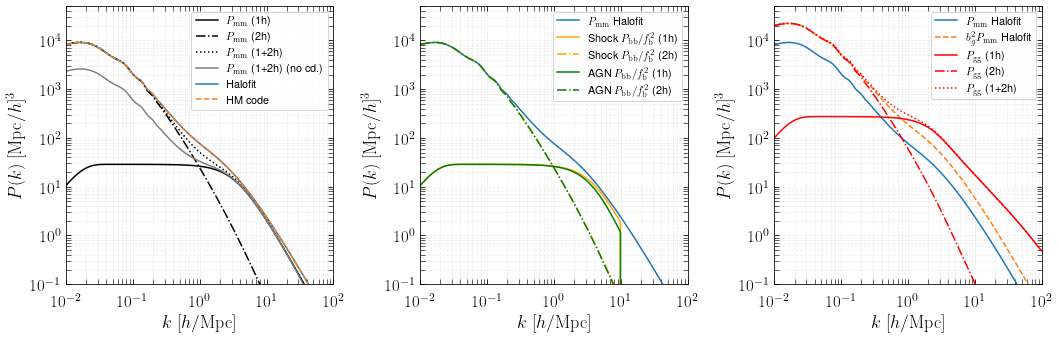

In [10]:
k_arr = np.geomspace(1e-3,5e1,100)

label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

z_arr = np.linspace(1e-8,4.,1000)
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-1,5e4)
ax.set_xlim(1e-2,1e2)

ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = '$P_\mathrm{mm}$ (1h)',c='k',ls='-')
ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = '$P_\mathrm{mm}$ (2h)',c='k',ls='-.')
ax.plot(pk_at_z_hm['k'],np.asarray(pk_at_z_hm['2h'])+np.asarray(pk_at_z_hm['1h']),label = '$P_\mathrm{mm}$ (1+2h)',c='k',ls=':')

ax.plot(pk_at_z_hm_no_consistency['k'],np.asarray(pk_at_z_hm_no_consistency['2h'])+np.asarray(pk_at_z_hm_no_consistency['1h']),label = '$P_\mathrm{mm}$ (1+2h) (no cd.)',c='grey',ls='-')



ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='Halofit')
ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='HM code',ls='--')
# ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['1h'],label = 'pk_gg (1h)',c='r',ls='-')
# ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['2h'],label = 'pk_gg (2h)',c='r',ls='-.')
# ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['1h'])*M.get_f_b()**-2.,label = 'pk_bb/f_b^2 (1h)',c='g',ls='-')
# ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['2h'])*M.get_f_b()**-2.,label = 'pk_bb/f_b^2 (2h)',c='g',ls='-.')
ax.legend(fontsize=11)


ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-1,5e4)
ax.set_xlim(1e-2,1e2)

# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = 'pk (1h)',c='k',ls='-')
# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = 'pk (2h)',c='k',ls='-.')
ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$P_\mathrm{mm}$ Halofit')
ax.plot(k_arr/M.h(),M.get_mean_galaxy_bias_at_z(z_for_pk_hm)**2.*pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$b_g^2 P_\mathrm{mm}$ Halofit',ls='--')


# ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='HM code')
ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['1h'],label = '$P_\mathrm{gg}$ (1h)',c='r',ls='-')
ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['2h'],label = '$P_\mathrm{gg}$ (2h)',c='r',ls='-.')
ax.plot(pk_gg_at_z_hm['k'],
        np.asarray(pk_gg_at_z_hm['1h'])+np.asarray(pk_gg_at_z_hm['2h']),
        label = '$P_\mathrm{gg}$ (1+2h)',c='r',ls=':')
# ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['1h'])*M.get_f_b()**-2.,label = 'pk_bb/f_b^2 (1h)',c='g',ls='-')
# ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['2h'])*M.get_f_b()**-2.,label = 'pk_bb/f_b^2 (2h)',c='g',ls='-.')
ax.legend(fontsize=11)


ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_xlabel(r"$k$   $[h/\mathrm{Mpc}]$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-1,5e4)
ax.set_xlim(1e-2,1e2)

# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['1h'],label = 'pk (1h)',c='k',ls='-')
# ax.plot(pk_at_z_hm['k'],pk_at_z_hm['2h'],label = 'pk (2h)',c='k',ls='-.')
ax.plot(k_arr/M.h(),pk_at_z_class_halofit(k_arr,z_for_pk_hm)*M.h()**3.,label='$P_\mathrm{mm}$ Halofit')
# ax.plot(k_arr/M.h(),pk_at_z_class_hmcode(k_arr,z_for_pk_hm)*M.h()**3.,label='HM code')
# ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['1h'],label = 'pk_gg (1h)',c='r',ls='-')
# ax.plot(pk_gg_at_z_hm['k'],pk_gg_at_z_hm['2h'],label = 'pk_gg (2h)',c='r',ls='-.')
ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['1h'])*M.get_f_b()**-2.,label = 'Shock $P_\mathrm{bb}/f_\mathrm{b}^2$ (1h)',c='orange',ls='-')
ax.plot(pk_bb_at_z_hm_shock['k'],np.asarray(pk_bb_at_z_hm_shock['2h'])*M.get_f_b()**-2.,label = 'Shock $P_\mathrm{bb}/f_\mathrm{b}^2$ (2h)',c='orange',ls='-.')

ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['1h'])*M.get_f_b()**-2.,label = 'AGN $P_\mathrm{bb}/f_\mathrm{b}^2$ (1h)',c='g',ls='-')
ax.plot(pk_bb_at_z_hm_agn['k'],np.asarray(pk_bb_at_z_hm_agn['2h'])*M.get_f_b()**-2.,label = 'AGN $P_\mathrm{bb}/f_\mathrm{b}^2$ (2h)',c='g',ls='-.')


# ax.plot(pk_bb_at_z_hm_nfw['k'],np.asarray(pk_bb_at_z_hm_nfw['1h'])*M.get_f_b()**-2.,label = 'NFW $P_\mathrm{bb}/f_\mathrm{b}^2$ (1h)',c='pink',ls='-')
# ax.plot(pk_bb_at_z_hm_nfw['k'],np.asarray(pk_bb_at_z_hm_nfw['2h'])*M.get_f_b()**-2.,label = 'NFW $P_\mathrm{bb}/f_\mathrm{b}^2$ (2h)',c='pink',ls='-.')




ax.legend(fontsize=11,ncol=1)

fig.tight_layout()
plt.savefig('pks_xout1.pdf')

In [11]:
M.get_mean_galaxy_bias_at_z(z_for_pk_hm)

1.566467955315399

# 3d power spectrum plots

In [8]:
z_for_pk_hm = 1.
# M_min = 1e10

In [18]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)
# M.set(battaglia_16)
M.set({# class_sz parameters:
       'output':'tCl,lCl,tSZ_1h,tSZ_2h,kSZ_kSZ_1h,kSZ_kSZ_2h,pk_at_z_1h,pk_at_z_2h,pk_bb_at_z_1h,pk_bb_at_z_2h,pk_gg_at_z_1h,pk_gg_at_z_2h',
'modes':'s',
'lensing': 'yes',
'l_max_scalars':10000,
'mass function' : 'T08M200c',
'pressure profile': 'A10',  # check source/input.c for default parameter values of Battaglia et al profile (B12)
'concentration parameter': 'D08',  # B13: Bhattacharya et al 2013  

'ell_max' : 10000,
'ell_min' : 2,
'z_min': 1e-2,
'z_max': 4.,
'M_min':1e9, # all masses in Msun/h
'M_max':5e15,
'B': 1.7, #hydrostatic equilibrium bias (1-b)^-1
'units for tSZ spectrum': 'muK2',
'Frequency for y-distortion in GHz': 150.,
'gas profile':'B16',
'gas profile mode' : 'agn',
'normalize_gas_density_profile': 1,
'delta for electron density': '200c',
'hm_consistency' : 1,

'dell':0.,
'dlogell':0.2,

'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 20.,
'P_k_max_h/Mpc' : 100.0,
'non linear':'hmcode',
'x_out_truncated_nfw_profile':1.,

'x_out_truncated_density_profile (electrons)': 5., 

'k_min_gas_density_profile':1e-4,
'n_ell_density_profile':100,
'n_m_density_profile': 100, # 80
'n_z_density_profile': 100, # 80
'mass_epsrel' : 1e-5,



"dlnk_for_pk_hm" : 0.1,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 1e2,
        })
        
M.compute()

# M.struct_cleanup()
# M.empty()
cl_sz = M.cl_sz()
cl_ksz_b16_with_cd_xout_5 = M.cl_ksz()

[]

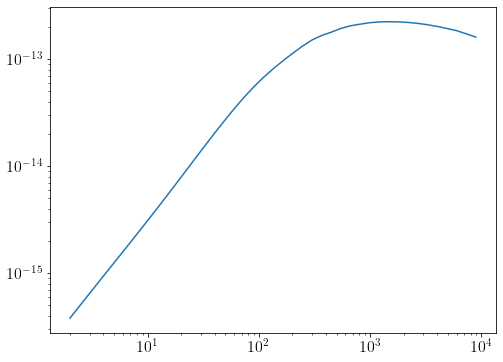

In [20]:
plt.plot(cl_ksz_b16_with_cd_xout_5['ell'],np.asarray(cl_ksz_b16_with_cd_xout_5['1h'])+np.asarray(cl_ksz_b16_with_cd_xout_5['2h']))
plt.loglog()

[]

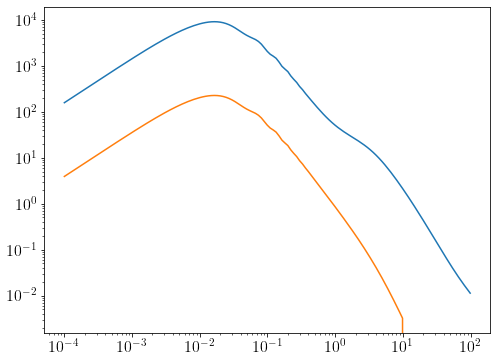

In [21]:
plt.plot(M.pk_at_z_hm()['k'],np.asarray(M.pk_at_z_hm()['1h']+np.asarray(M.pk_at_z_hm()['2h'])))
plt.plot(M.pk_bb_at_z_hm()['k'],np.asarray(M.pk_bb_at_z_hm()['1h']+np.asarray(M.pk_bb_at_z_hm()['2h'])))
plt.loglog()

In [17]:
np.asarray(M.pk_bb_at_z_hm()['1h'])

array([3.26191869e-05, 3.98409628e-05, 4.86615605e-05, 5.94349146e-05,
       7.25932979e-05, 8.86646538e-05, 1.08293760e-04, 1.32268071e-04,
       1.61549265e-04, 1.97311762e-04, 2.40989738e-04, 2.94334504e-04,
       3.59484525e-04, 4.39050852e-04, 5.36221318e-04, 6.54887596e-04,
       7.99800071e-04, 9.76756528e-04, 1.19283192e-03, 1.45665794e-03,
       1.77876296e-03, 2.17198489e-03, 2.65197197e-03, 3.23778932e-03,
       3.95265211e-03, 4.82480967e-03, 5.88860838e-03, 7.18576491e-03,
       8.76688401e-03, 1.06932573e-02, 1.30389792e-02, 1.58934116e-02,
       1.93640177e-02, 2.35795657e-02, 2.86936655e-02, 3.48885428e-02,
       4.23788607e-02, 5.14152625e-02, 6.22871203e-02, 7.53236525e-02,
       9.08922576e-02, 1.09392392e-01, 1.31242791e-01, 1.56859237e-01,
       1.86619681e-01, 2.20813872e-01, 2.59574828e-01, 3.02793281e-01,
       3.50020708e-01, 4.00375313e-01, 4.52476633e-01, 5.04445134e-01,
       5.54015499e-01, 5.98788051e-01, 6.36622151e-01, 6.66095627e-01,
      

# density profile normalization

In [3]:
M = Class()
M.set(ksz_params)
M.set(common_params)
M.set(cosmo_params)
M.set(bestfit_blue_hod_params)

M.set({# class_sz parameters:
       'output':'tSZ_1h,m200m_to_m200c,m200c_to_m200m',
       'concentration parameter':'D08',
       'use_xout_in_density_profile_from_enclosed_mass': 1,
        })
M.compute()


def x200c_to_theta_arcmin(X):
    return M.get_rad_to_arcmin(r200c*X/M.get_dA(z))
def theta_arcmin_to_x200c(X):
    theta_rad = M.get_arcmin_to_rad(X)
    r = M.get_dA(z)*theta_rad
    return r/r200c

In [4]:
lambda_min = 0.1
lambda_max = 50
n_lambda = 100
lambda_array = np.geomspace(lambda_min,lambda_max,n_lambda)

In [6]:
# chose a mass and redshift for a given halo of interest
z = 0.5
# m200m = 3e14
# convert to 200c for b16 profile
m200c = 3e11#M.get_m200m_to_m200c_at_z_and_M(z,m200m)
m200m = M.get_m200c_to_m200m_at_z_and_M(z,m200c)

In [7]:
xout_calc = M.get_m_to_xout_at_z_and_m(z,m200c)
xout_calc

2.913364768973791

In [8]:
# store the radial profiles of the gas
rho_gas_nfw = np.vectorize(M.get_gas_profile_at_x_M_z_nfw_200c)
rho_gas_b16 = np.vectorize(M.get_gas_profile_at_x_M_z_b16_200c)

# normalized radial array for b16:
x_200c = lambda_array

# dimensonfull radial array:
r200c = M.get_r_delta_of_m_delta_at_z(200,m200c,z)
r = x_200c*r200c
theta_arcmin = M.get_rad_to_arcmin(r/M.get_dA(z))

# normalized radial array for nfw:
r200m = M.get_r_delta_of_m_delta_at_z(200*M.Om_m(z),m200m,z)
c200m = M.get_c200m_at_m_and_z_D08(m200m,z)
c200c = M.get_c200c_at_m_and_z_D08(m200c,z)
rs_200m = r200m/c200m
xs_200m =  r/rs_200m
rs_200c = r200c/c200c
xs_200c=  r/rs_200c
# mass of b16 within \lambda*r_200c : M_b16(\lambda)
def M_b16(lambda_out,
          A_rho0=4.e3,
          A_alpha = 0.88,
          A_beta = 3.83,
          alpha_m_rho0 = 0.29,
          alpha_m_alpha = -0.03,
          alpha_m_beta = 0.04,
          alpha_z_rho0 = -0.66,
          alpha_z_alpha = 0.19,
          alpha_z_beta = -0.025,
          gamma = -0.2,
          xc = 0.5):
    #lambda_out = rout/r200c
    x_array = np.linspace(1e-8,lambda_out,1000)
    y = rho_gas_b16(x_array,m200c,z,
                    A_rho0=A_rho0,
                    A_alpha=A_alpha,
                    A_beta=A_beta,
                    alpha_m_rho0 = alpha_m_rho0,
                    alpha_m_alpha = alpha_m_alpha,
                    alpha_m_beta = alpha_m_beta,
                    alpha_z_rho0 = alpha_z_rho0,
                    alpha_z_alpha = alpha_z_alpha,
                    alpha_z_beta = alpha_z_beta,
                    gamma=gamma,
                    xc = xc)*x_array**2#/M.get_f_b()
    mass = 4.*np.pi*r200c**3*np.trapz(y,x=x_array)
    return mass
M_b16 = np.vectorize(M_b16) 

# def f_nfw(c):
#     return (np.log(1.+c)-c/(1.+c))**-1.

# def rho_nfw(x,z):
#     rhoc = M.get_rho_crit_at_z(z)
#     rhos = 1./3.*200.*rhoc*c200c*3.*f_nfw(200.)
#     return rhos*1./x*1./(1.+x)**2.

# mass of nfw within \lambda*r_200c : M_nfw(\lambda)
def M_nfw(lambda_out):
    #lambda_out = rout/r200c
    rout = lambda_out*r200c
    lambda_out_200c = rout/rs_200c
    x_array = np.linspace(1e-8,lambda_out_200c,1000)
    y = rho_gas_nfw(x_array,m200c,z)*x_array**2
#     y = 
    mass = 4.*np.pi*rs_200c**3*np.trapz(y,x=x_array)#/M.get_f_b()
    return mass
M_nfw = np.vectorize(M_nfw) 
    

def A_rho0_norm(A_rho0=1.,
                A_alpha = 0.88,
                A_beta = 3.83,
                alpha_m_rho0 = 0.29,
                alpha_m_alpha = -0.03,
                alpha_m_beta = 0.04,
                alpha_z_rho0 = -0.66,
                alpha_z_alpha = 0.19,
                alpha_z_beta = -0.025,
                gamma = -0.2,
                xc = 0.5):
    return M_nfw(1.)/M_b16(1.,A_rho0=1.,
                              A_alpha=A_alpha,
                              A_beta=A_beta,
                              alpha_m_rho0 = alpha_m_rho0,
                              alpha_m_alpha = alpha_m_alpha,
                              alpha_m_beta = alpha_m_beta,
                              alpha_z_rho0 = alpha_z_rho0,
                              alpha_z_alpha = alpha_z_alpha,
                              alpha_z_beta = alpha_z_beta,
                              gamma=gamma,
                              xc = xc)

In [9]:
"%.5e"%(M_nfw(1.)/M.get_f_b())

'2.99999e+11'

In [10]:
print('%.3e'%(np.asarray(m200c)/M_nfw(1.)))
print('%.3e'%m200c)
print('%.3e'%r200c)
print('%.3e'%r200m)

6.351e+00
3.000e+11
9.054e-02
1.123e-01


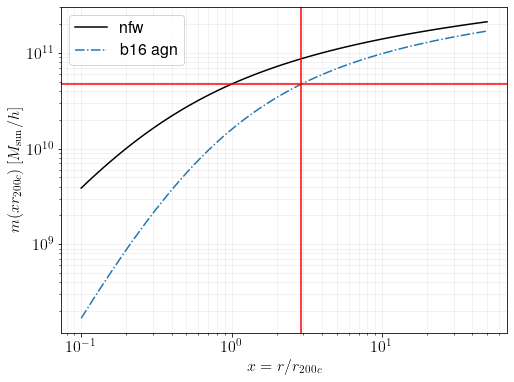

In [17]:
# normalization of b16 such that b16 and nfw have same mass within 1*r200c:
plt.plot(lambda_array,M_nfw(lambda_array),label='nfw',c='k')
rhos_over_rhocz = 1./3.*200.*c200c**3.*(np.log(1.+c200c)-c200c/(1.+c200c))**-1.

# nfw like
A_rho0=10.
A_alpha = 1.#rhos_over_rhocz
A_beta = 3.
alpha_m_rho0 = 0.
alpha_m_alpha = 0.
alpha_m_beta = 0.
alpha_z_rho0 = 0.
alpha_z_alpha = 0.
alpha_z_beta = 0.
gamma = -1.
xc = 1./c200c
# plt.plot(lambda_array,M_b16(lambda_array,
#                             A_rho0=A_rho0_norm(A_rho0=A_rho0,
#                                                A_alpha=A_alpha,
#                                                A_beta=A_beta,
#                                                alpha_m_rho0 = alpha_m_rho0,
#                                                alpha_m_alpha = alpha_m_alpha,
#                                                alpha_m_beta = alpha_m_beta,
#                                                alpha_z_rho0 = alpha_z_rho0,
#                                                alpha_z_alpha = alpha_z_alpha,
#                                                alpha_z_beta = alpha_z_beta,
#                                                gamma = gamma,
#                                                xc = xc
#                                                ),
#                             A_alpha=A_alpha,
#                             A_beta=A_beta,
#                             alpha_m_rho0 = alpha_m_rho0,
#                             alpha_m_alpha = alpha_m_alpha,
#                             alpha_m_beta = alpha_m_beta,
#                             alpha_z_rho0 = alpha_z_rho0,
#                             alpha_z_alpha = alpha_z_alpha,
#                             alpha_z_beta = alpha_z_beta,
#                             gamma=gamma,
#                             xc = xc
#                            ),
#          label='b16 nfw-like',ls='--')

A_rho0 = 4.e3
A_alpha = 0.88
A_beta = 3.83

alpha_m_rho0 = 0.29
alpha_m_alpha = -0.03
alpha_m_beta = 0.04

alpha_z_rho0 = -0.66
alpha_z_alpha = 0.19
alpha_z_beta = -0.025
gamma = -0.2
xc = 0.5
plt.plot(lambda_array,M_b16(lambda_array,
#                             A_rho0=A_rho0_norm(A_rho0=A_rho0,
#                                                A_alpha=A_alpha,
#                                                A_beta=A_beta,
#                                                alpha_m_rho0 = alpha_m_rho0,
#                                                alpha_m_alpha = alpha_m_alpha,
#                                                alpha_m_beta = alpha_m_beta,
#                                                alpha_z_rho0 = alpha_z_rho0,
#                                                alpha_z_alpha = alpha_z_alpha,
#                                                alpha_z_beta = alpha_z_beta,
#                                                gamma = gamma,
#                                                xc = xc
#                                                ),
                            A_rho0=A_rho0,
                            A_alpha=A_alpha,
                            A_beta=A_beta,
                            alpha_m_rho0 = alpha_m_rho0,
                            alpha_m_alpha = alpha_m_alpha,
                            alpha_m_beta = alpha_m_beta,
                            alpha_z_rho0 = alpha_z_rho0,
                            alpha_z_alpha = alpha_z_alpha,
                            alpha_z_beta = alpha_z_beta,
                            gamma=gamma,
                            xc = xc
                           ),
         label='b16 agn',ls='-.')

plt.axvline(xout_calc,c='r')
plt.axhline(M_nfw(1.),c='r')

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$m(x r_{200c})$   $[M_\mathrm{sun}/h]$')
plt.xlabel(r'$x=r/r_{200c}$')
plt.legend()
plt.grid(which='both',alpha=0.2)